In [1]:
import pandas as pd
import sklearn 
import sweetviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics  import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("Acoustic_Features.csv")
data

Class  _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0    relax            0.052            0.591              9.136      130.043   
1    relax            0.125            0.439              6.680      142.240   
2    relax            0.046            0.639             10.578      188.154   
3    relax            0.135            0.603             10.442       65.991   
4    relax            0.066            0.591              9.769       88.890   
..     ...              ...              ...                ...          ...   
395  angry            0.174            0.578              5.265      161.144   
396  angry            0.176            0.498              5.042      179.787   
397  angry            0.187            0.557              4.724      134.032   
398  angry            0.140            0.573              4.470      113.600   
399  angry            0.086            0.475              5.343      151.748   

     _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
0           3.997         0.363         0.887         0.078         0.221   
1           4.058         0.516         0.785         0.397         0.556   
2           2.775         0.903         0.502         0.329         0.287   
3           2.841         1.552         0.612         0.351         0.011   
4           3.217         0.228         0.814         0.096         0.434   
..            ...           ...           ...           ...           ...   
395         2.985         0.065         0.718         0.046         0.265   
396         2.790        -0.148         0.342        -0.011         0.029   
397         1.672         0.566         0.880        -0.113         0.244   
398         1.997        -0.210         0.694         0.089         0.206   
399         2.240        -0.014         0.834        -0.021         0.345   

     ...  _Chromagram_Mean_9  _Chromagram_Mean_10  _Chromagram_Mean_11  \
0    ...               0.426                1.000                0.008   
1    ...               0.002                1.000                0.000   
2    ...               0.184                0.746                0.016   
3    ...               0.038                1.000                0.161   
4    ...               0.004                0.404                1.000   
..   ...                 ...                  ...                  ...   
395  ...               0.374                0.838                0.413   
396  ...               0.020                1.000                0.640   
397  ...               0.052                0.184                0.287   
398  ...               0.137                1.000                0.304   
399  ...               0.099                1.000                0.094   

     _Chromagram_Mean_12  _HarmonicChangeDetectionFunction_Mean  \
0                  0.101                                  0.316   
1                  0.984                                  0.285   
2                  1.000                                  0.413   
3                  0.757                                  0.422   
4                  0.001                                  0.345   
..                   ...                                    ...   
395                0.125                                  0.323   
396                0.010                                  0.233   
397                0.101                                  0.269   
398                0.140                                  0.277   
399                0.033                                  0.195   

     _HarmonicChangeDetectionFunction_Std  \
0                                   0.261   
1                                   0.211   
2                                   0.299   
3                                   0.265   
4                                   0.261   
..                                    ...   
395                                 0.140   
396                                 0.127   
397                 

                                             |          | [  0%]   00:00 -> (? left)


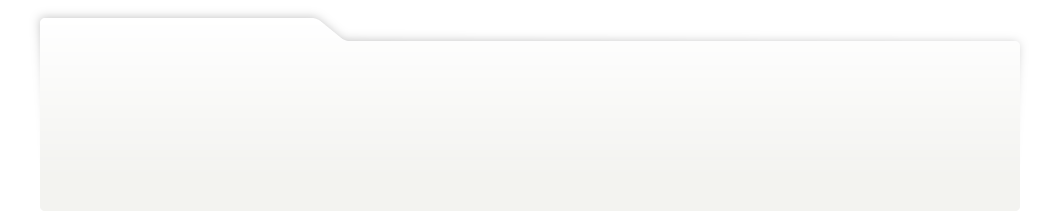
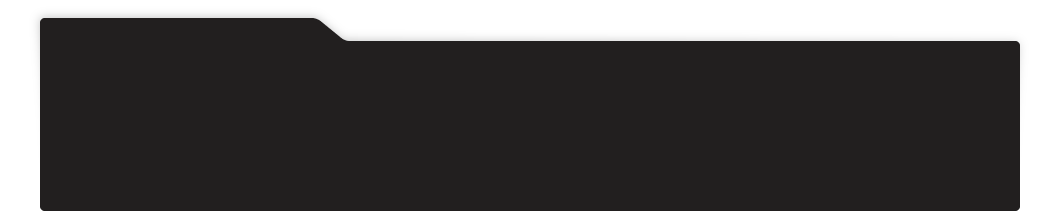
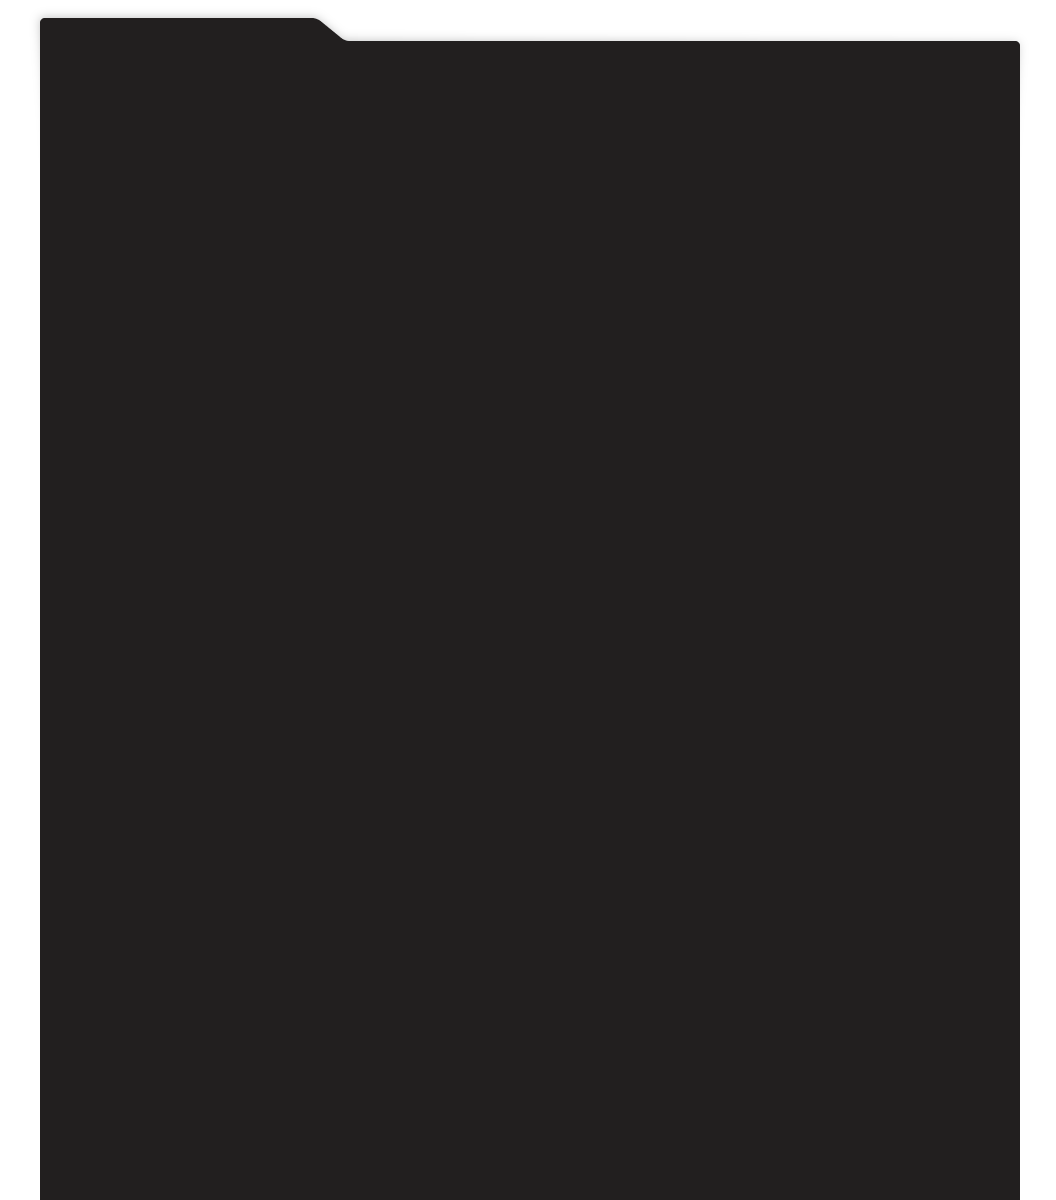
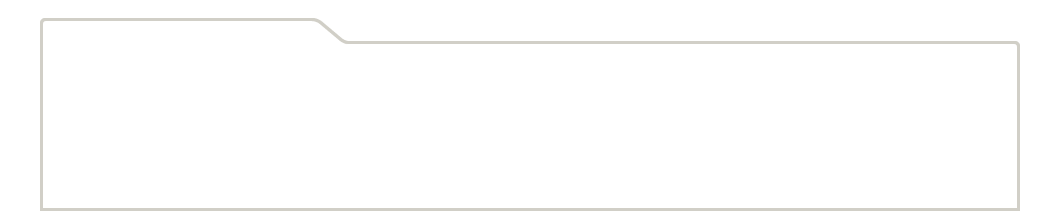
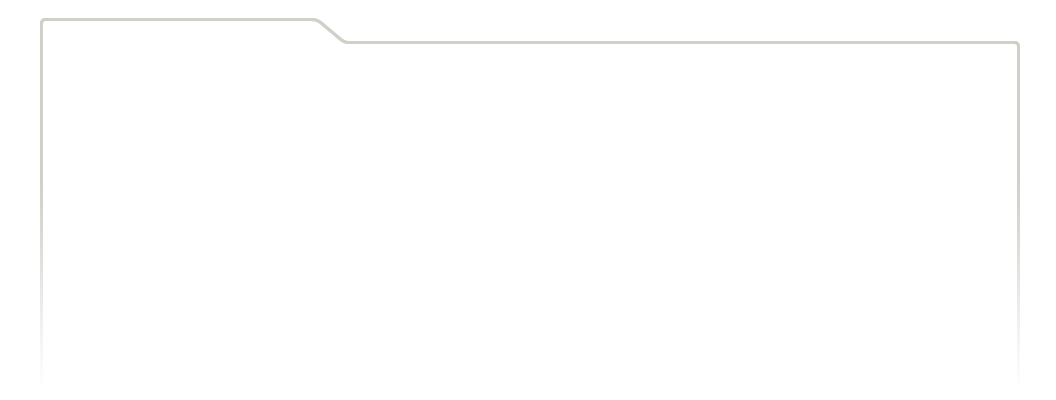
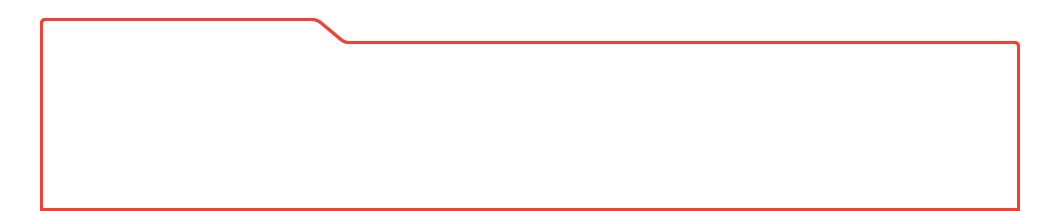
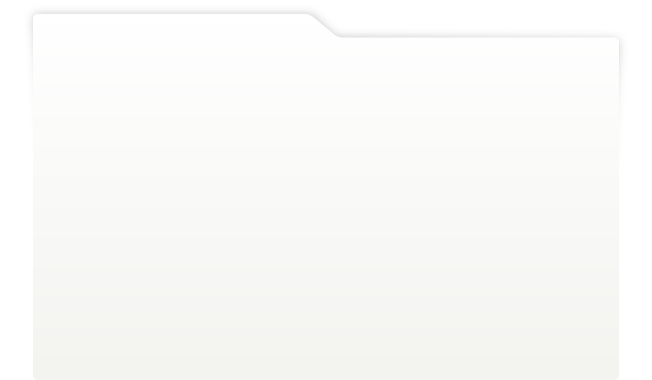
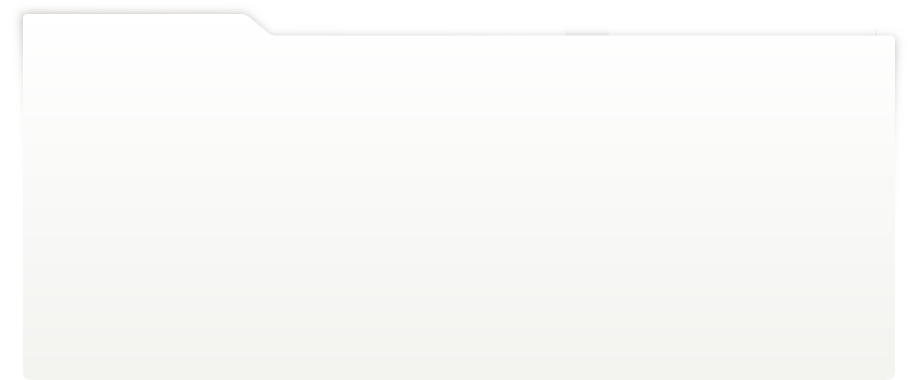
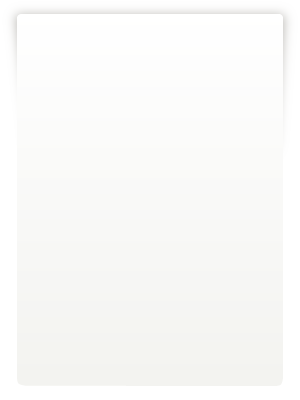
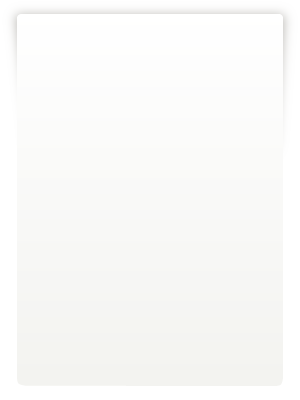
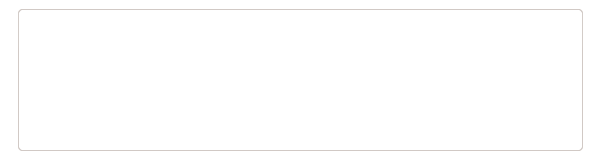
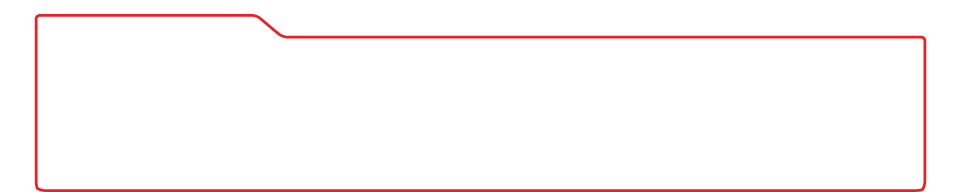
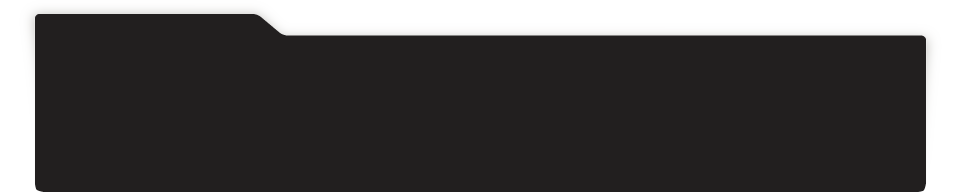
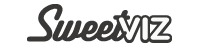
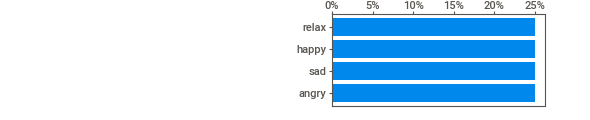
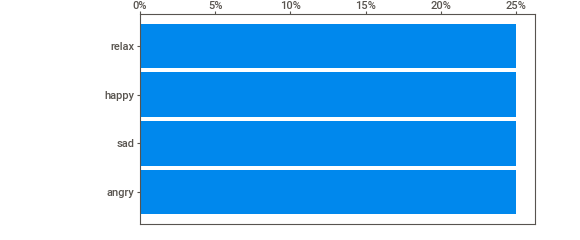
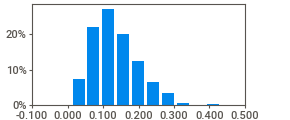
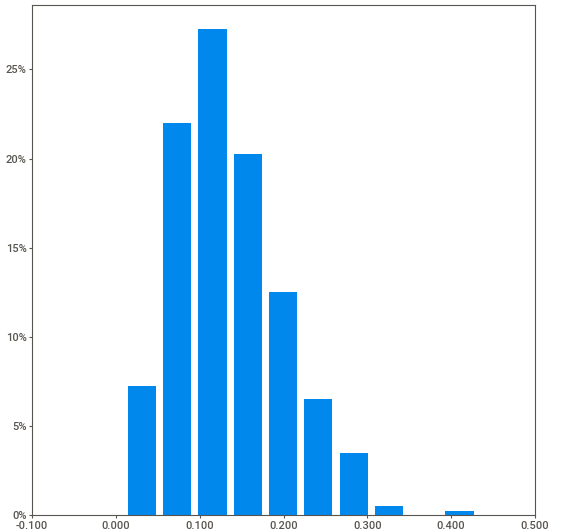
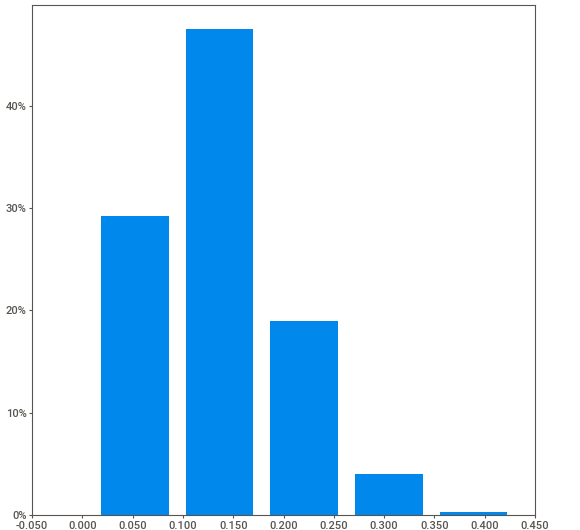
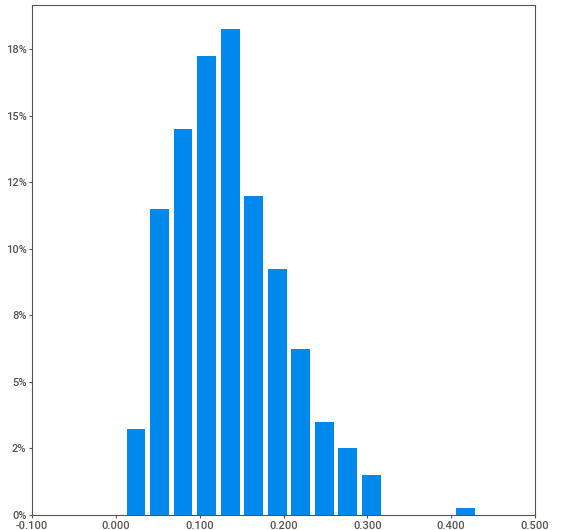
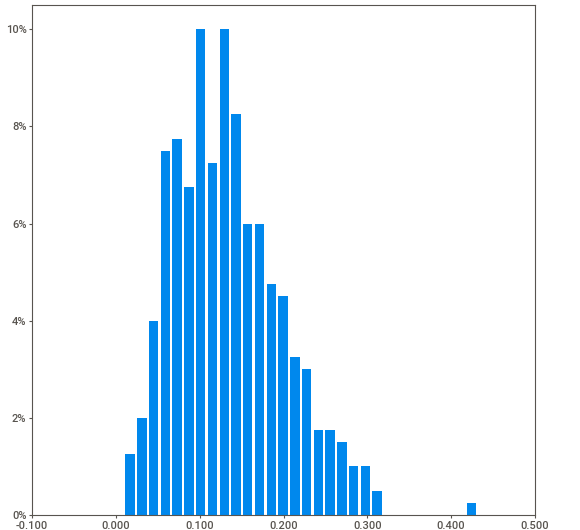
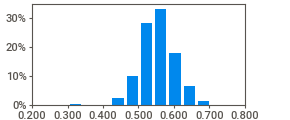
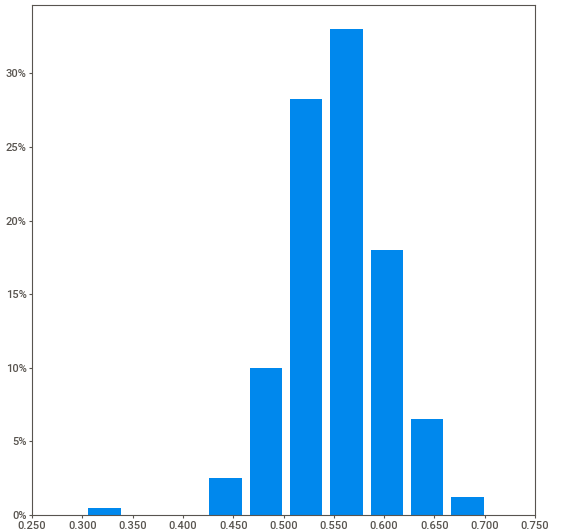
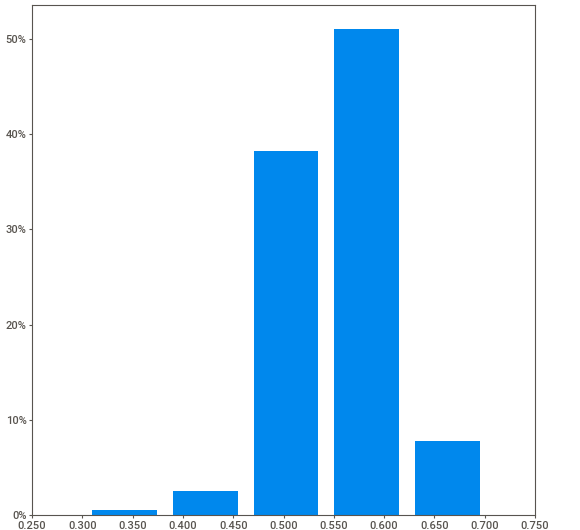
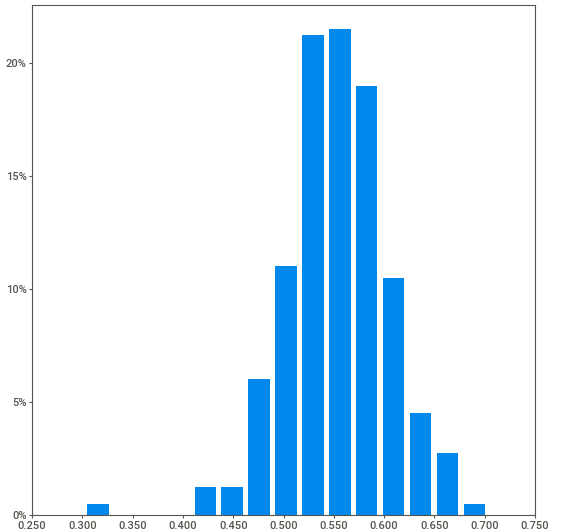
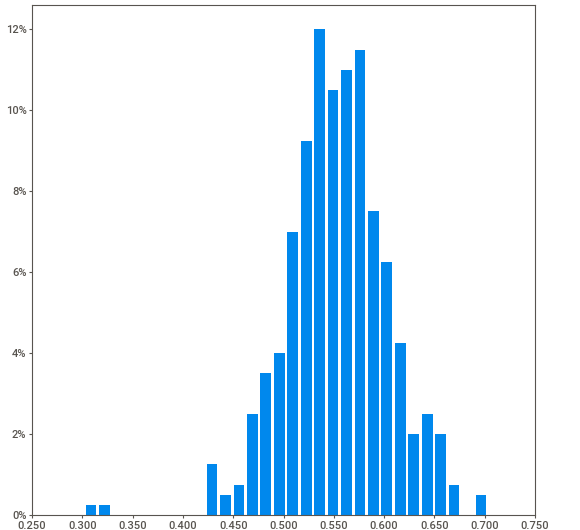
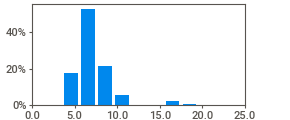
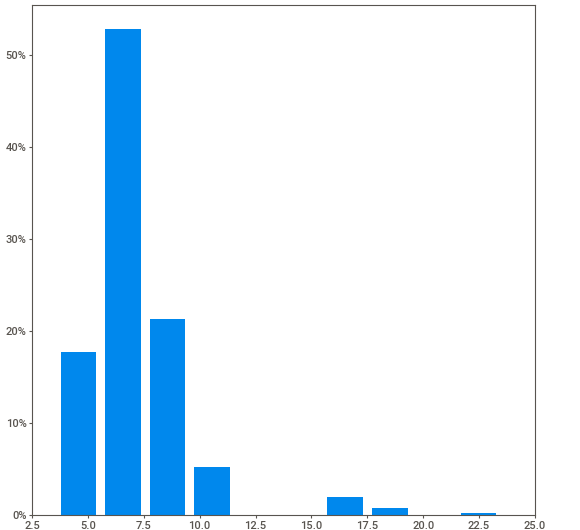
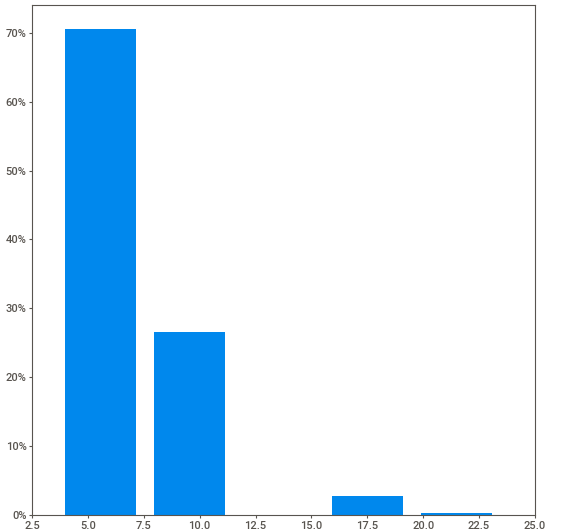
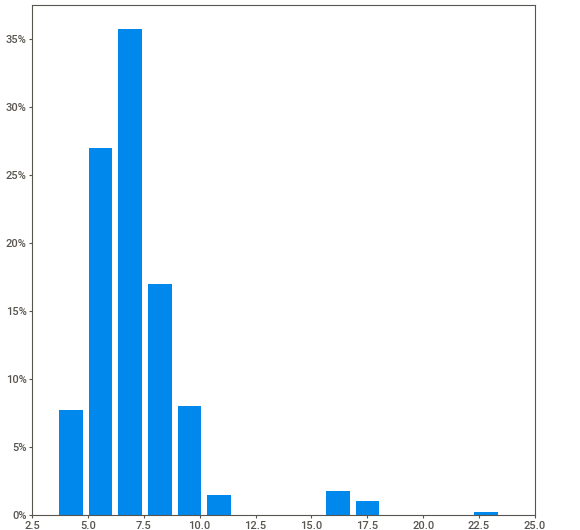
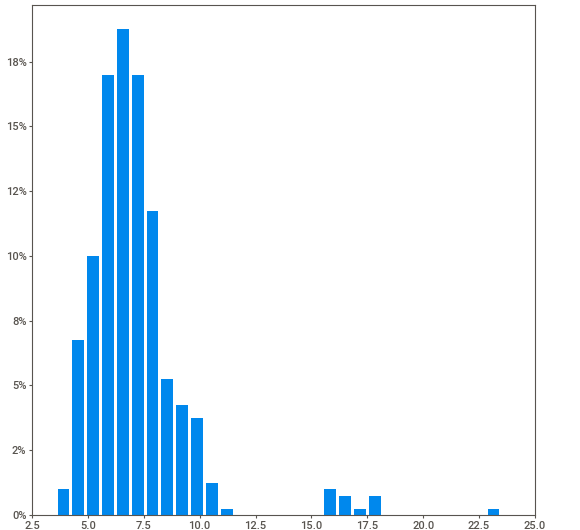
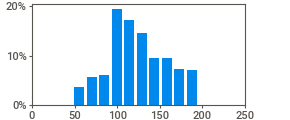
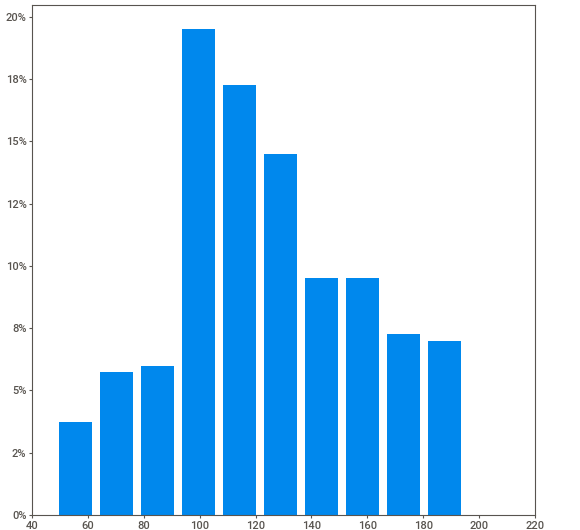
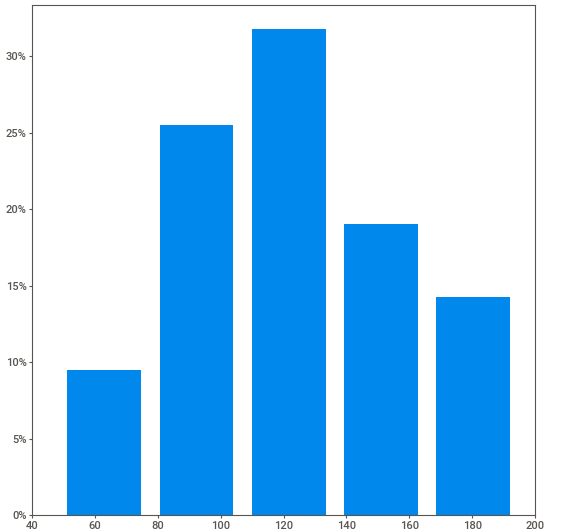
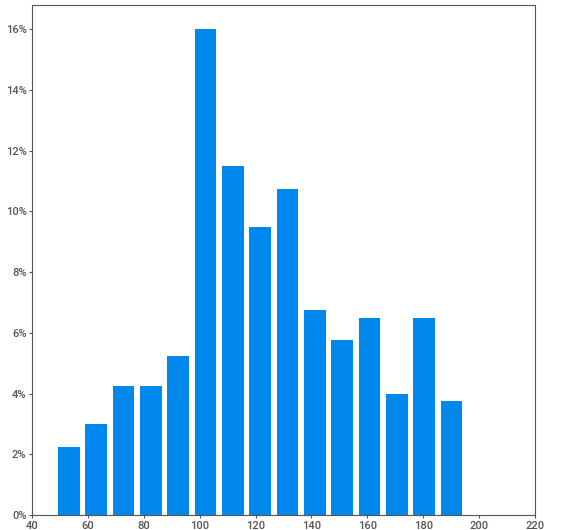
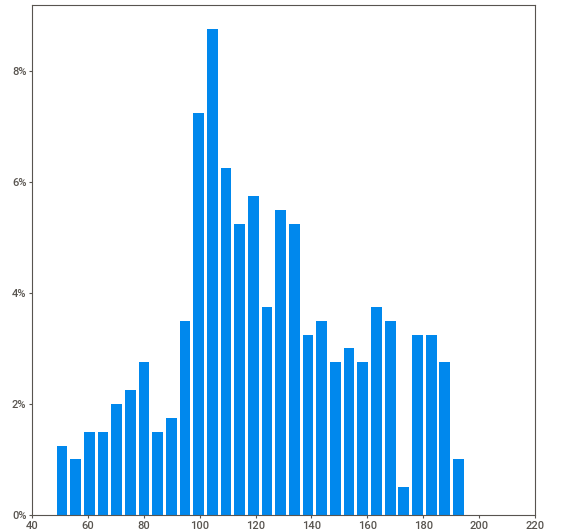
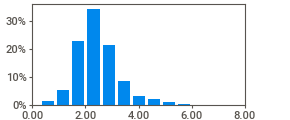
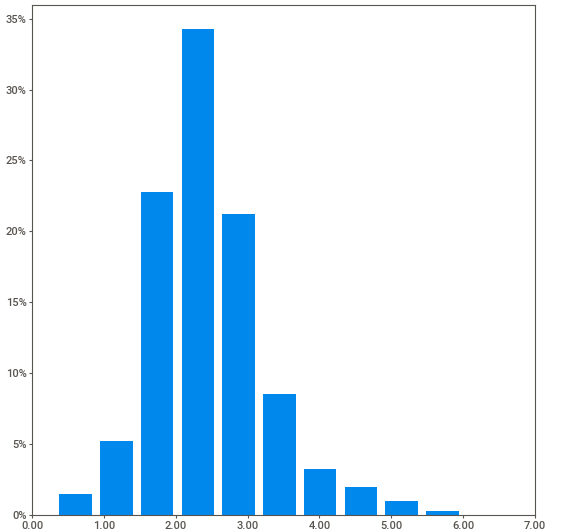
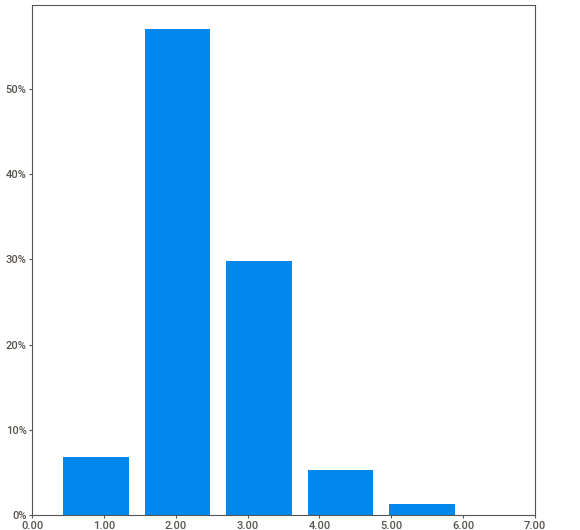
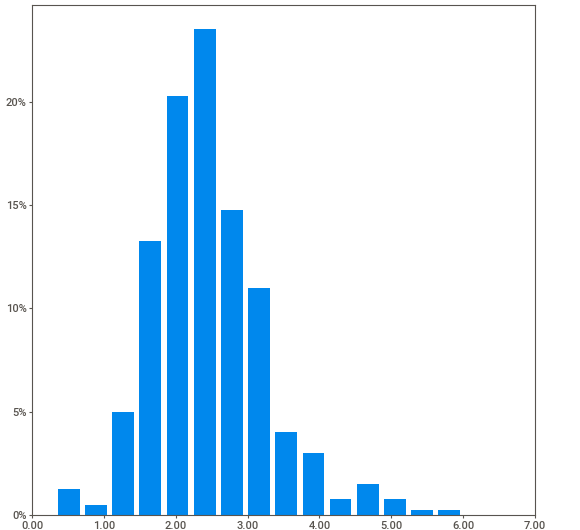
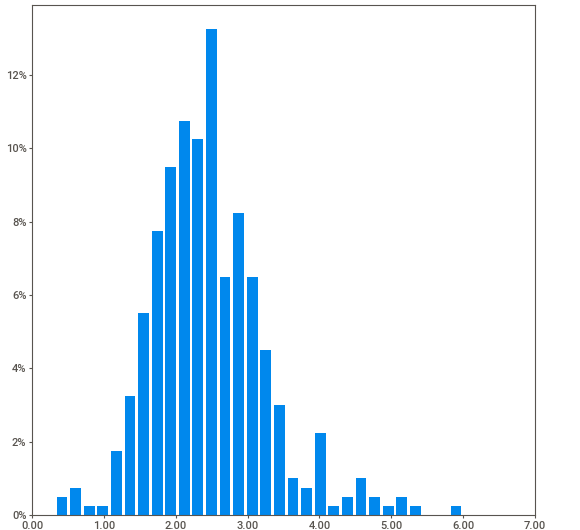
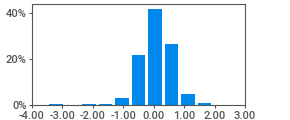
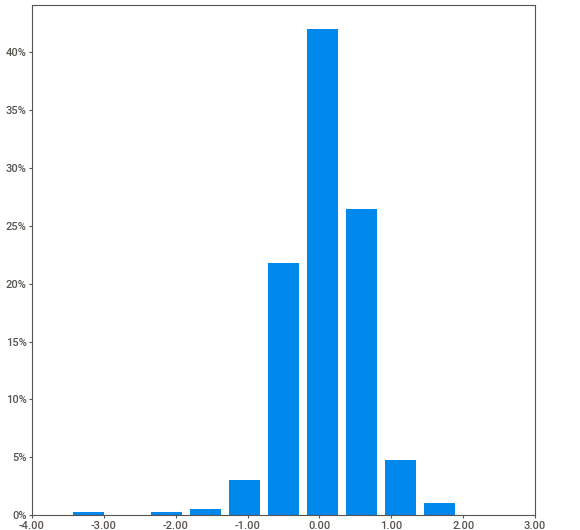
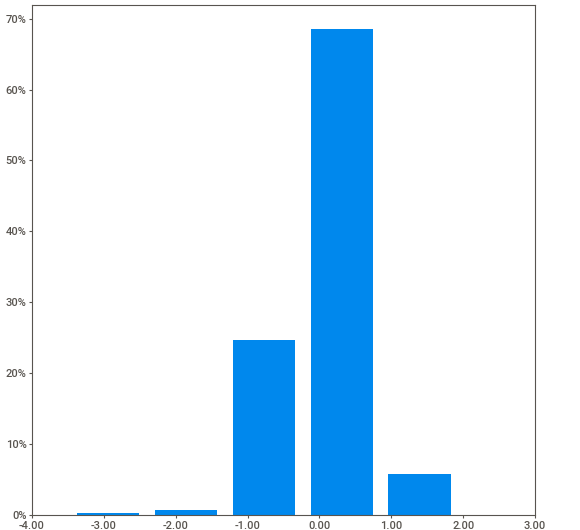
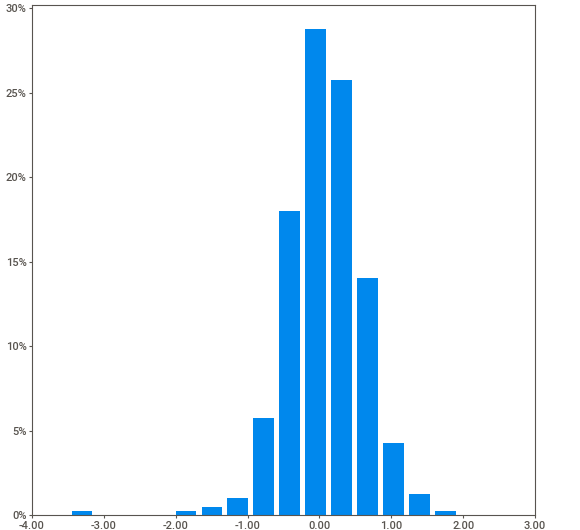
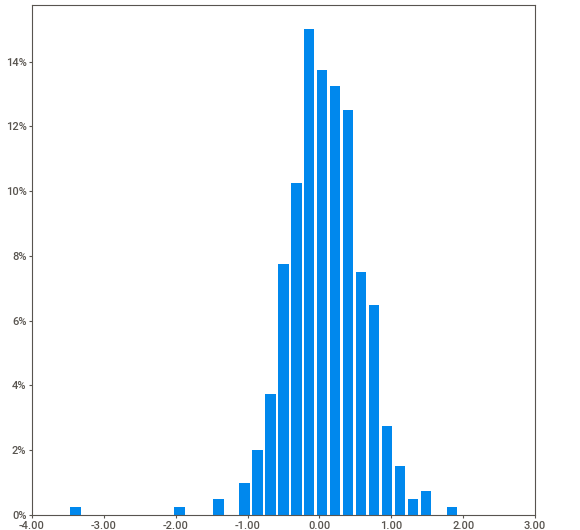
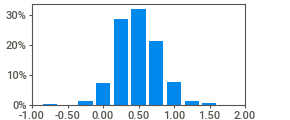
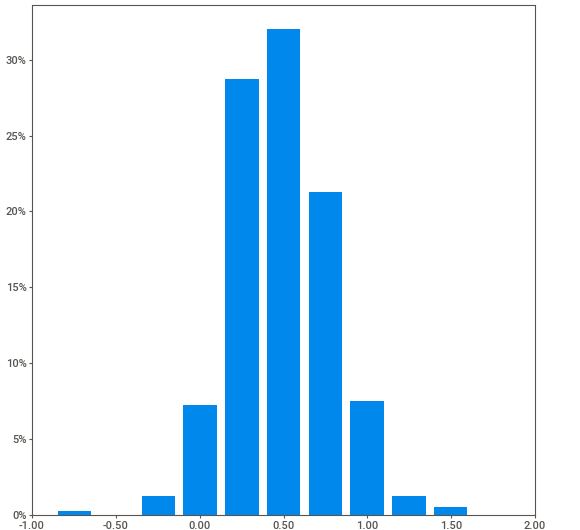
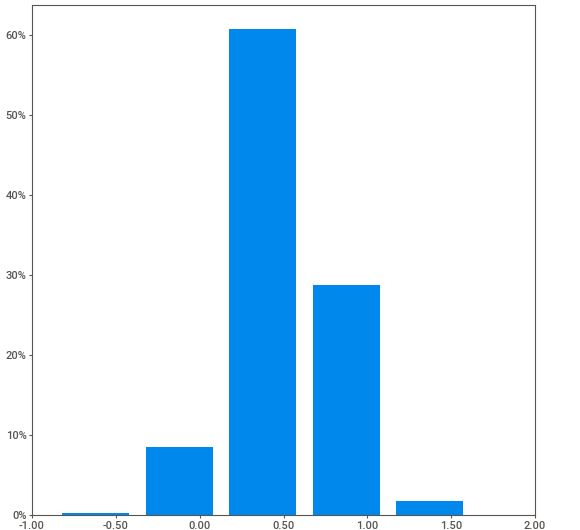
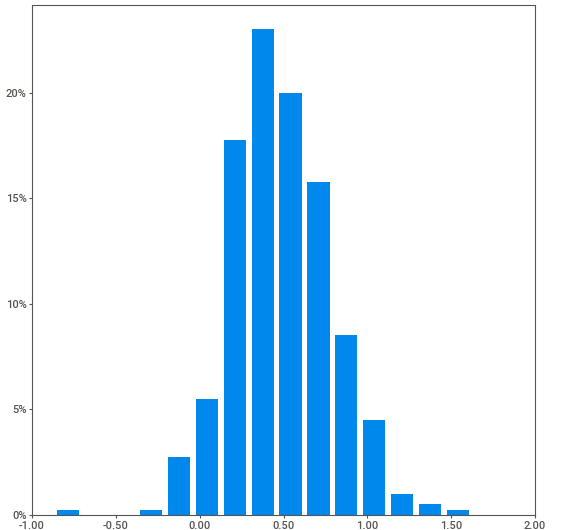
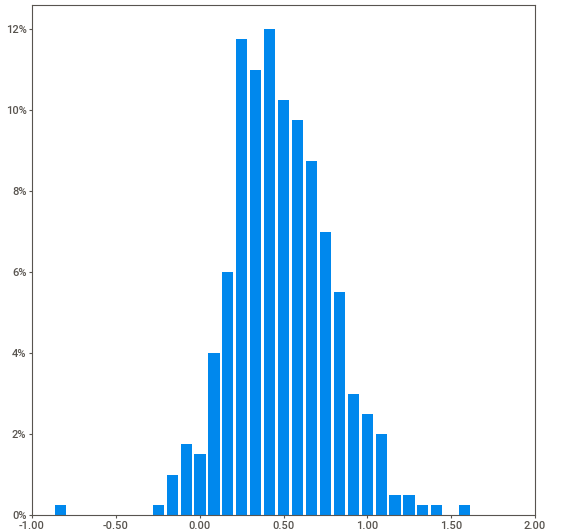
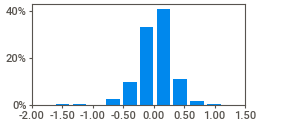
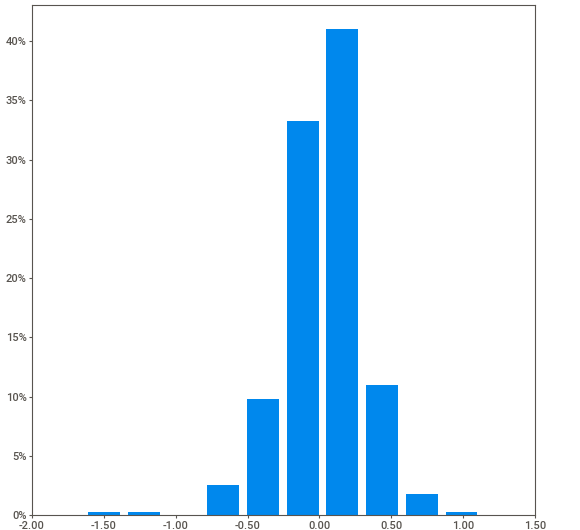
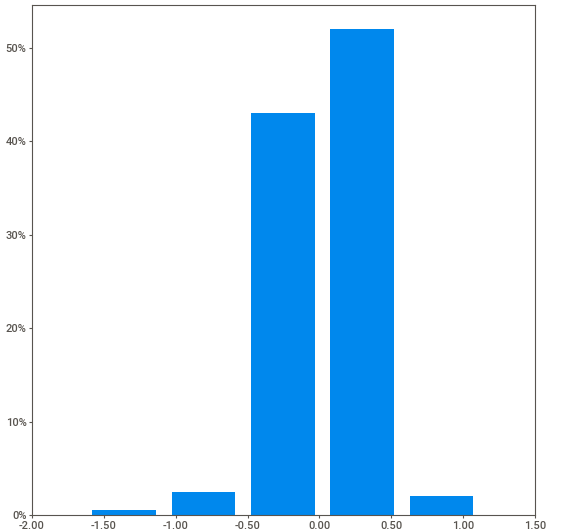
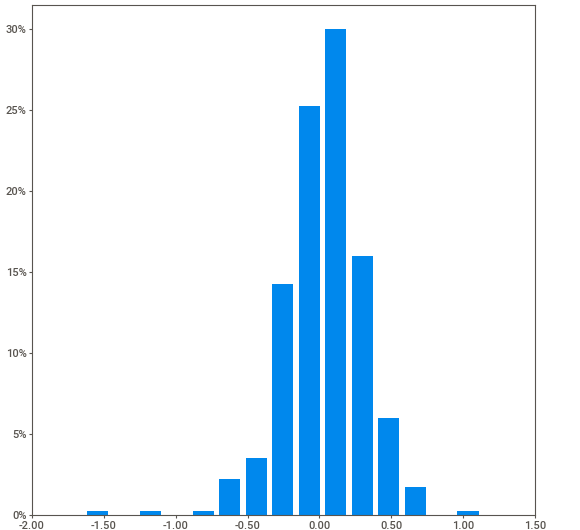
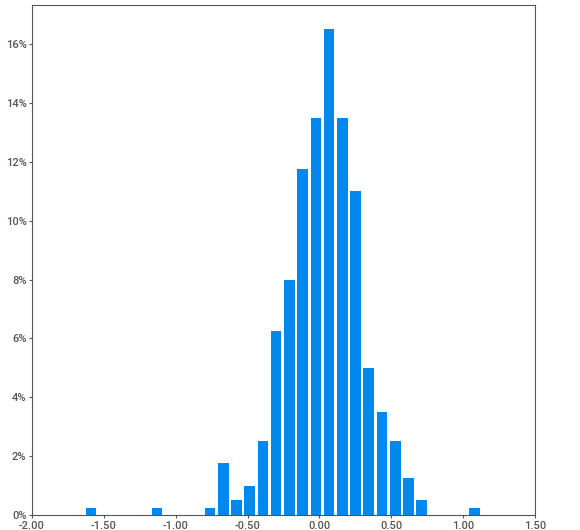
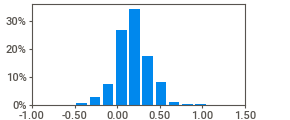
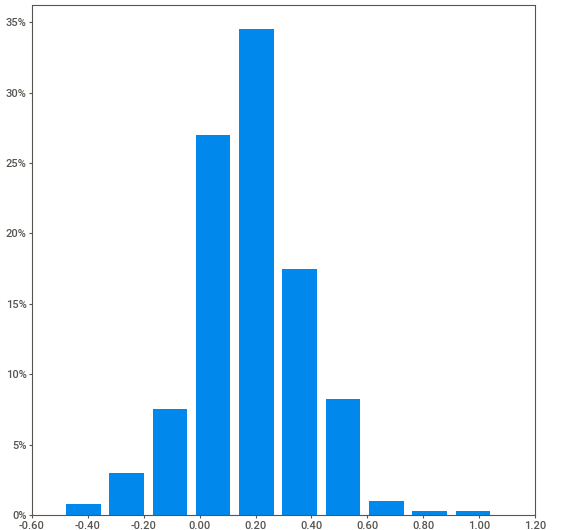
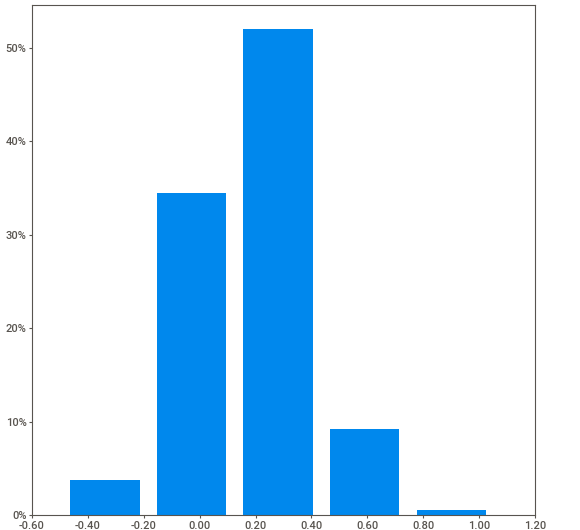
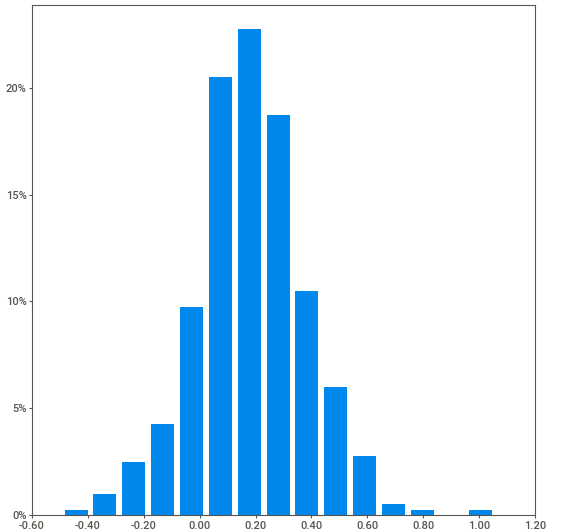
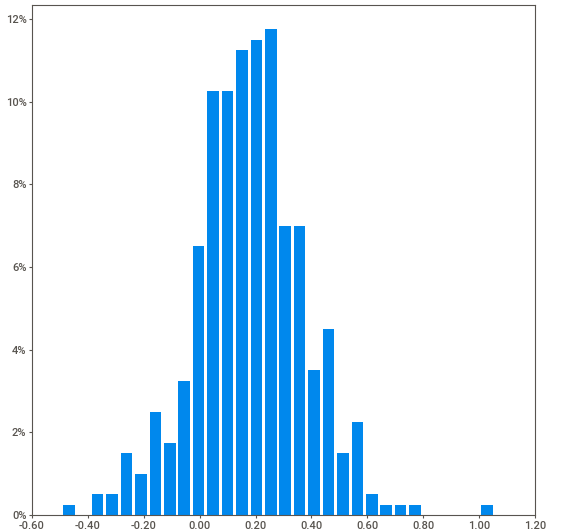
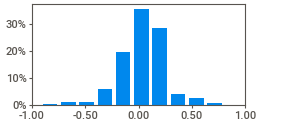
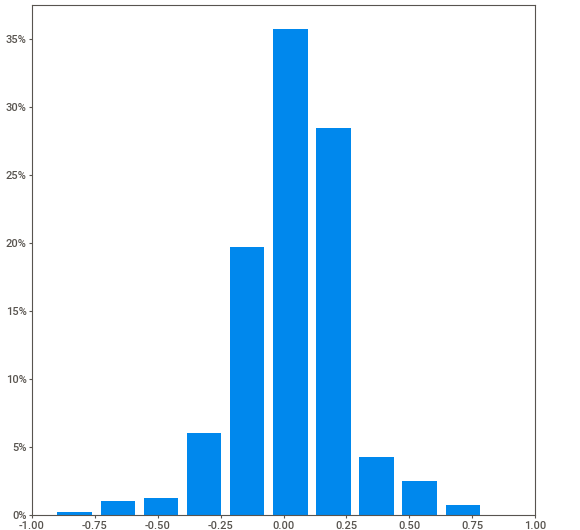
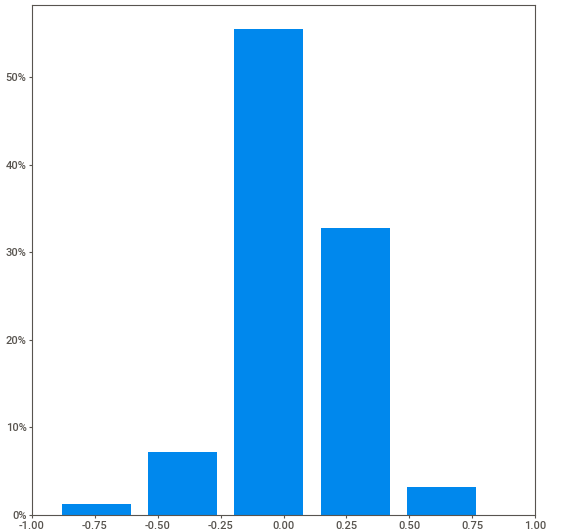
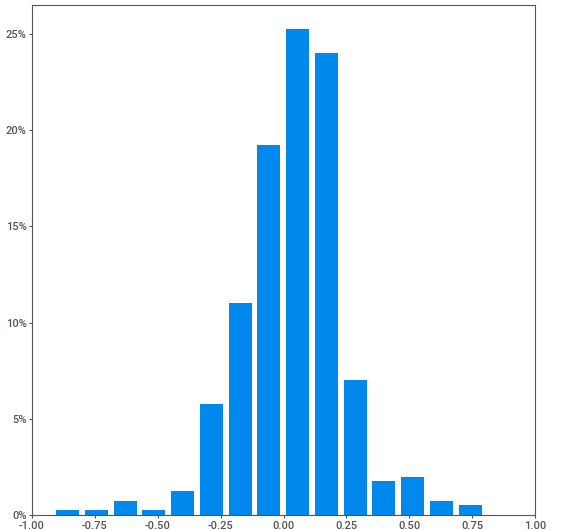
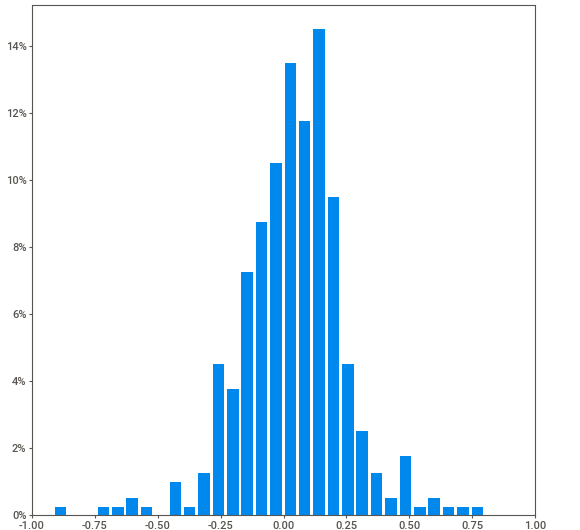
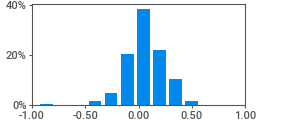
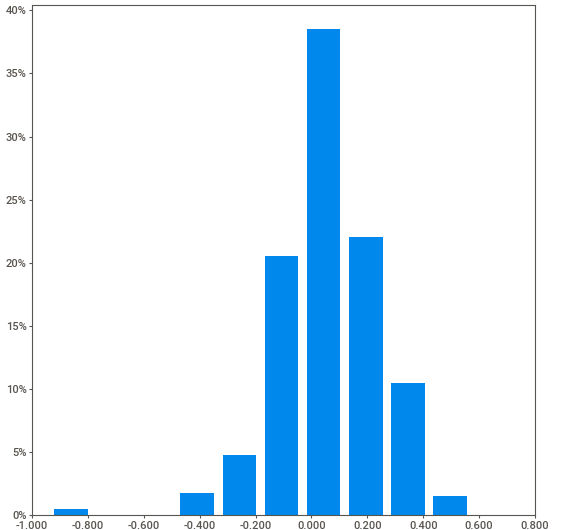
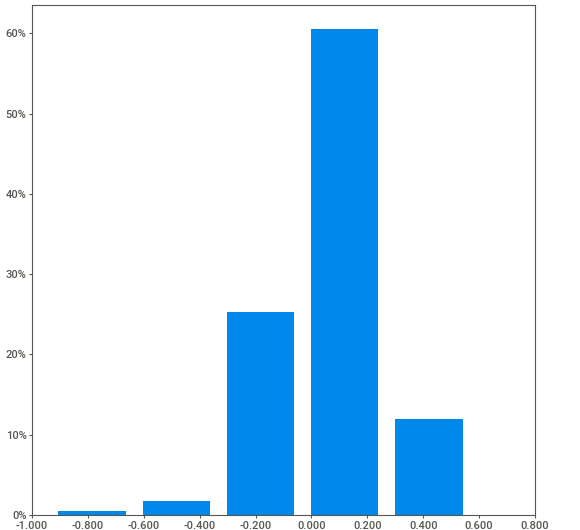
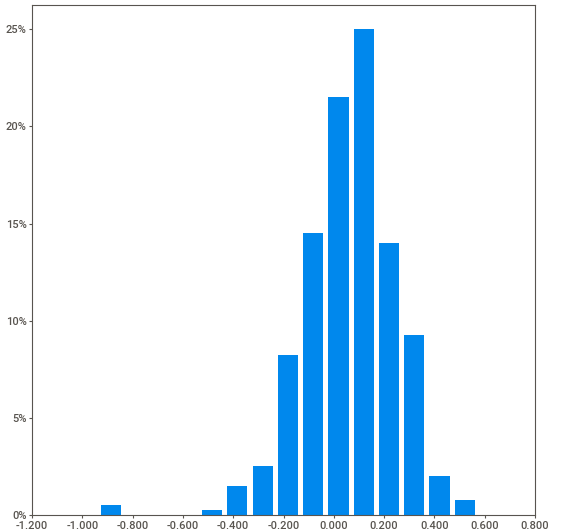
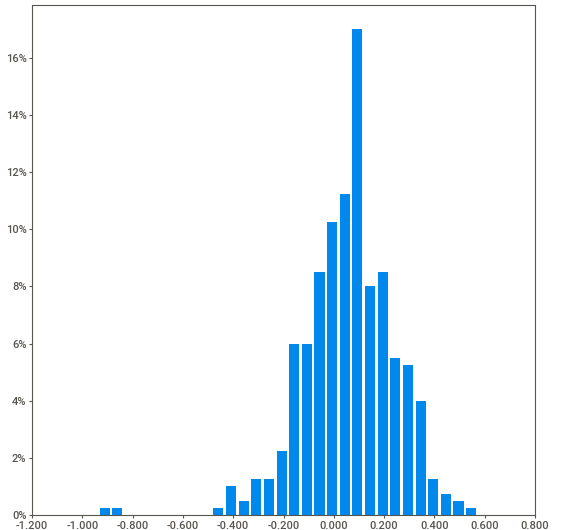
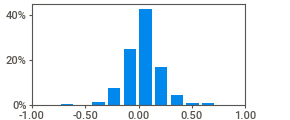
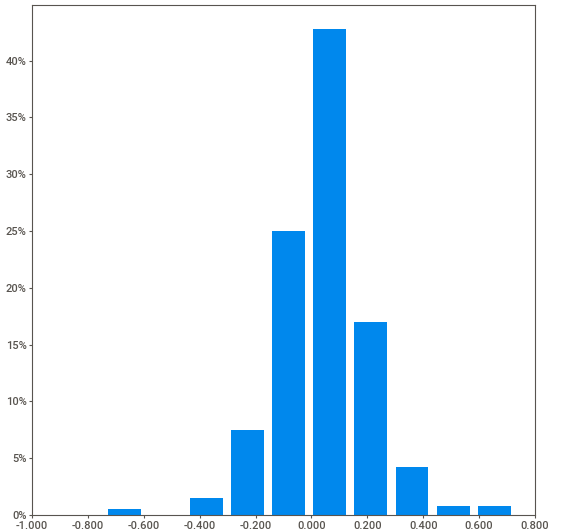
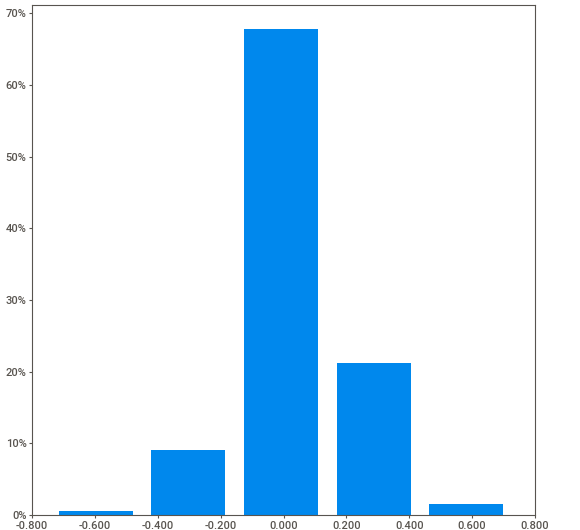
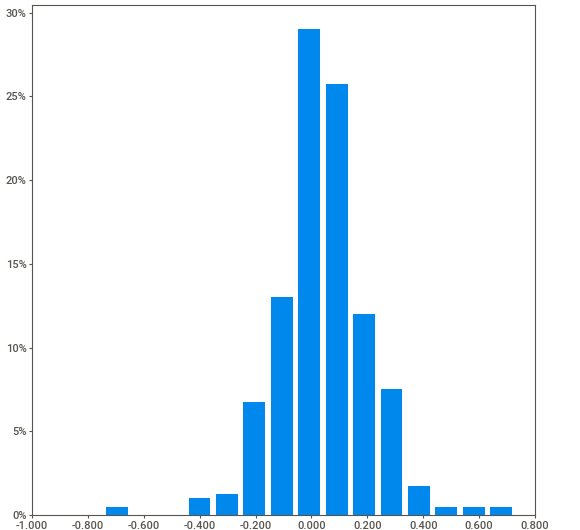
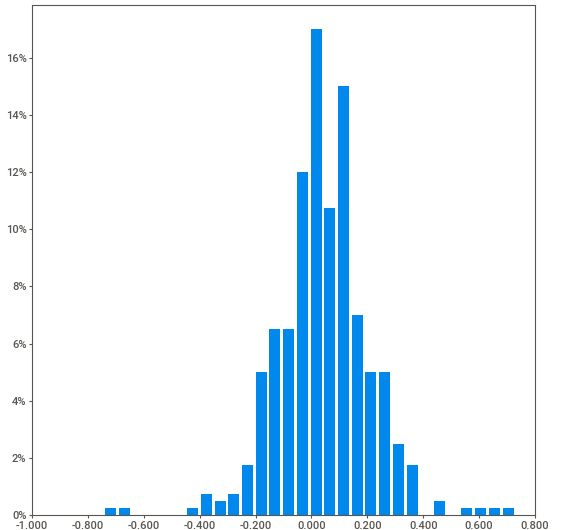
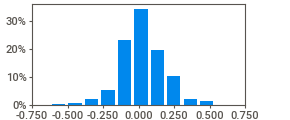
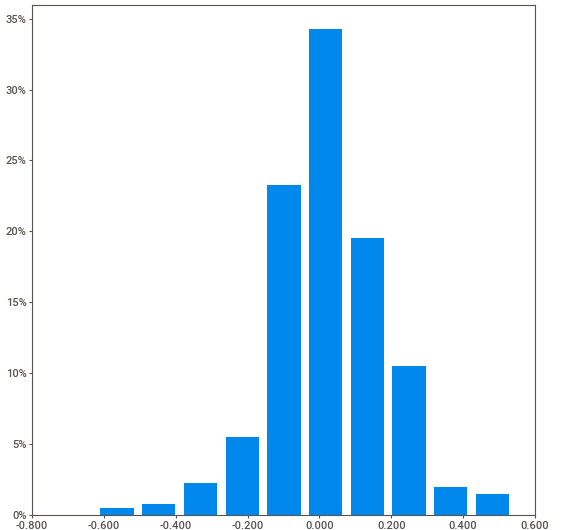
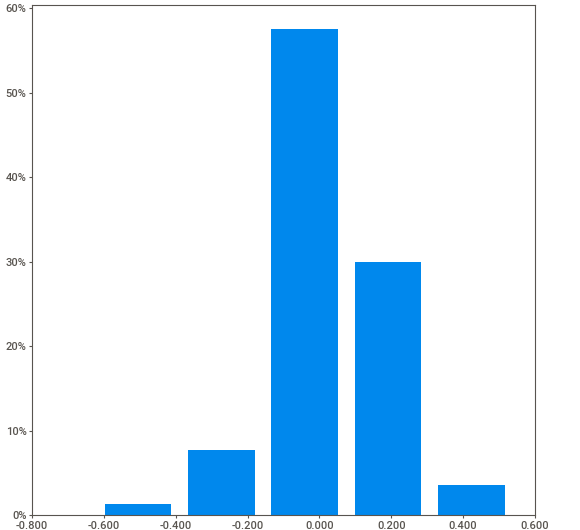
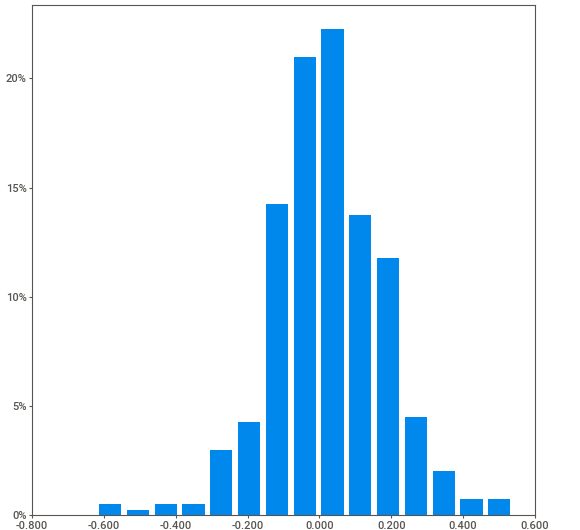
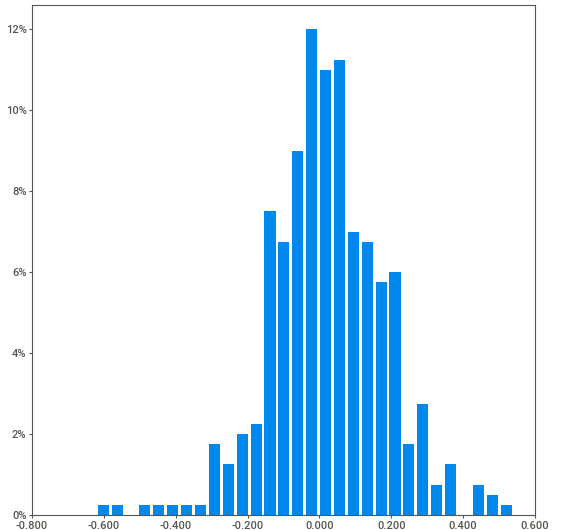
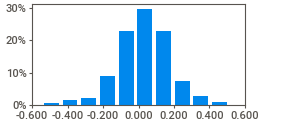
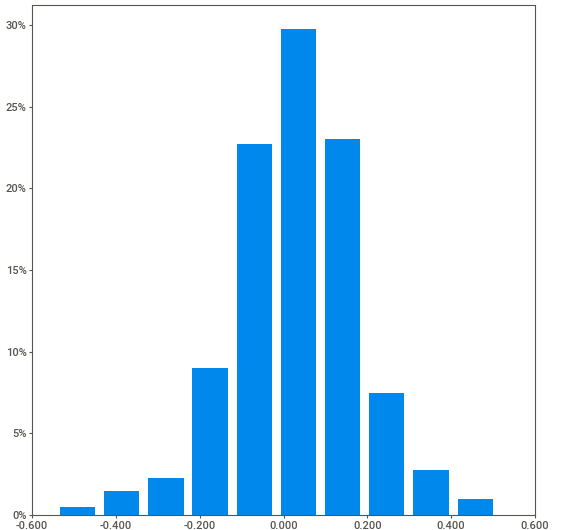
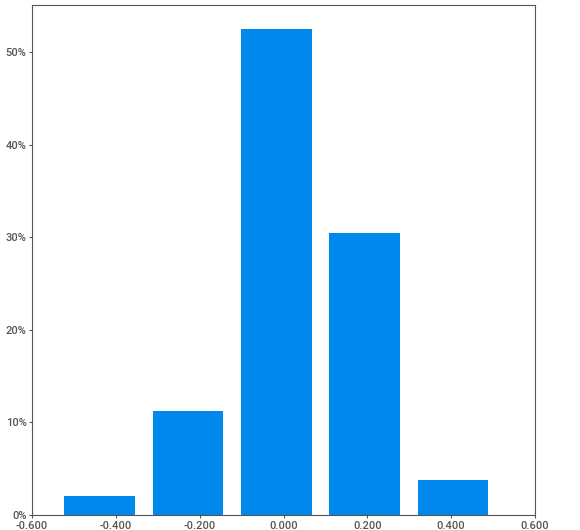
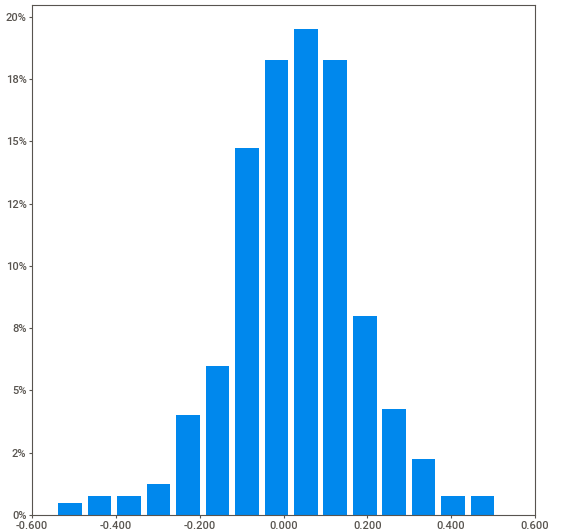
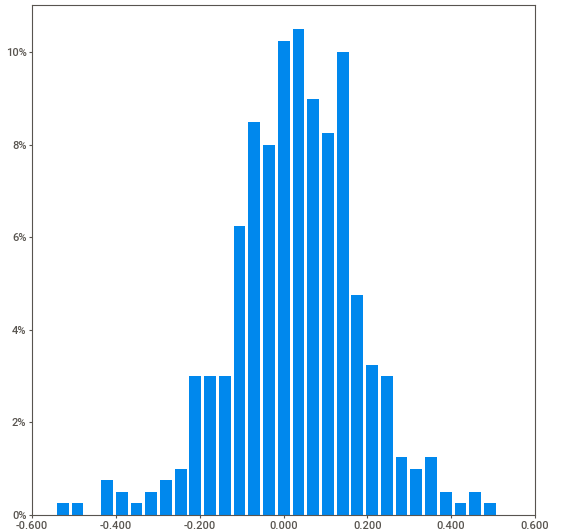
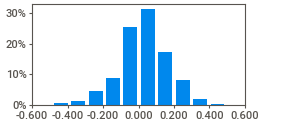
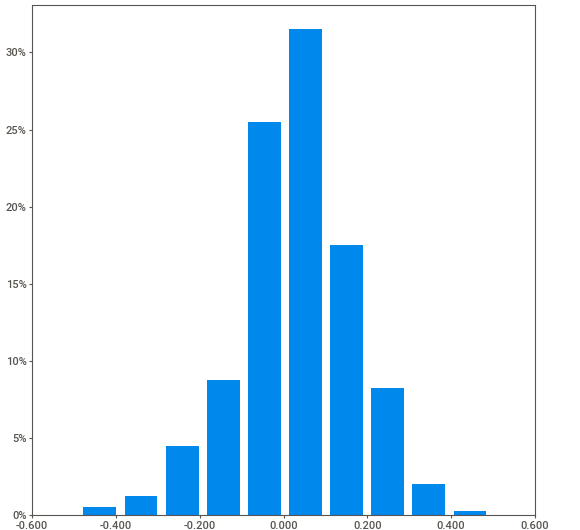
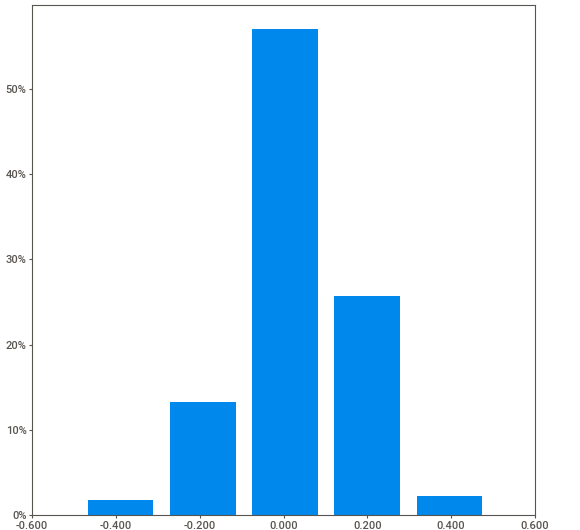
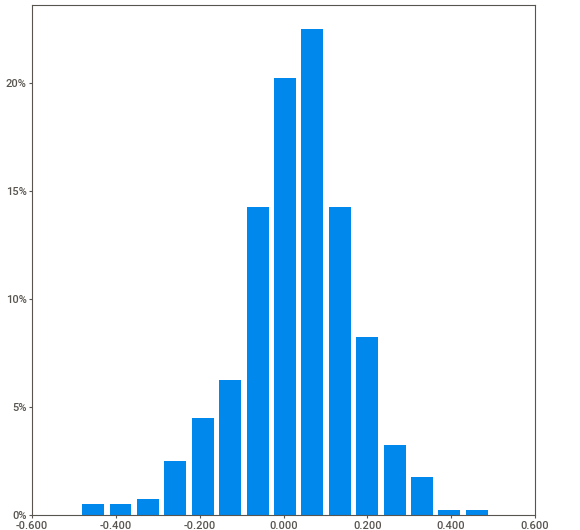
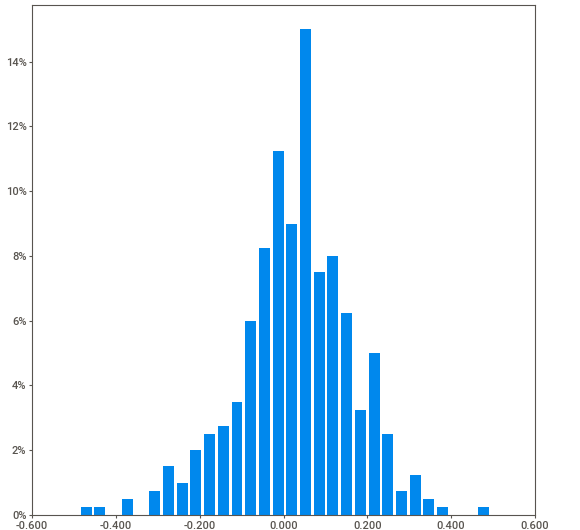
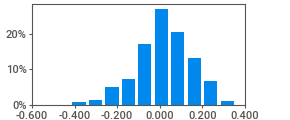
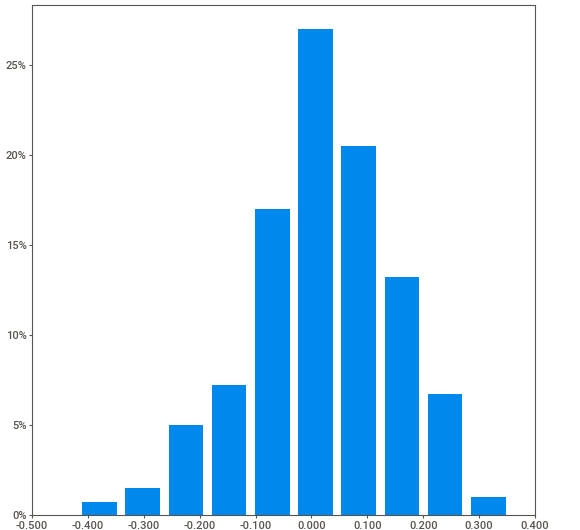
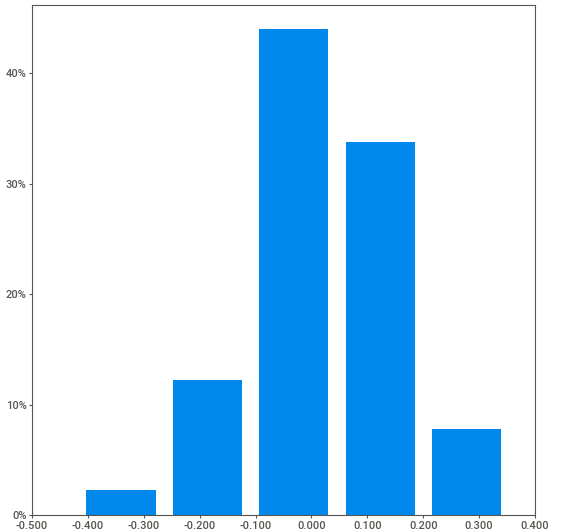
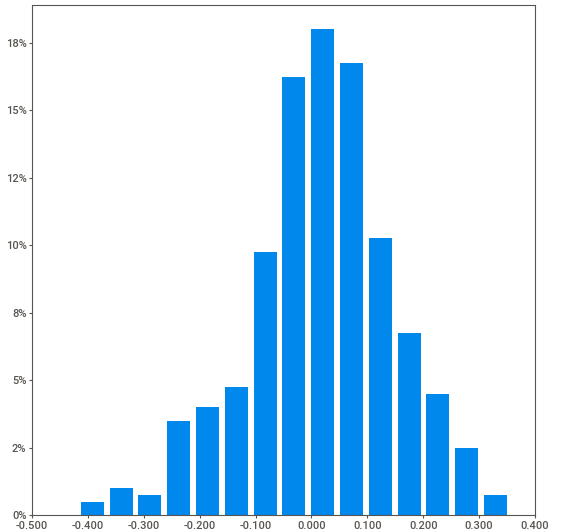
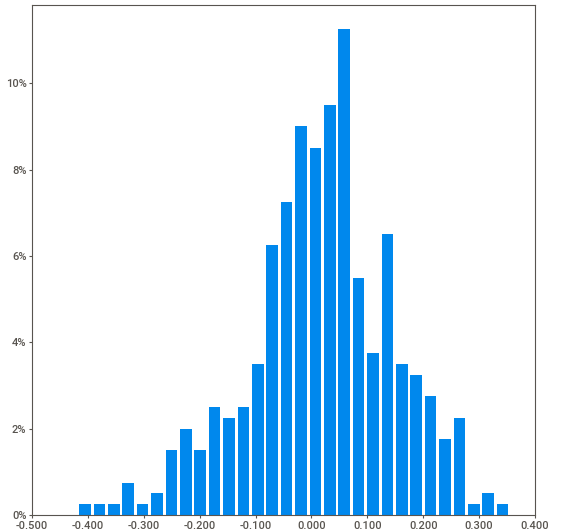
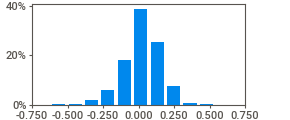
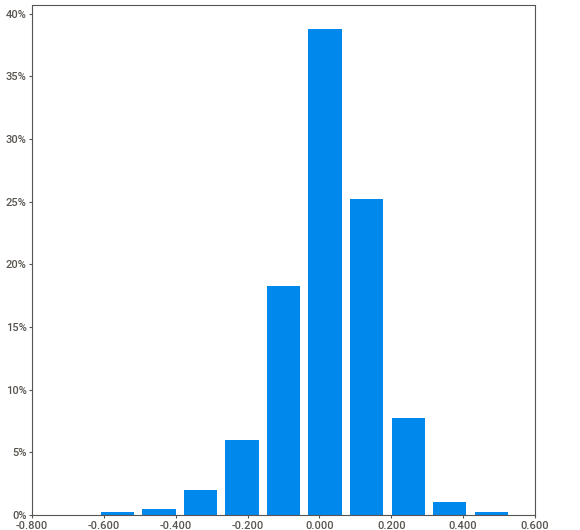
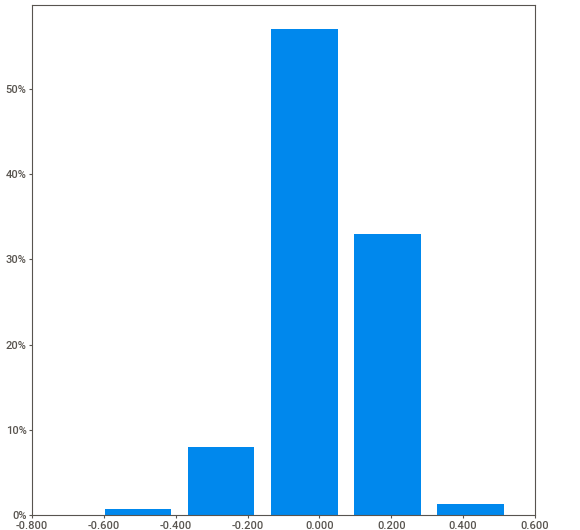
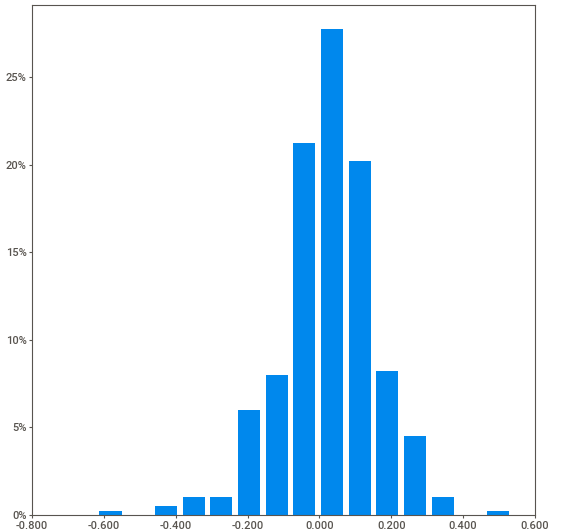
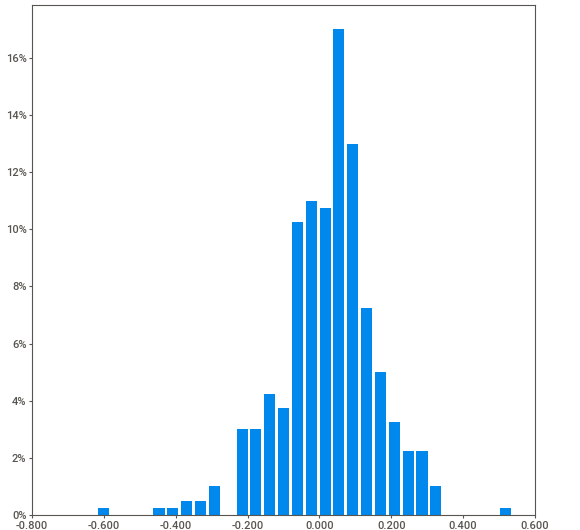
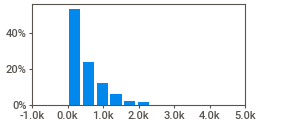
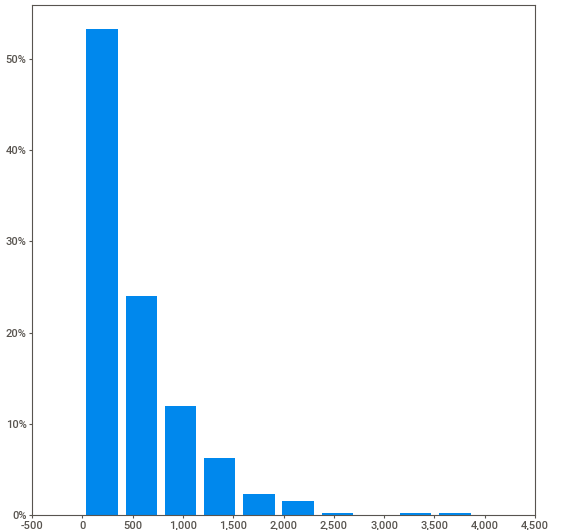
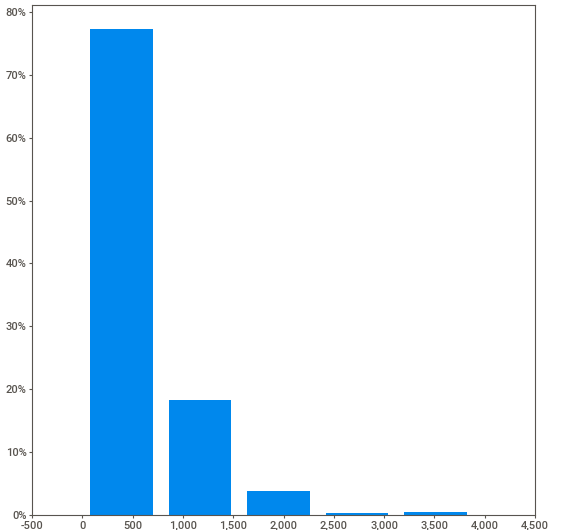
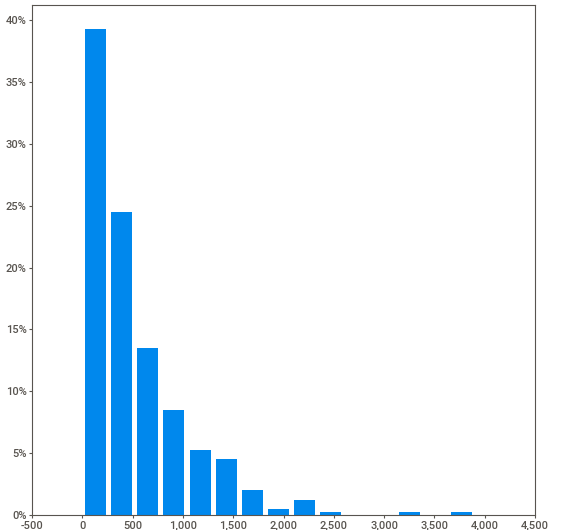
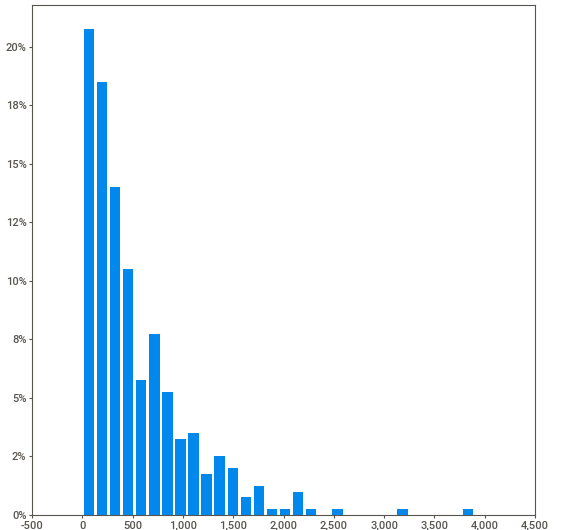
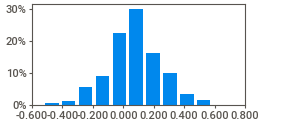
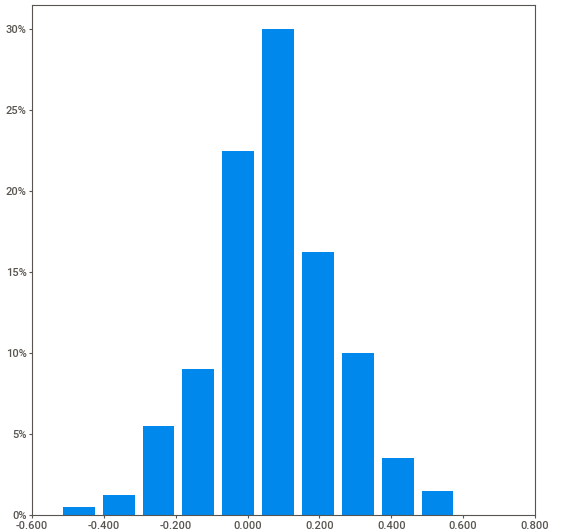
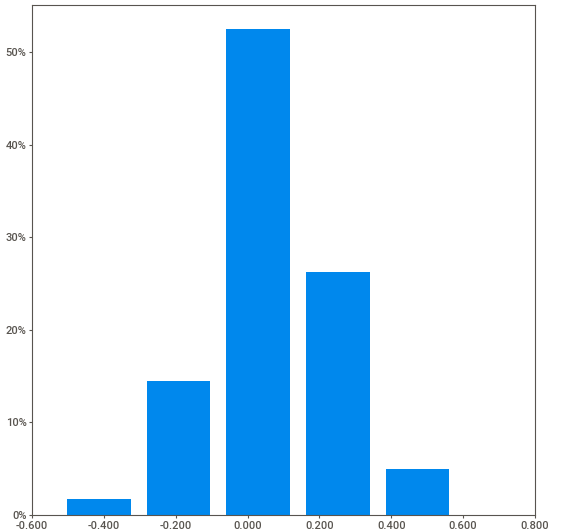
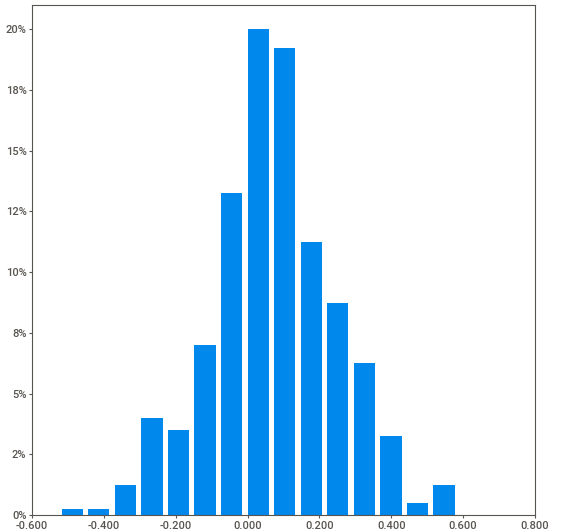
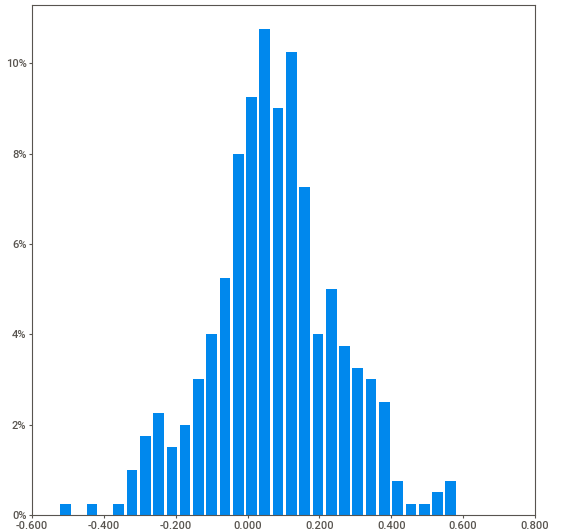
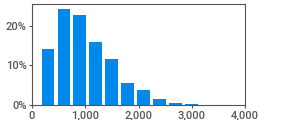
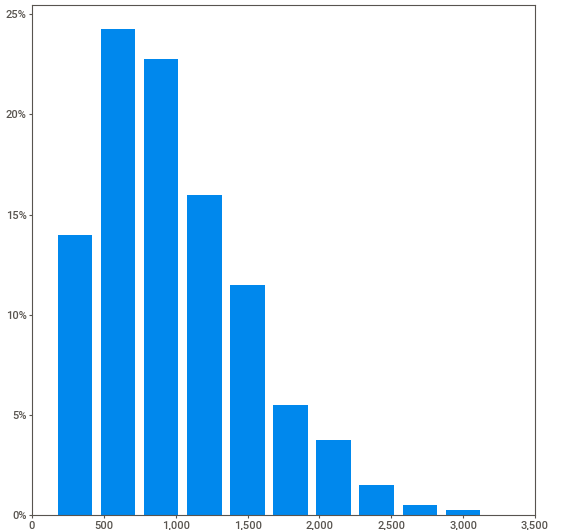
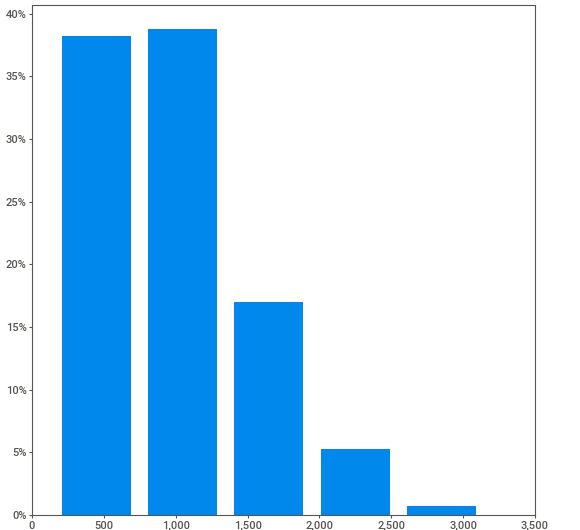
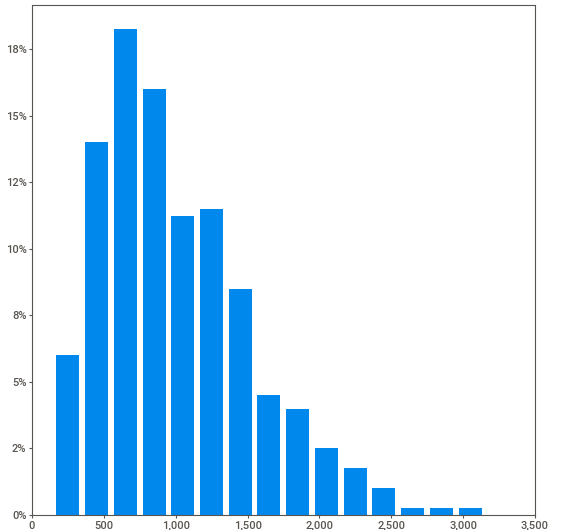
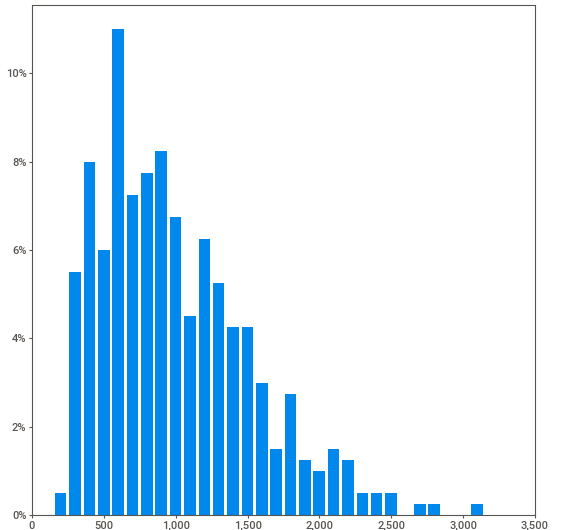
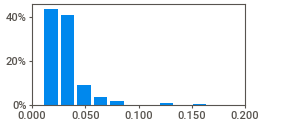
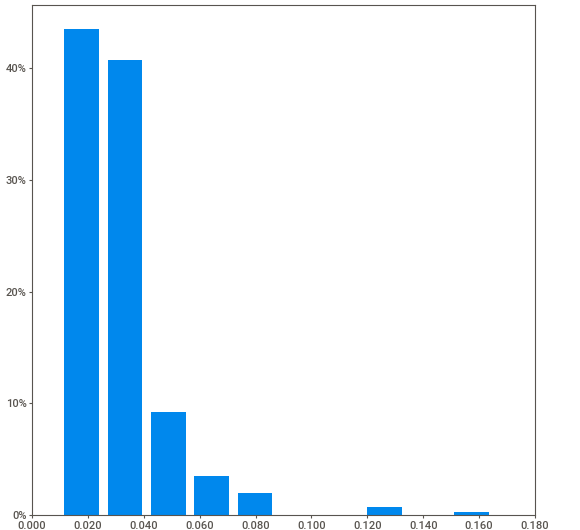
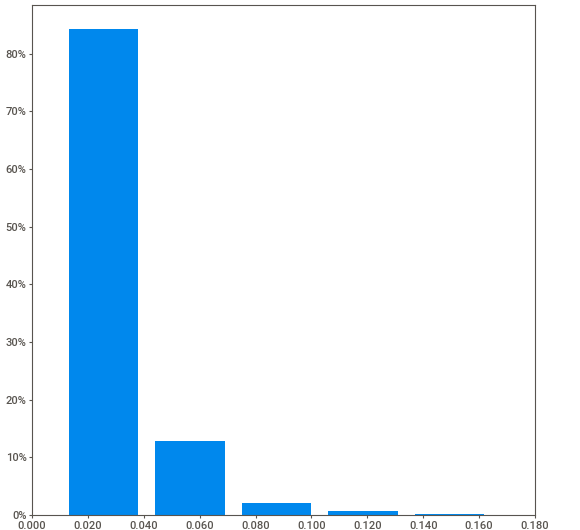
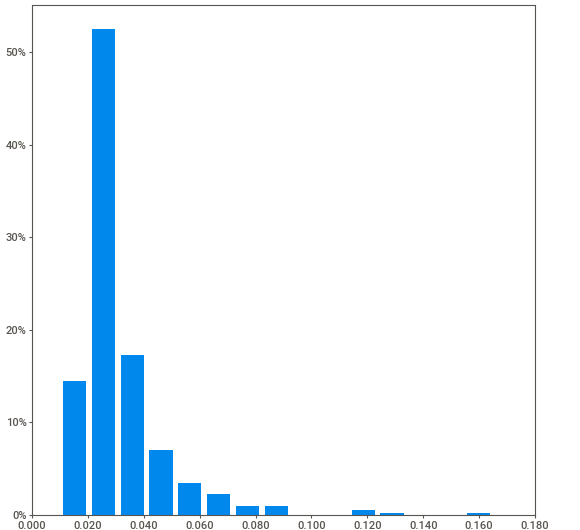
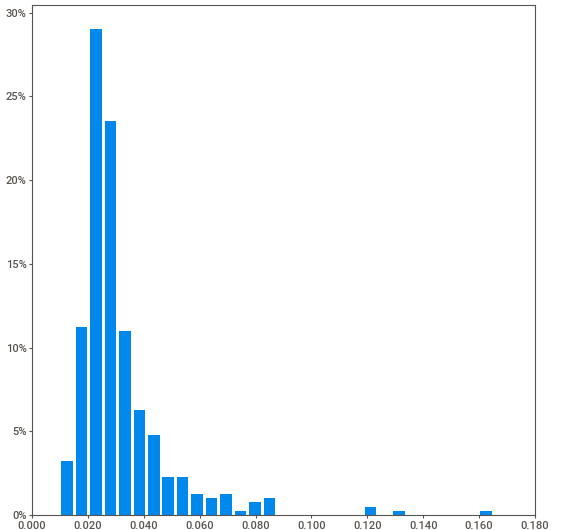
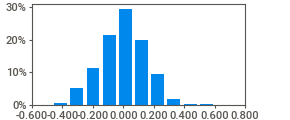
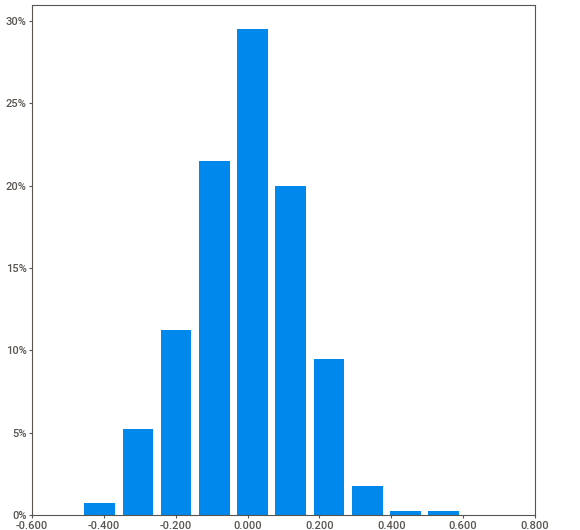
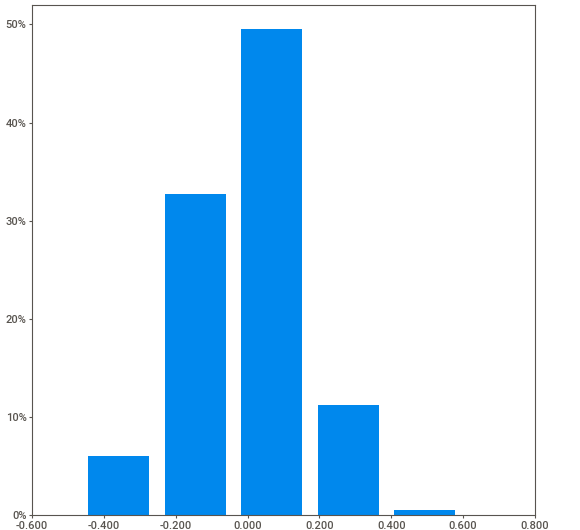
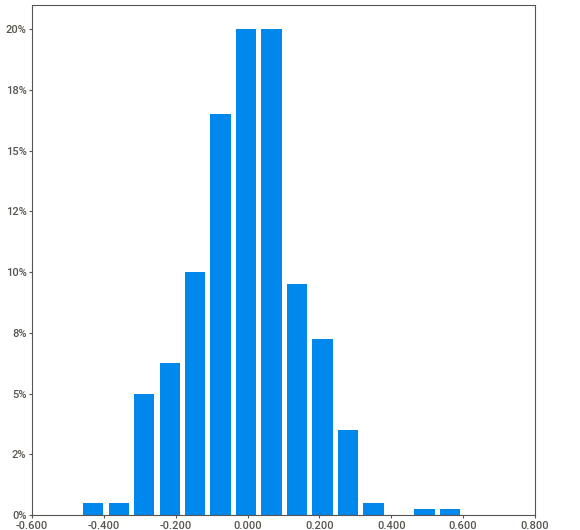
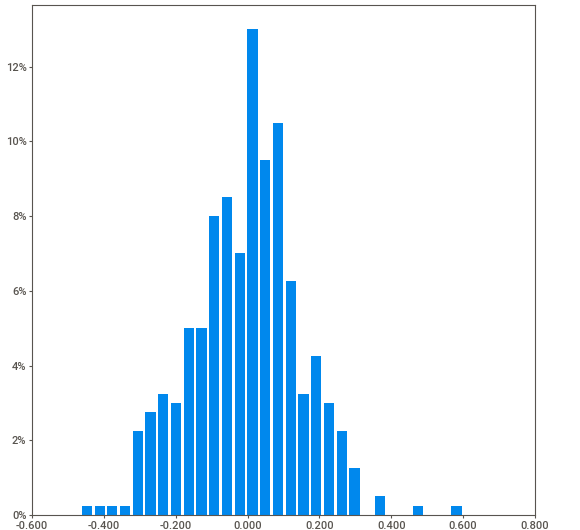
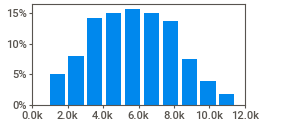
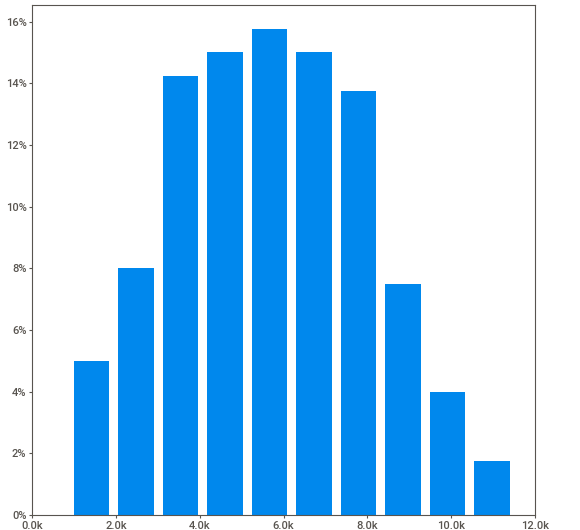
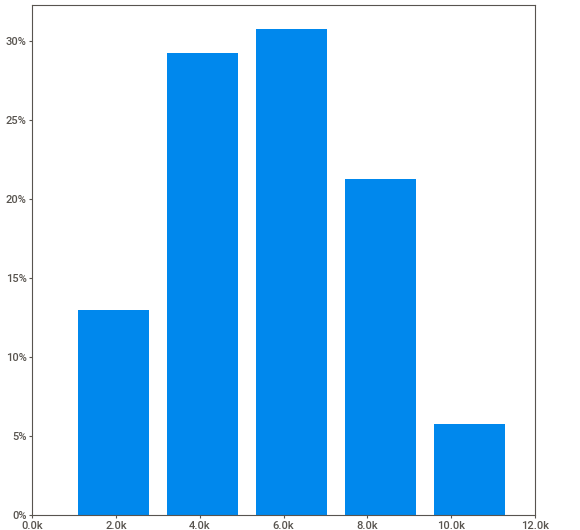
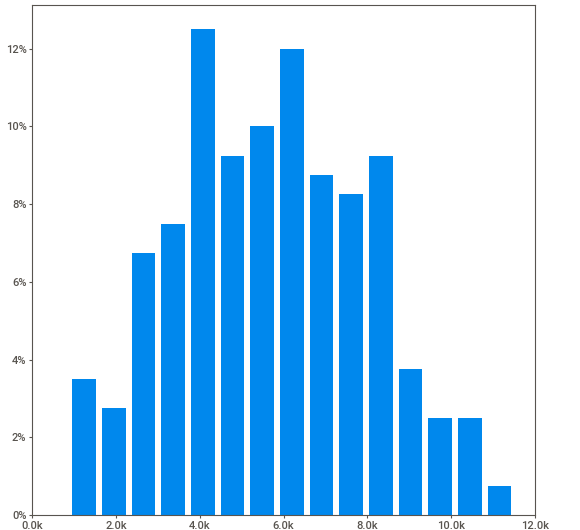
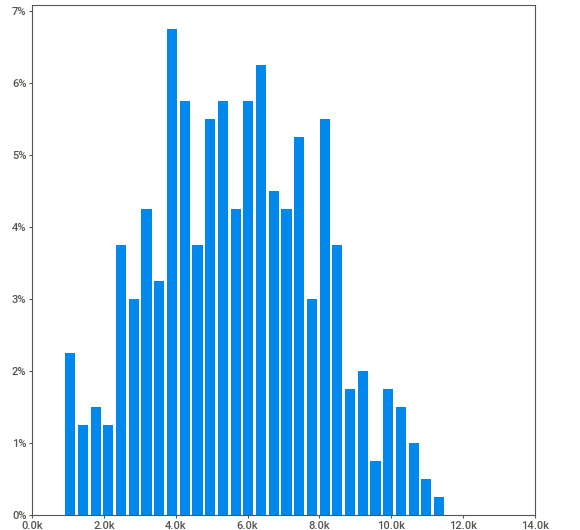
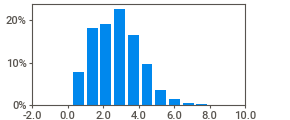
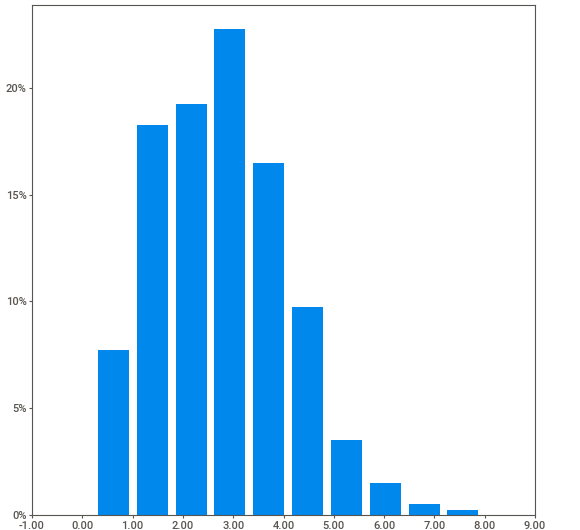
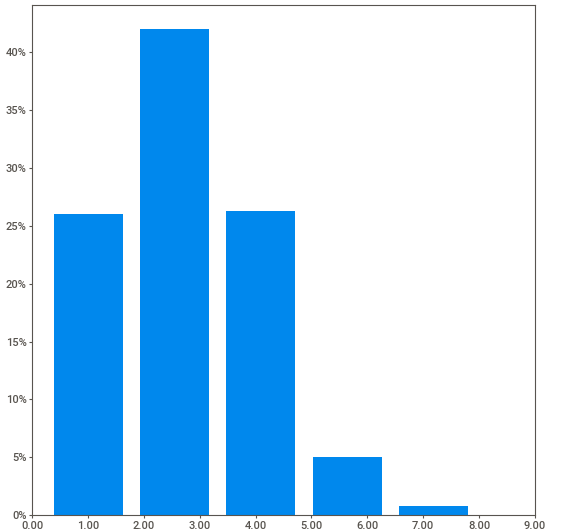
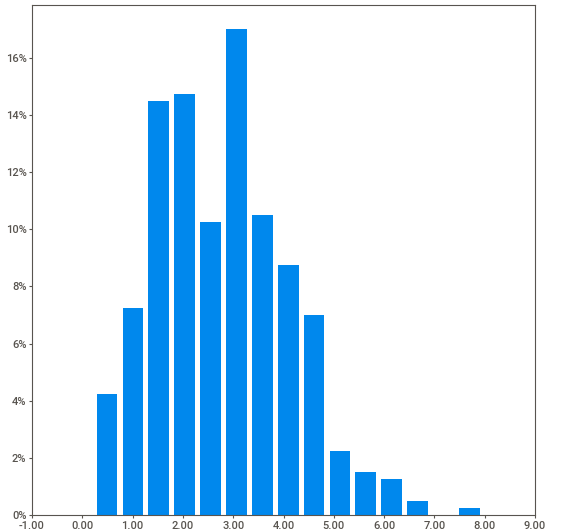
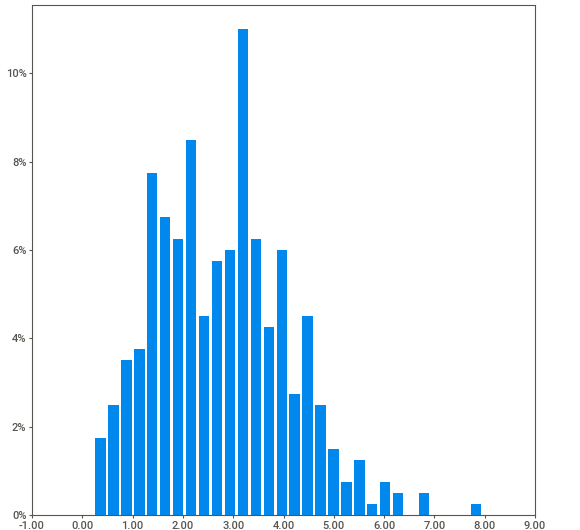
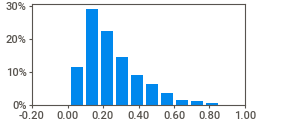
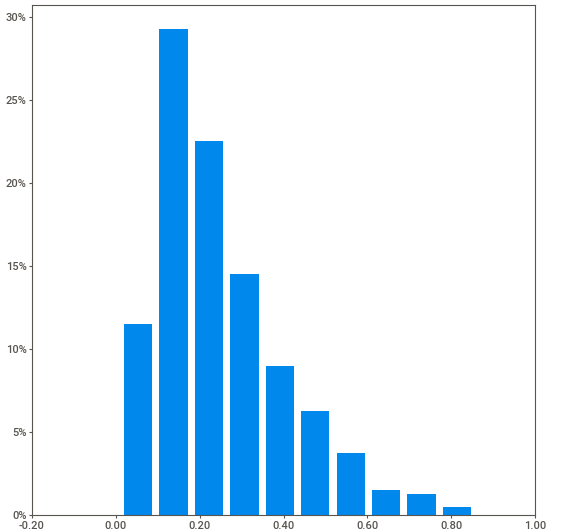
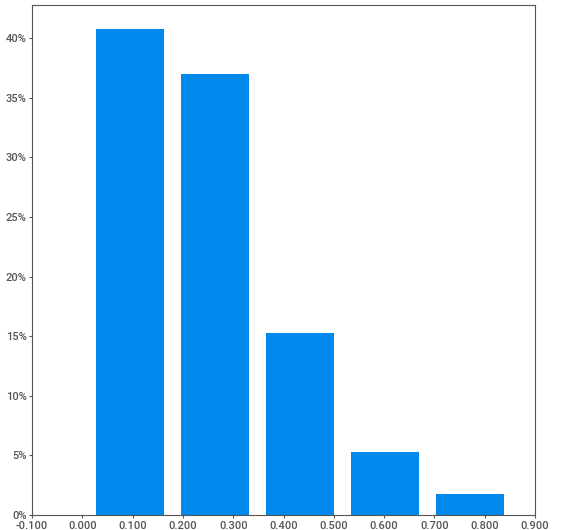
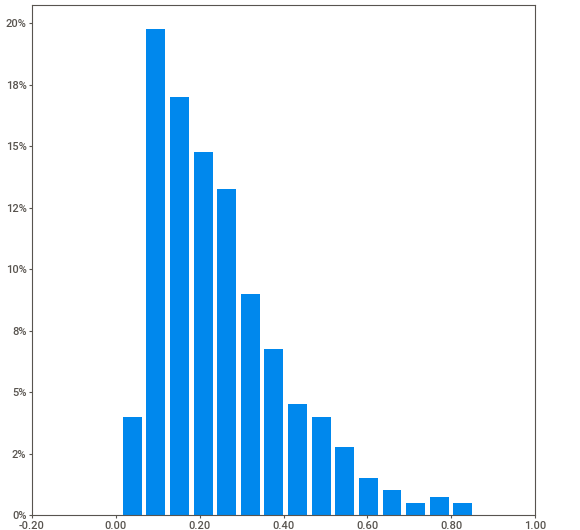
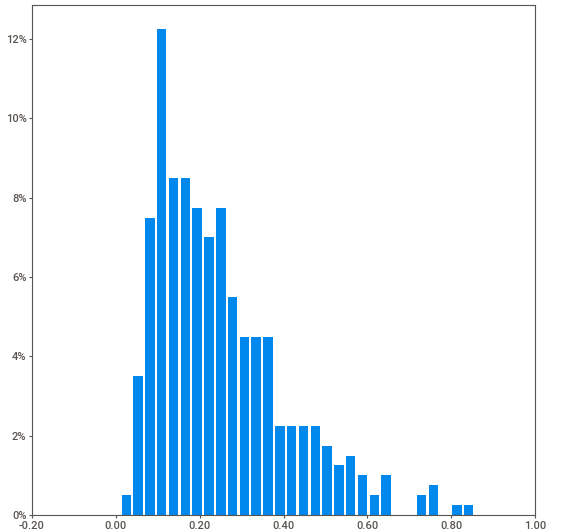
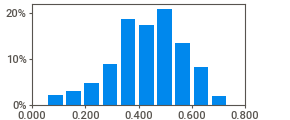
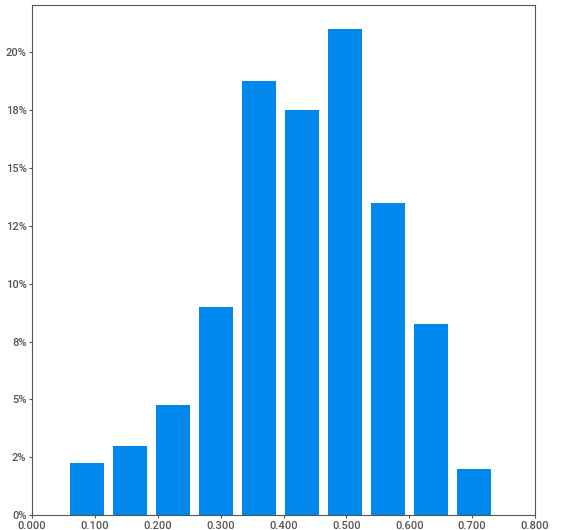
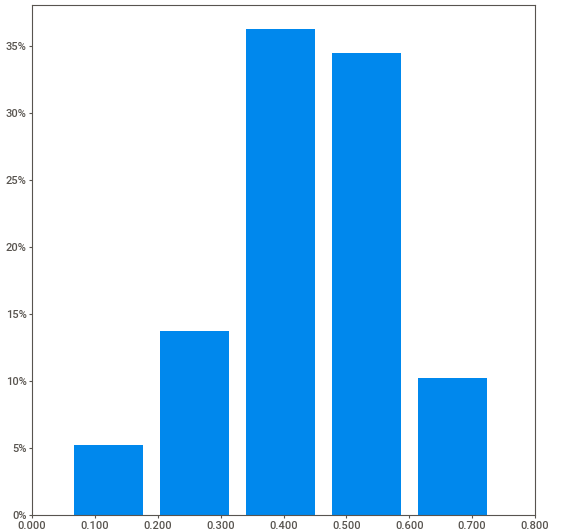
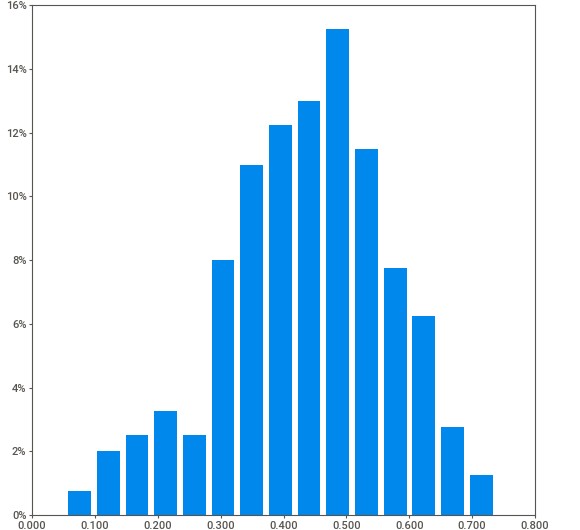
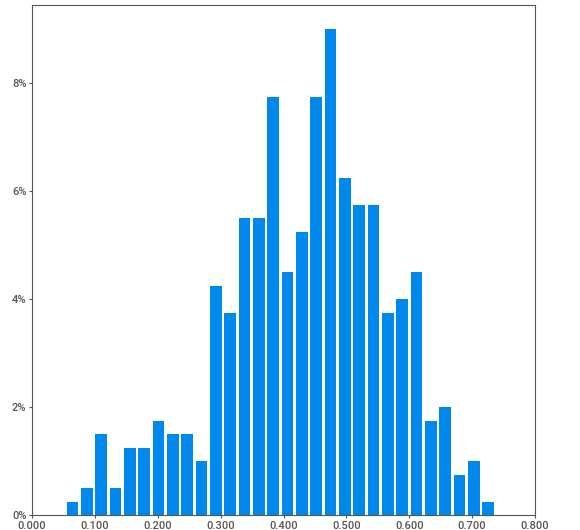
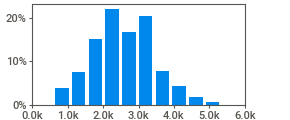
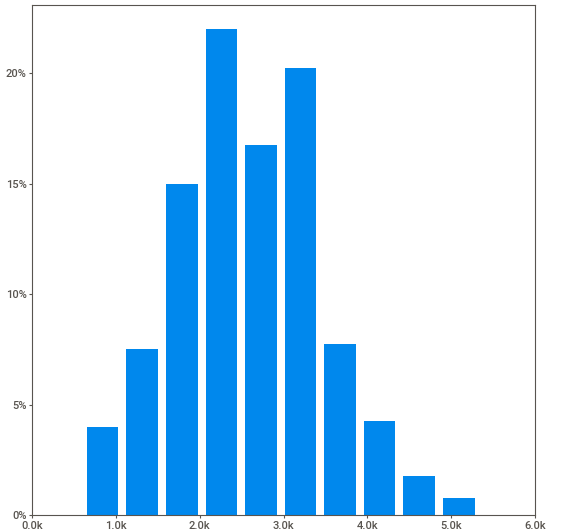
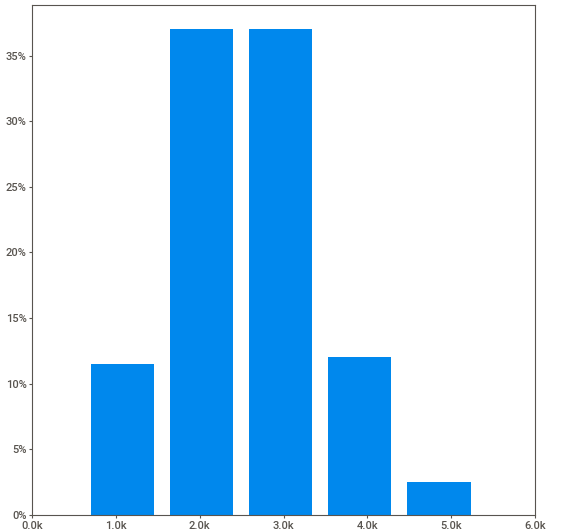
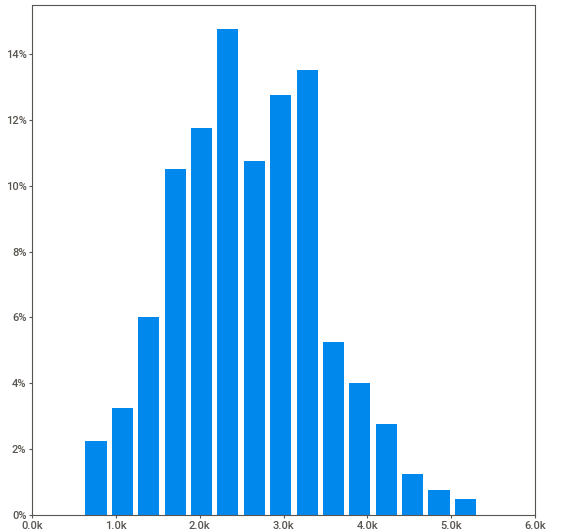
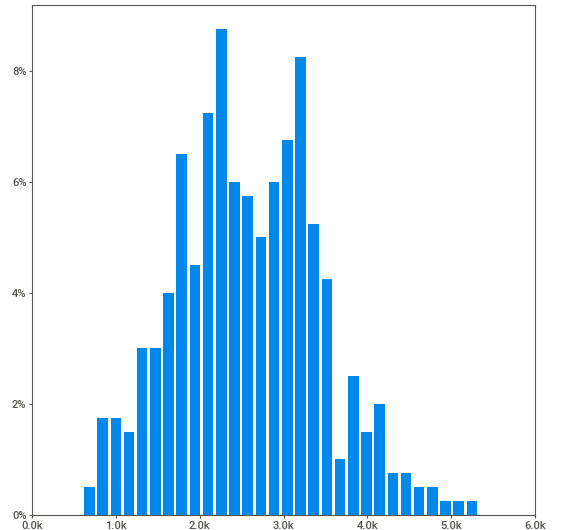
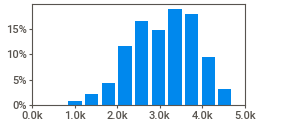
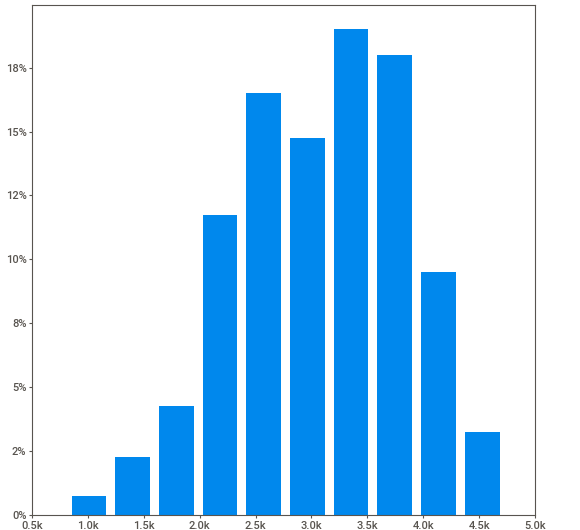
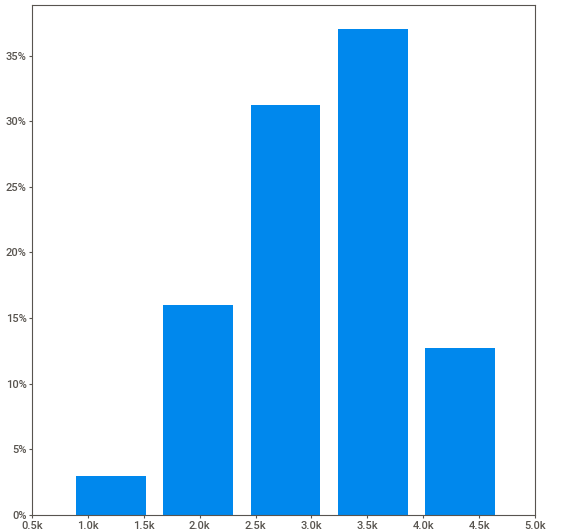
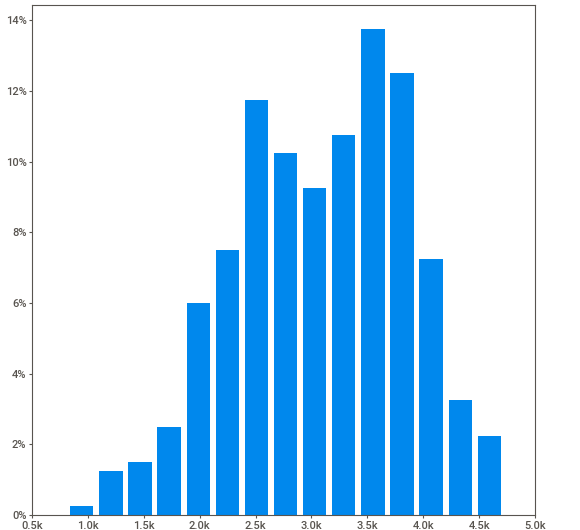
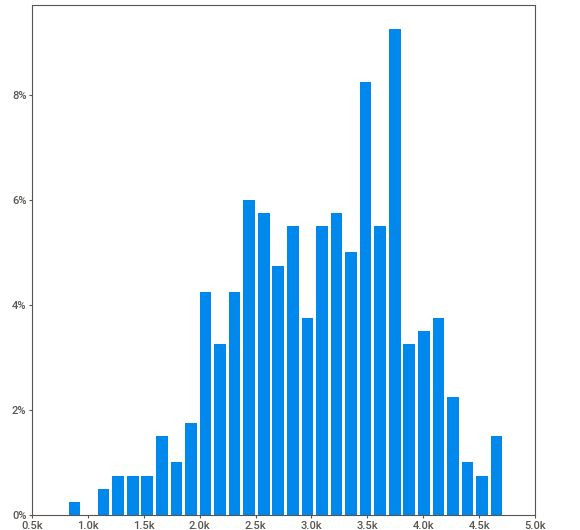
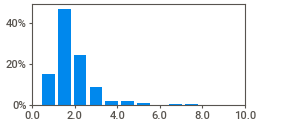
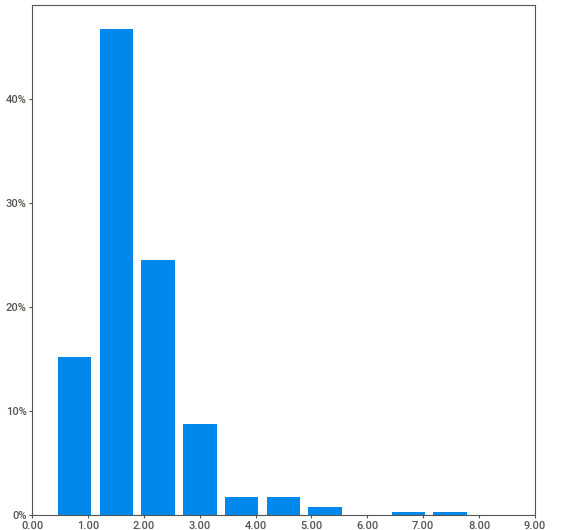
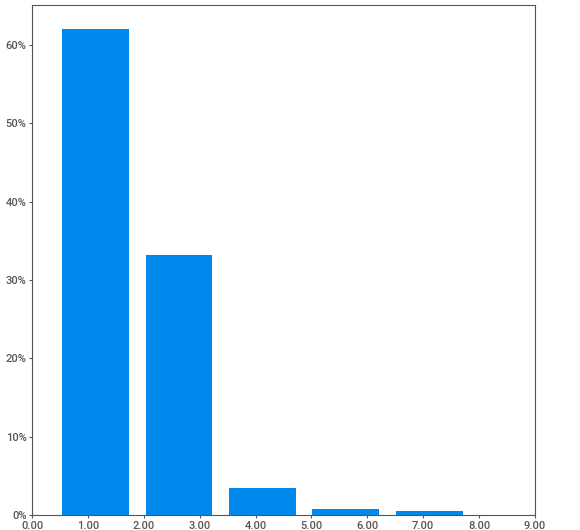
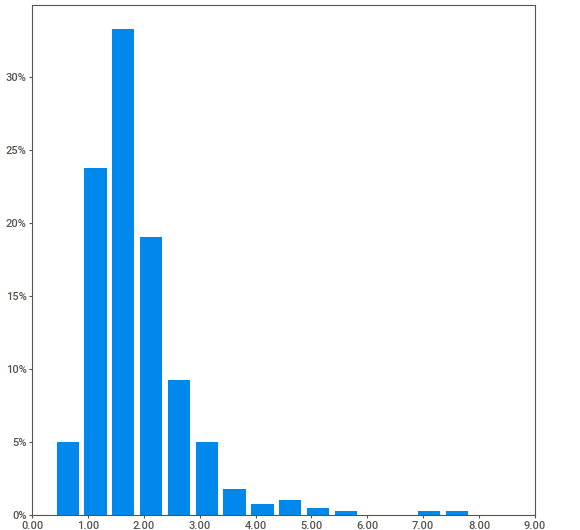
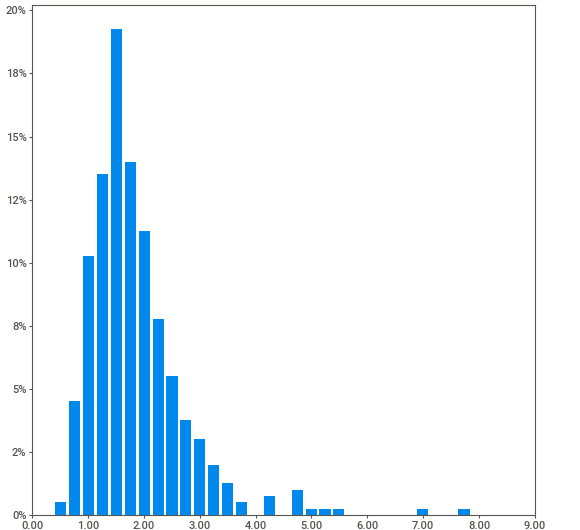
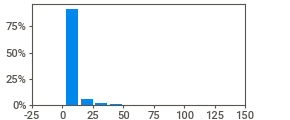
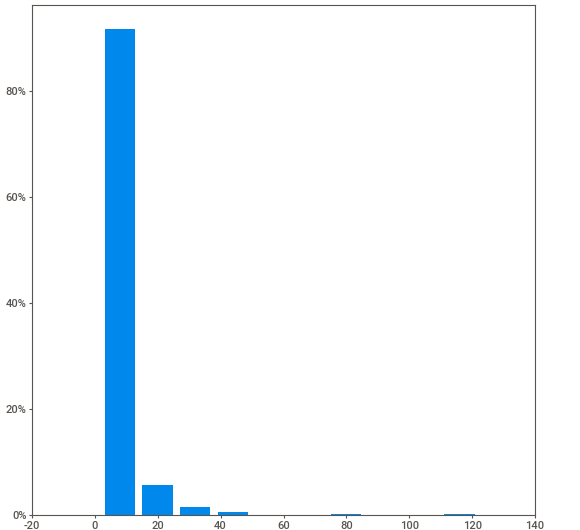
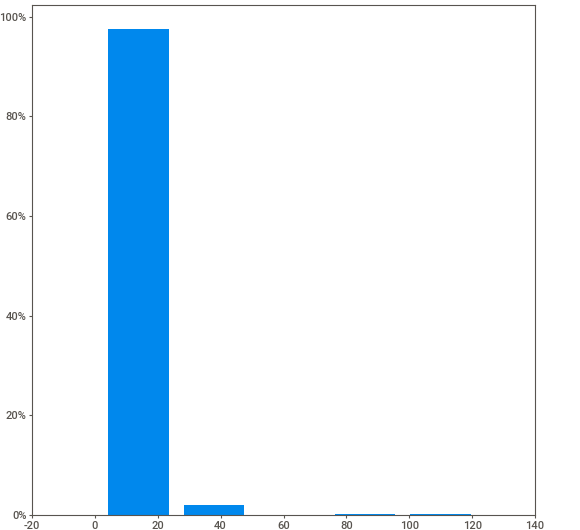
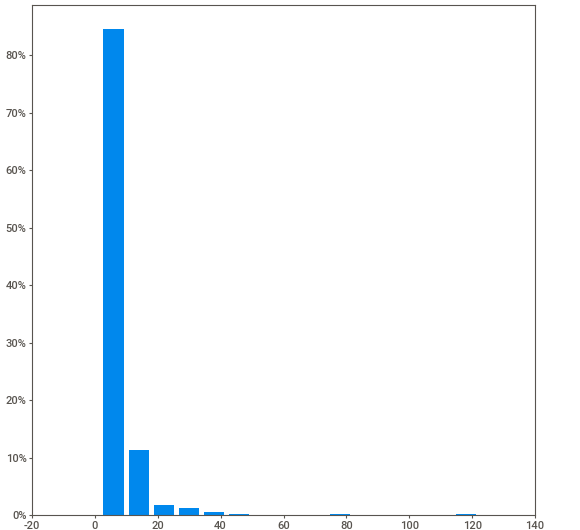
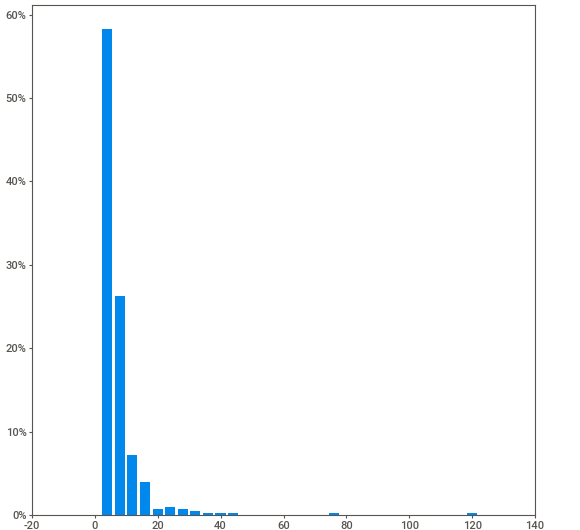
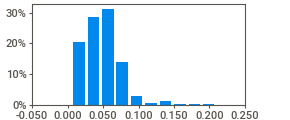
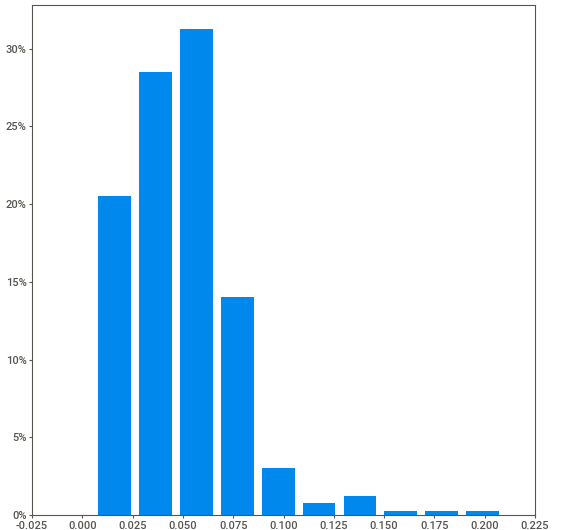
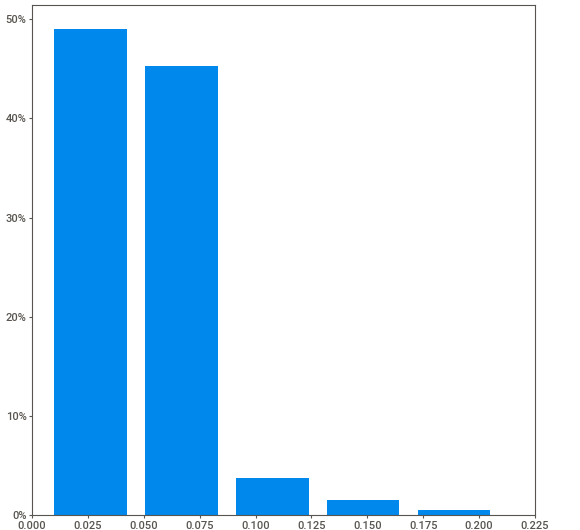
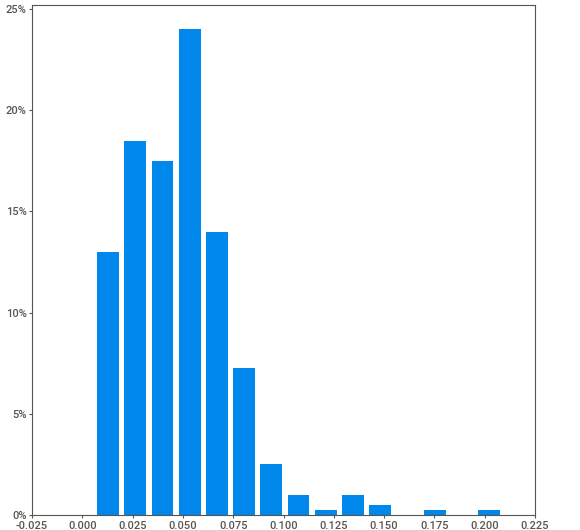
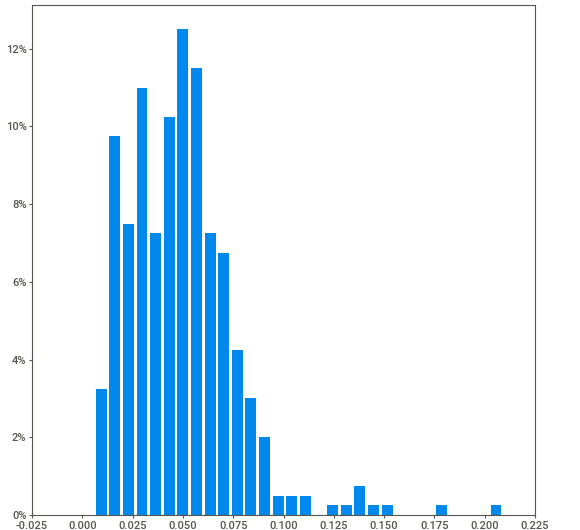
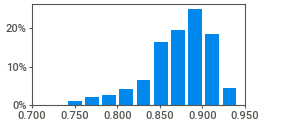
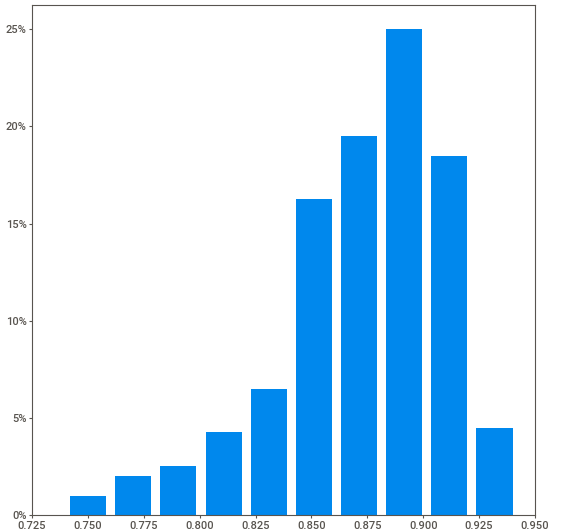
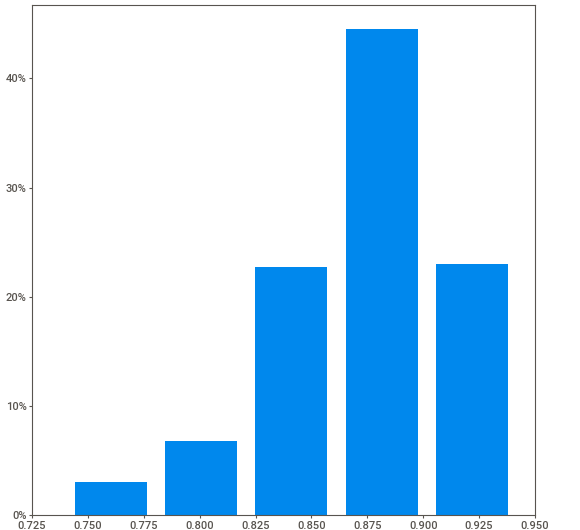
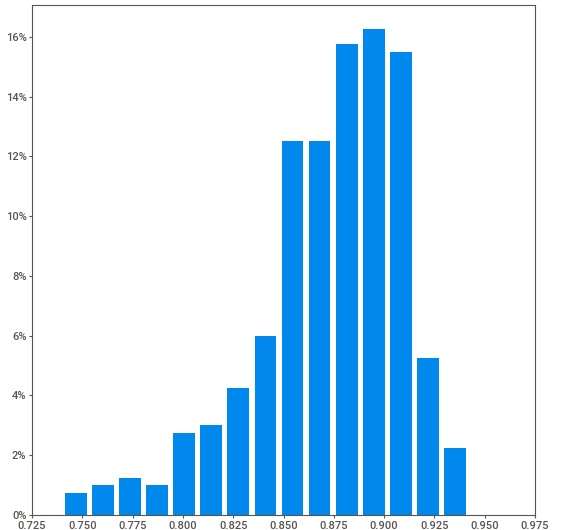
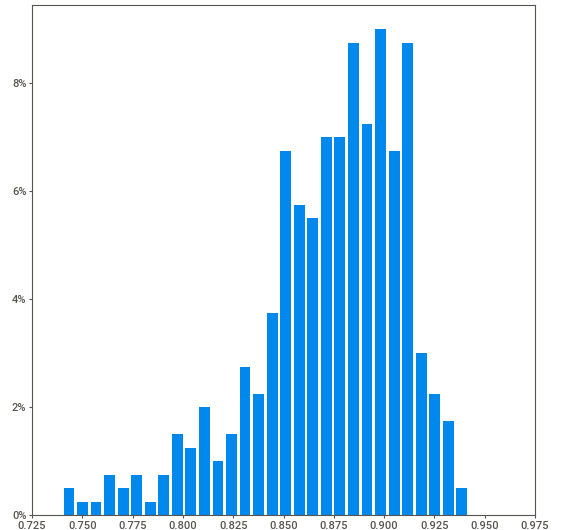
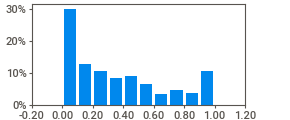
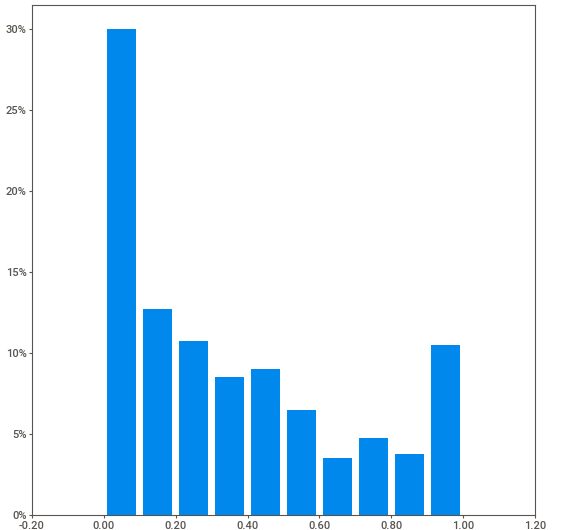
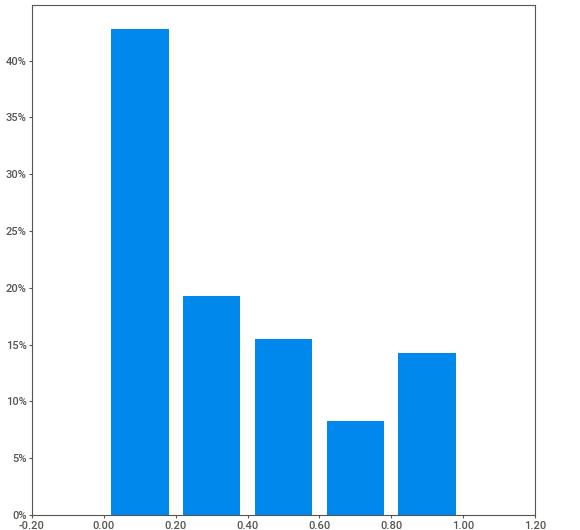
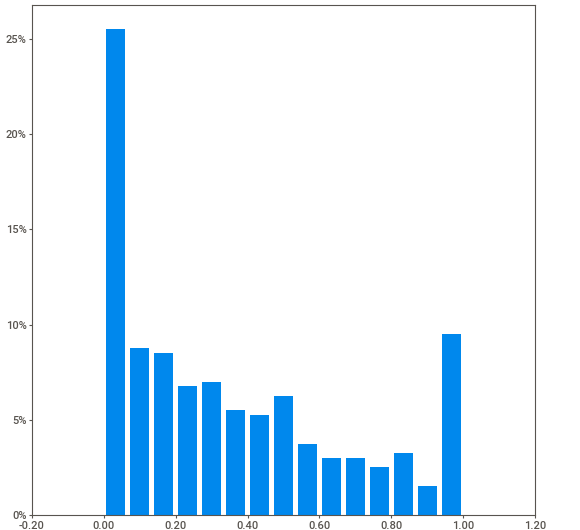
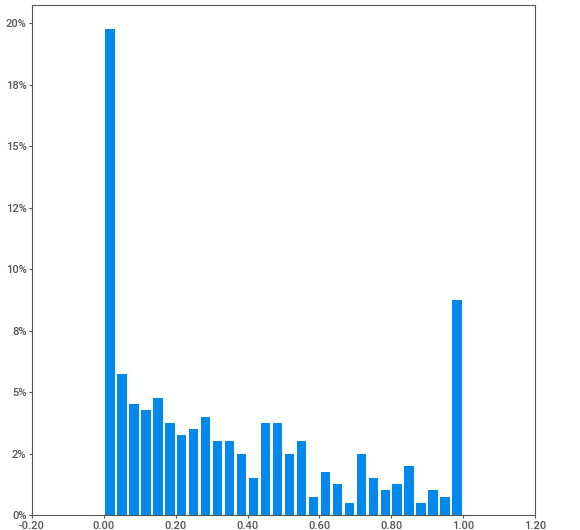
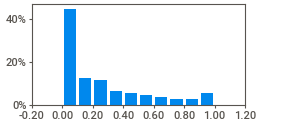
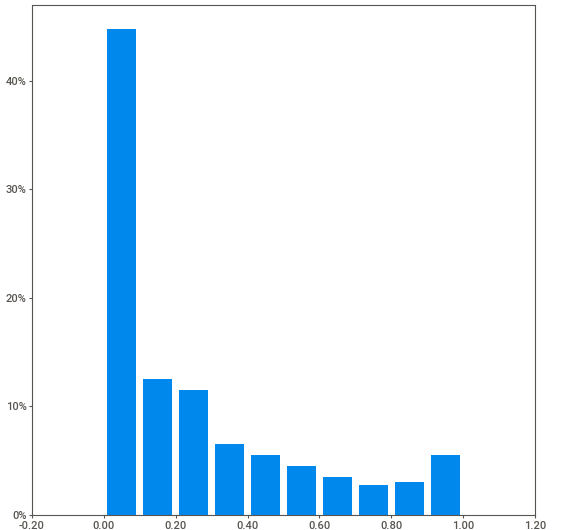
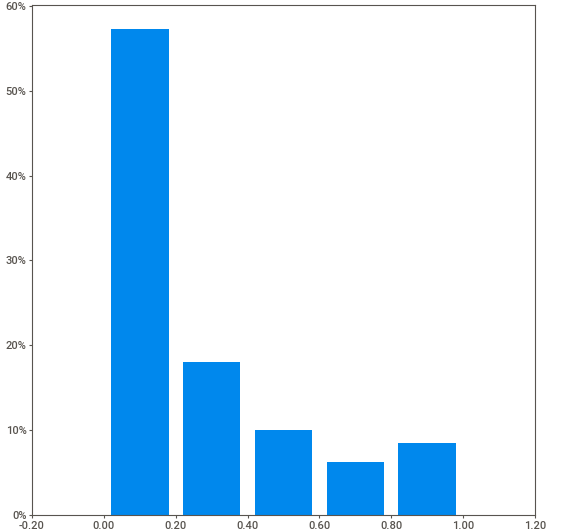
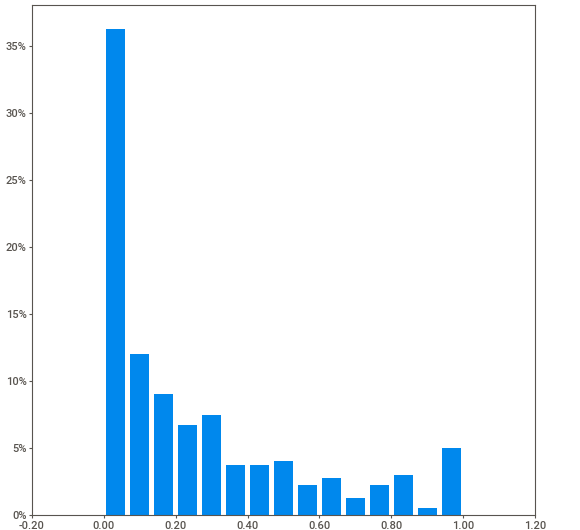
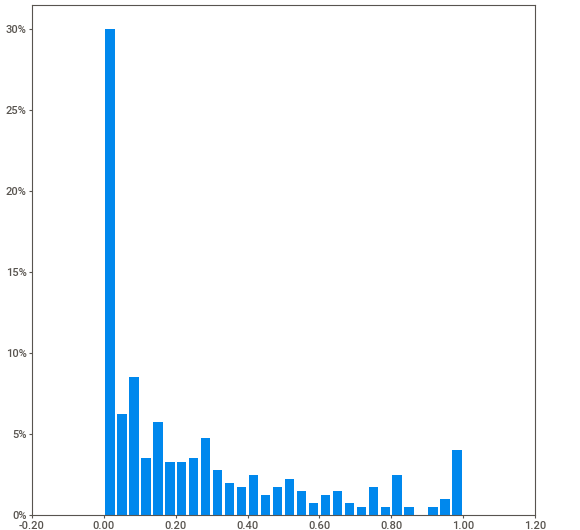
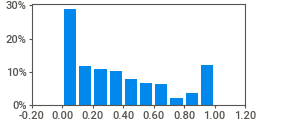
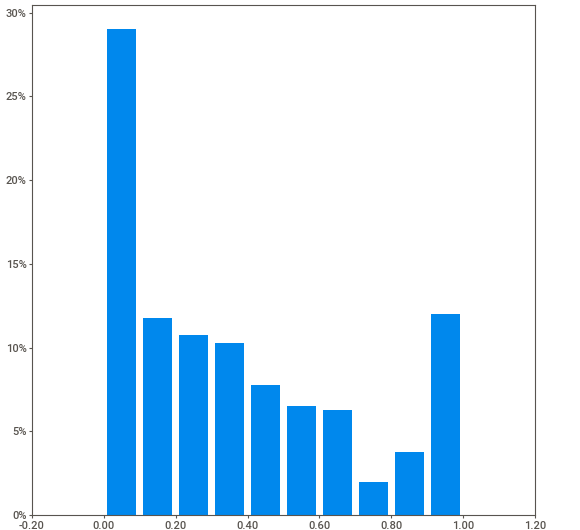
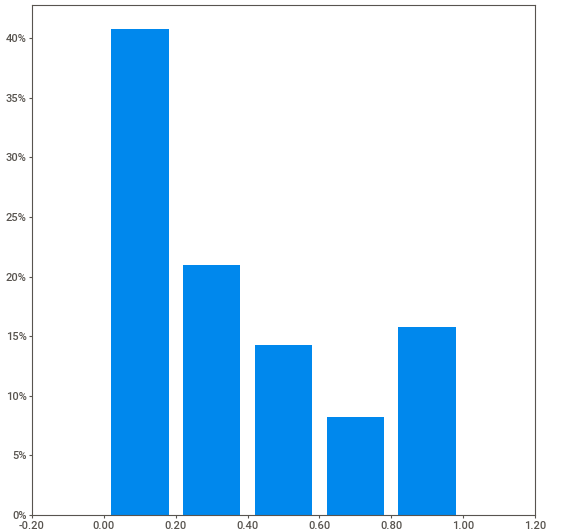
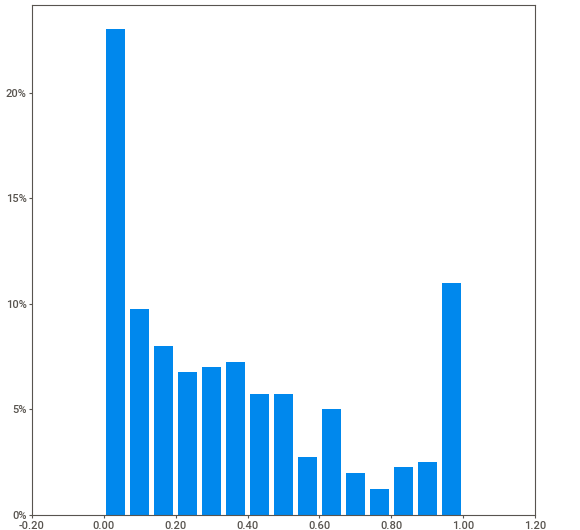
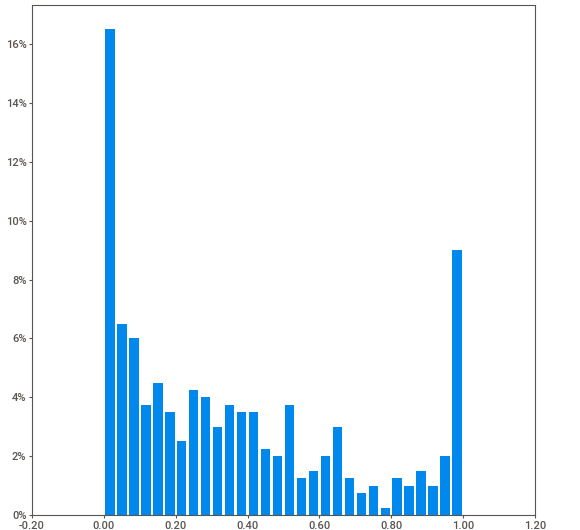
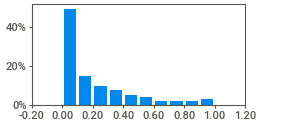
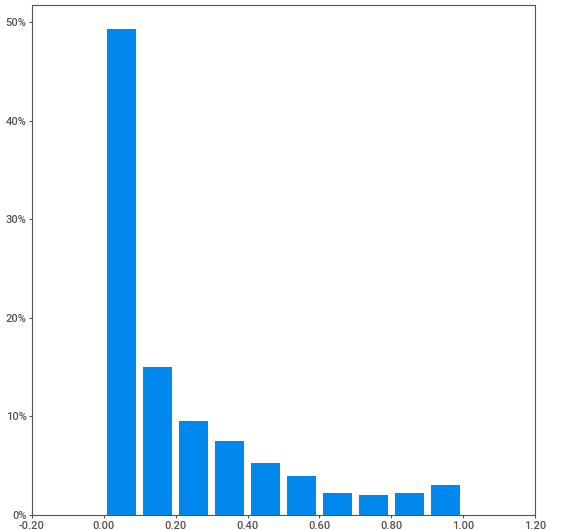
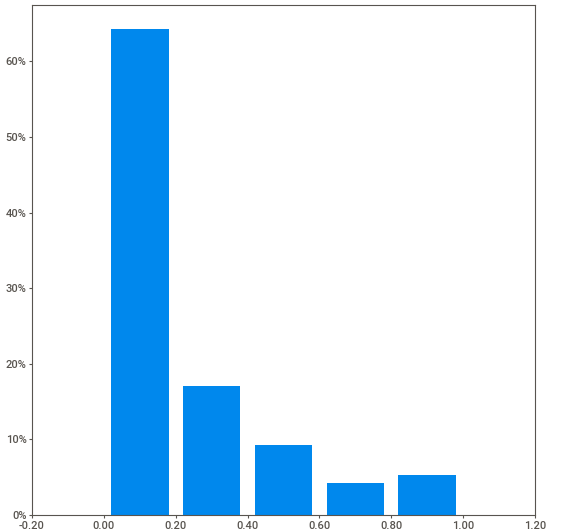
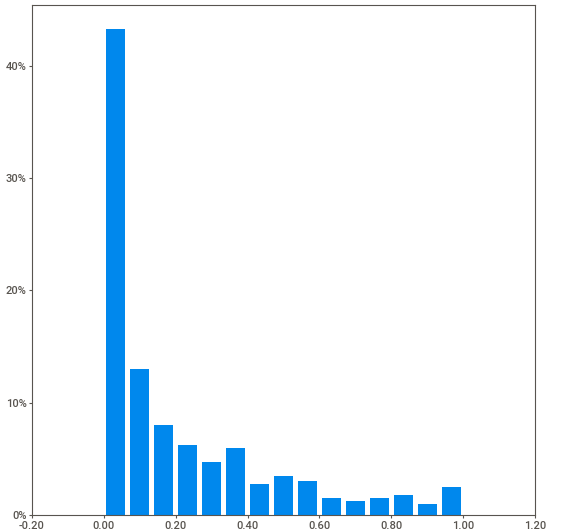
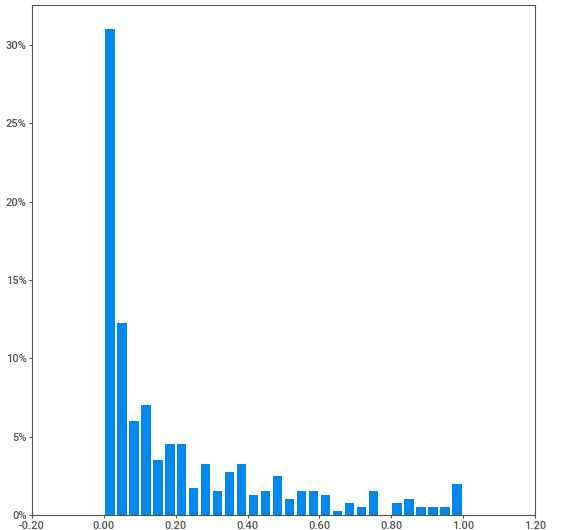
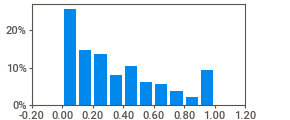
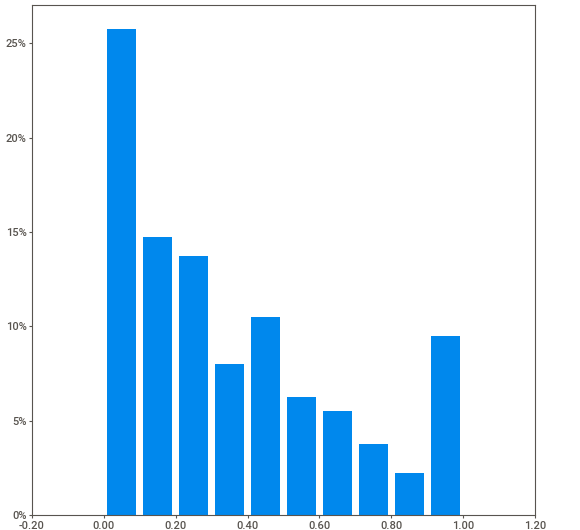
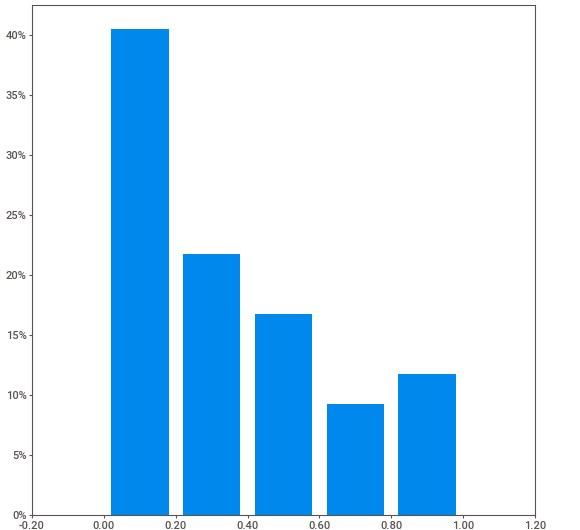
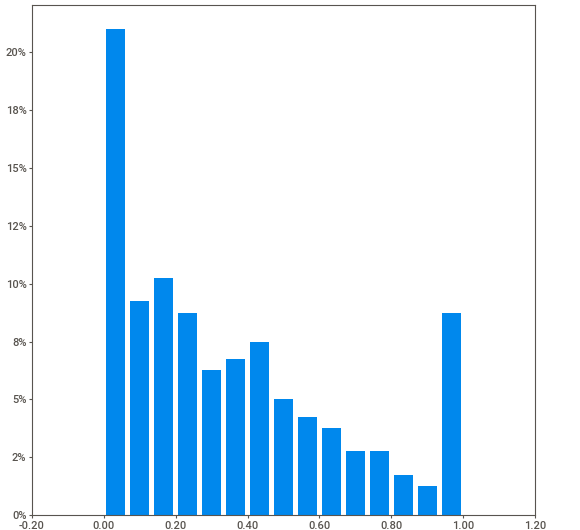
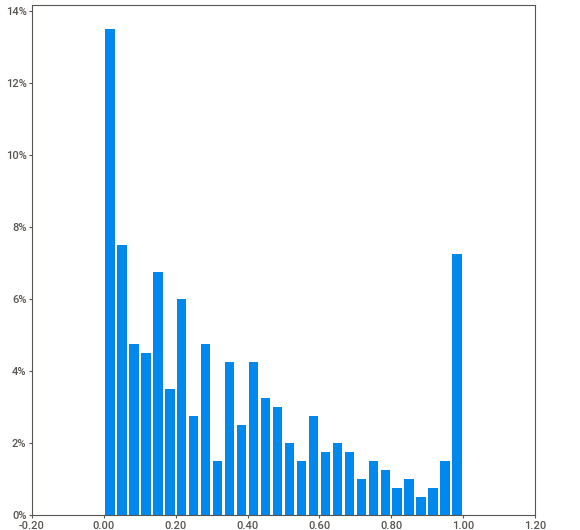
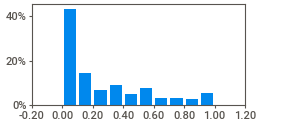
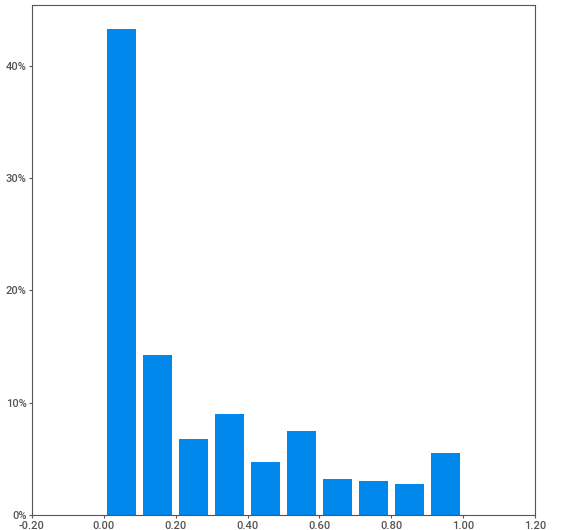
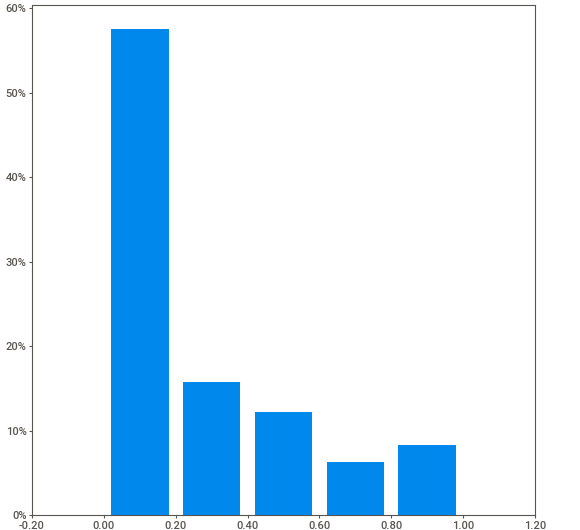
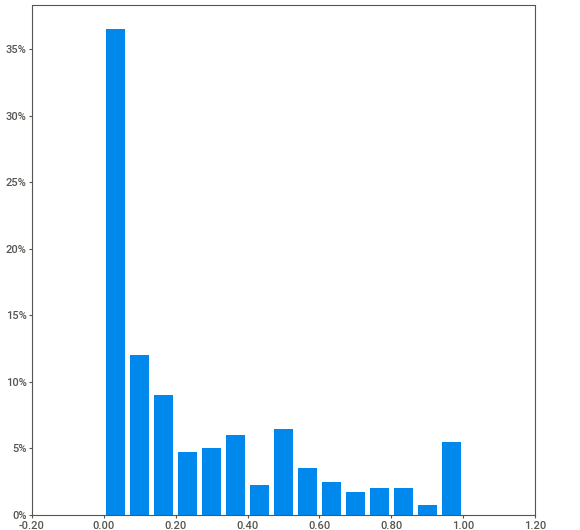
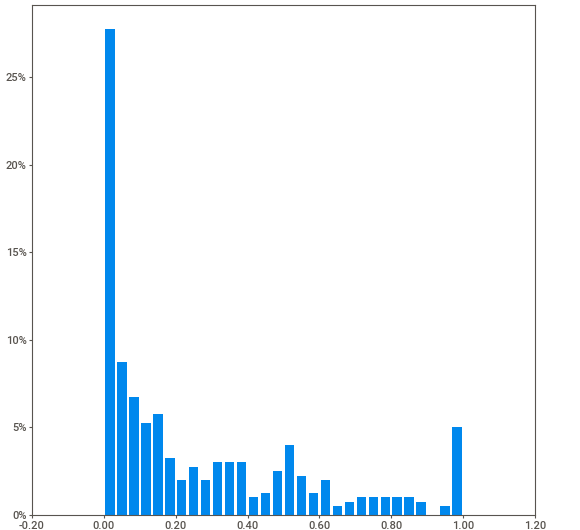
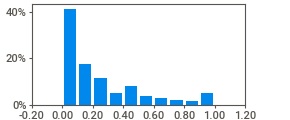
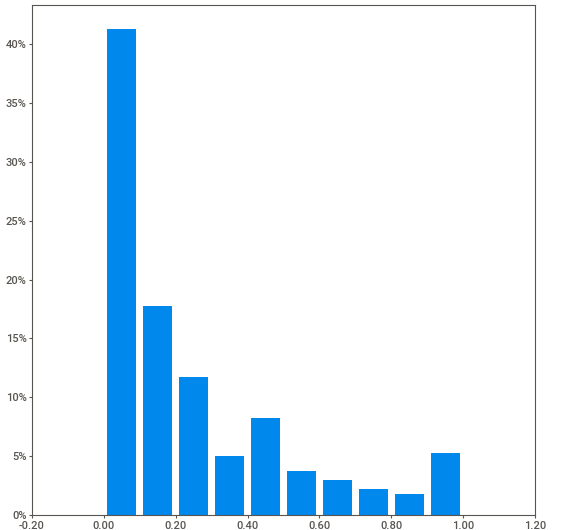
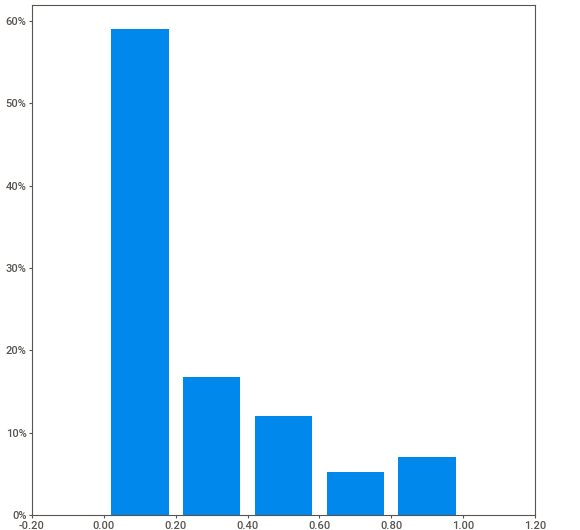
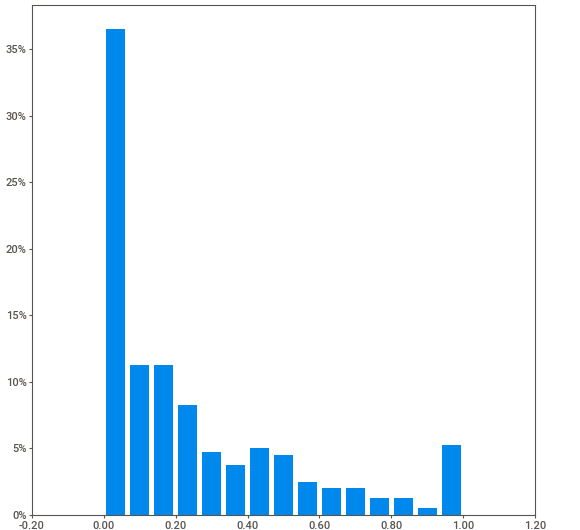
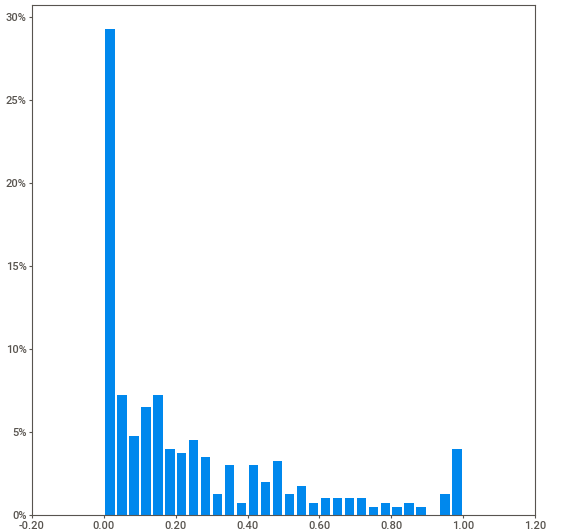
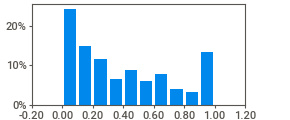
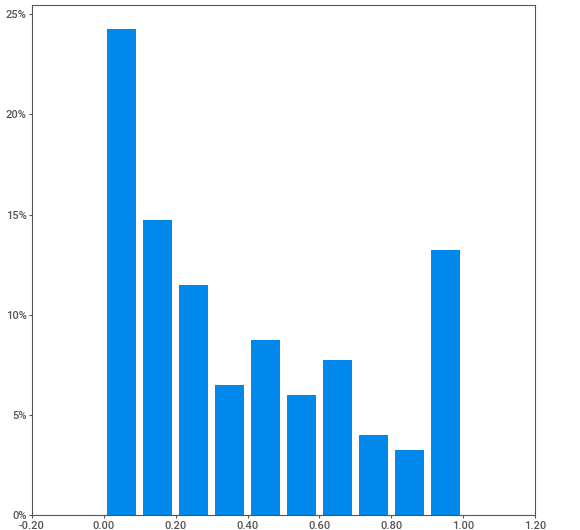
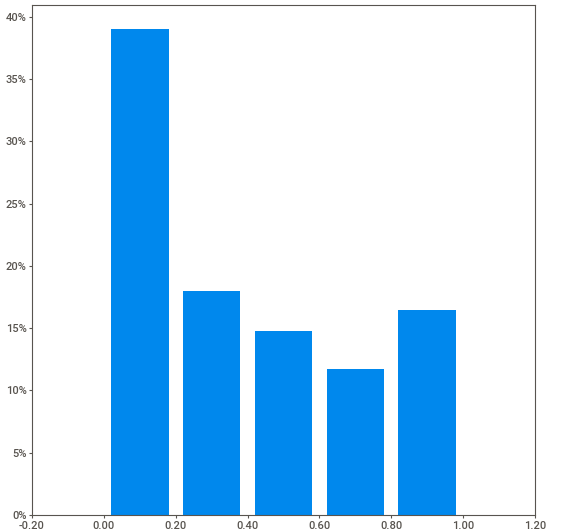
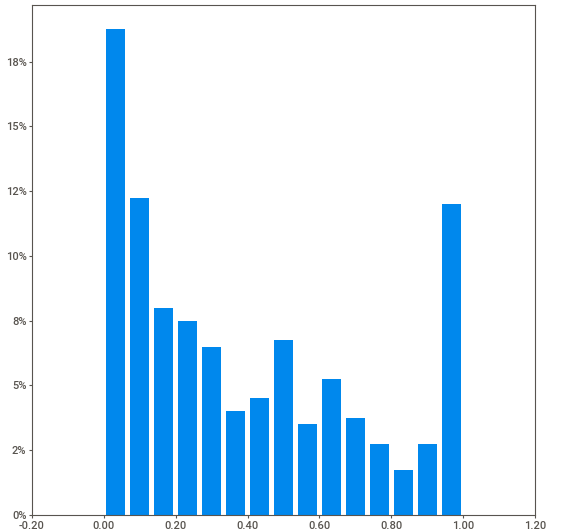
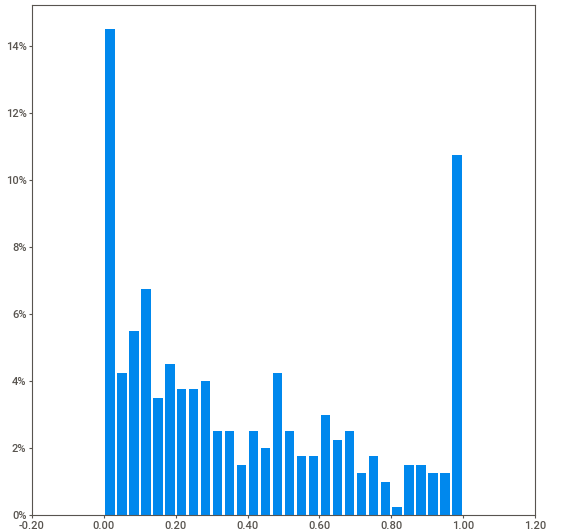
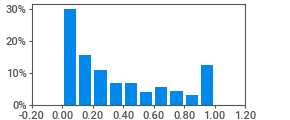
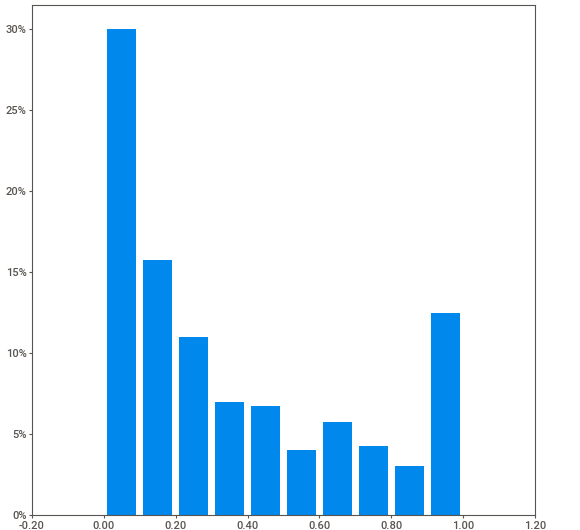
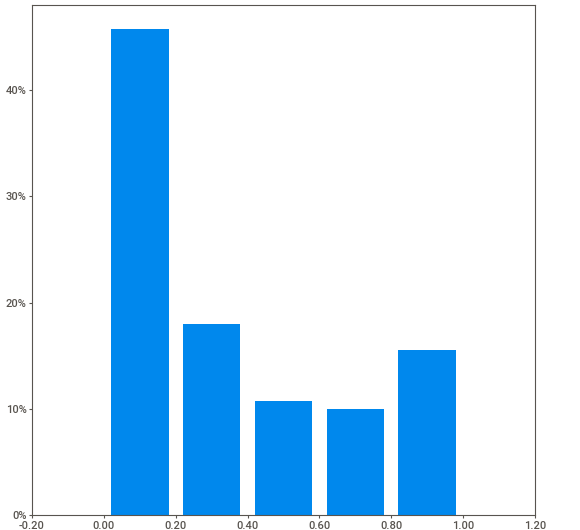
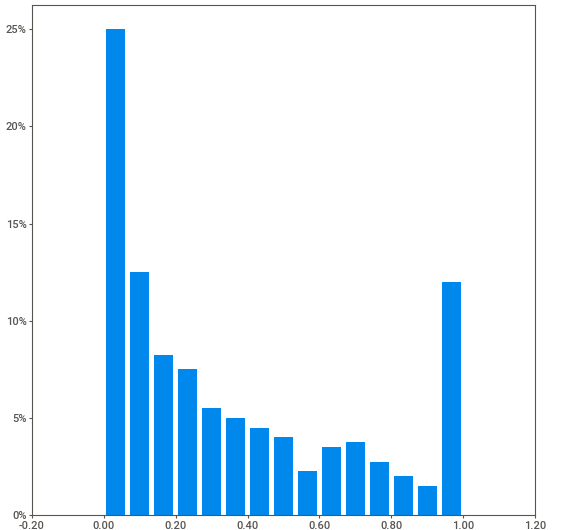
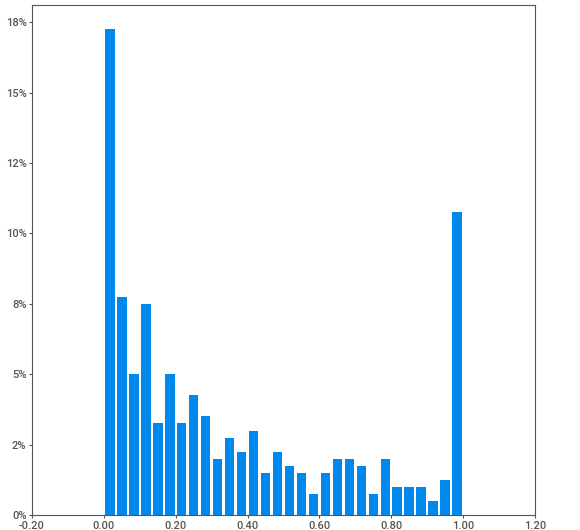
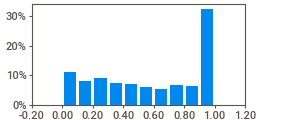
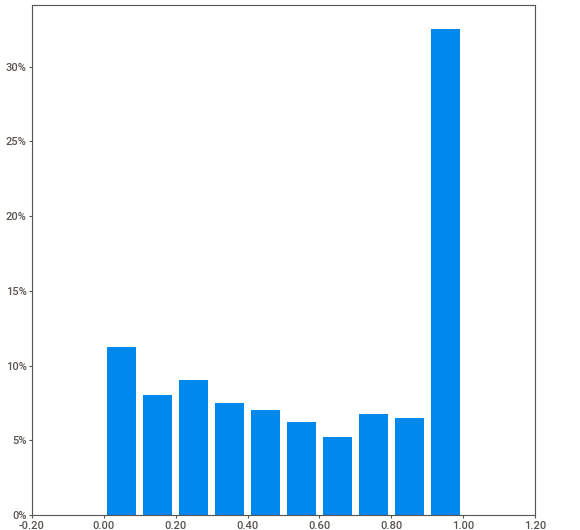
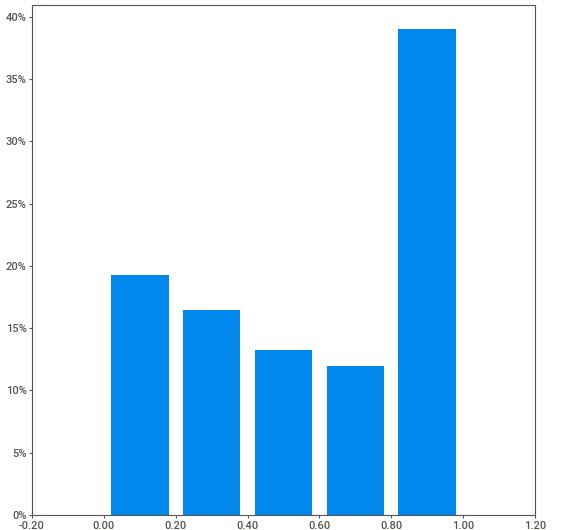
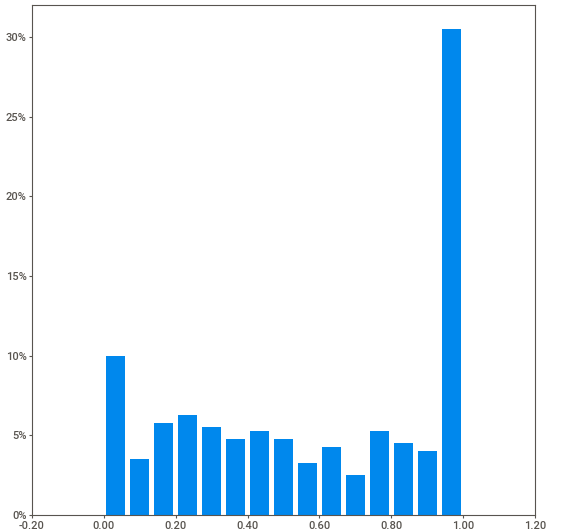
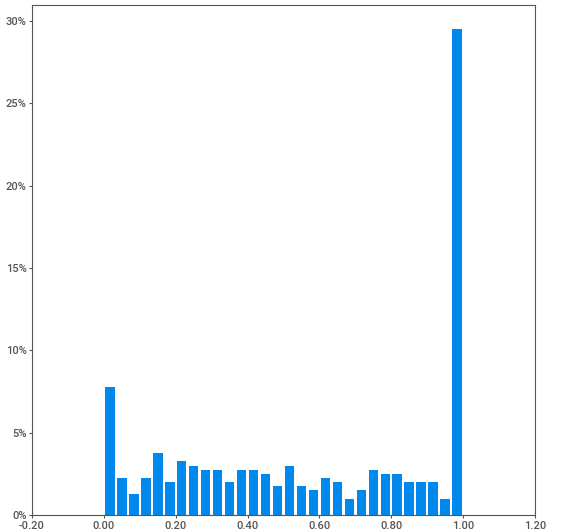
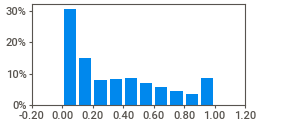
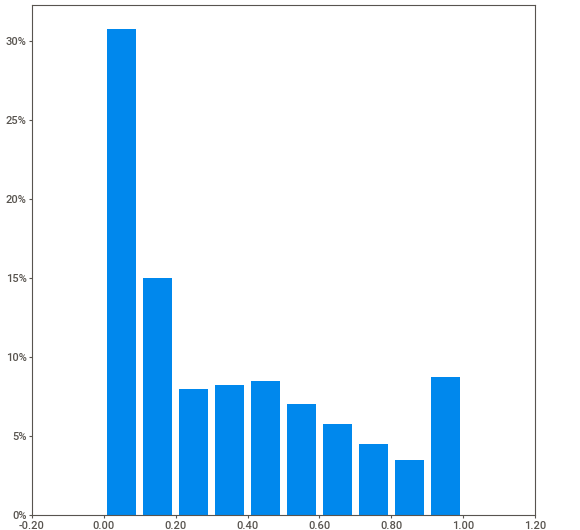
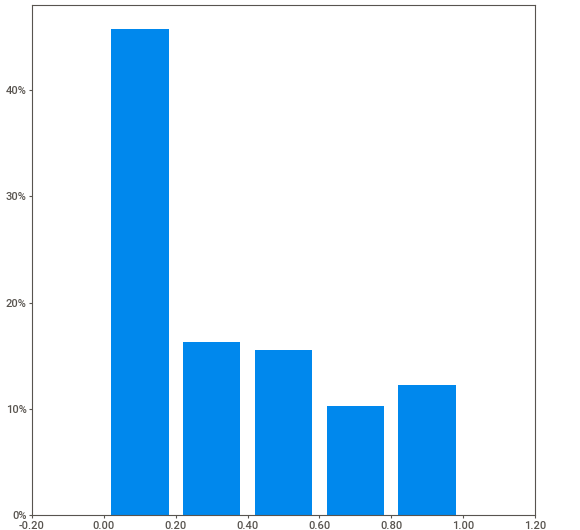
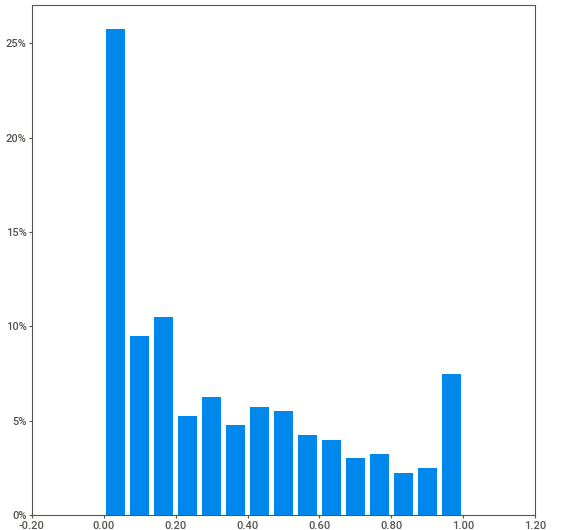
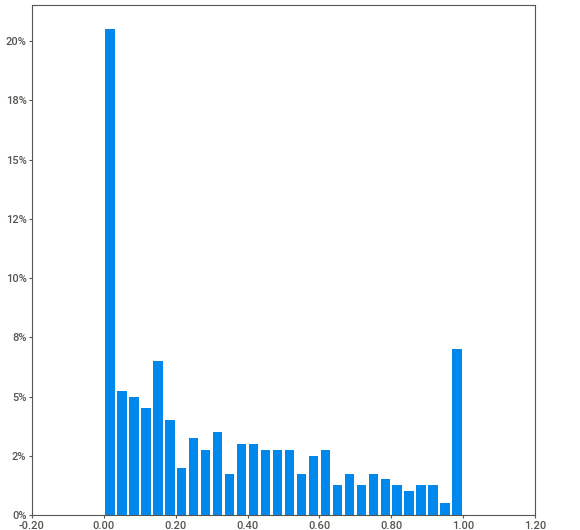
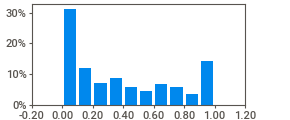
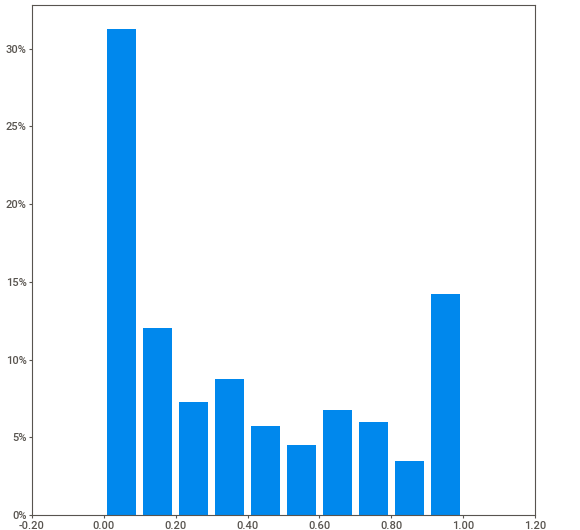
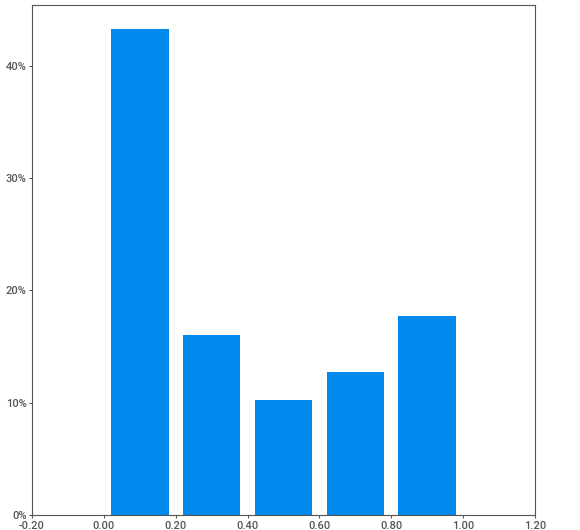
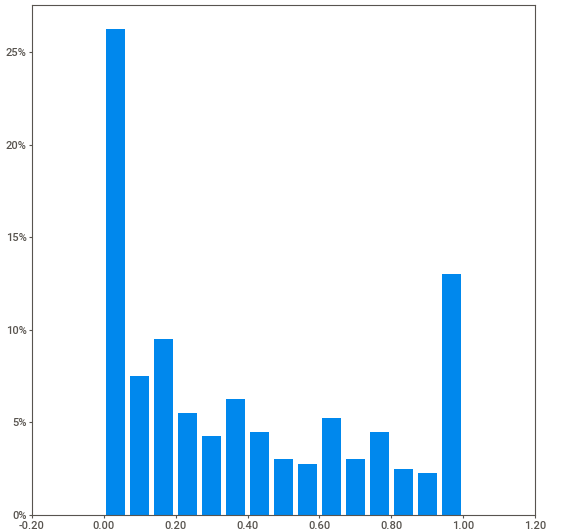
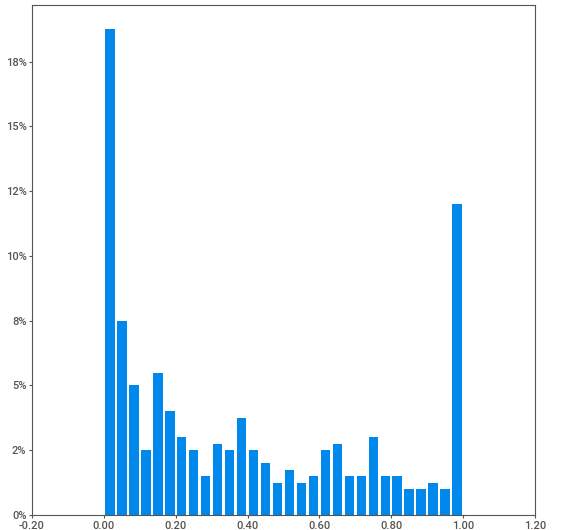
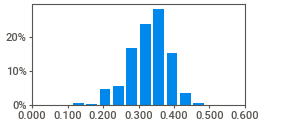
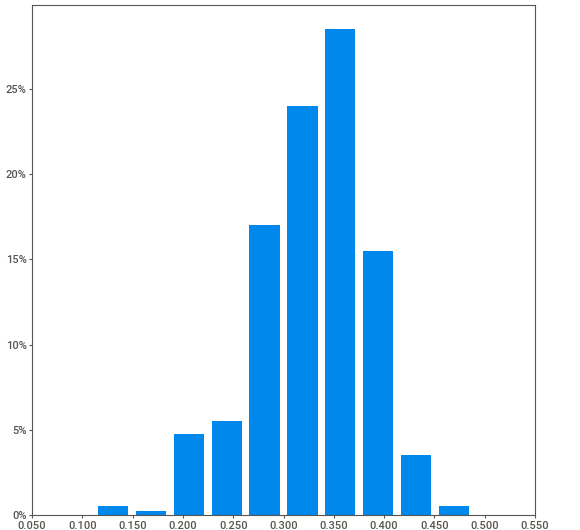
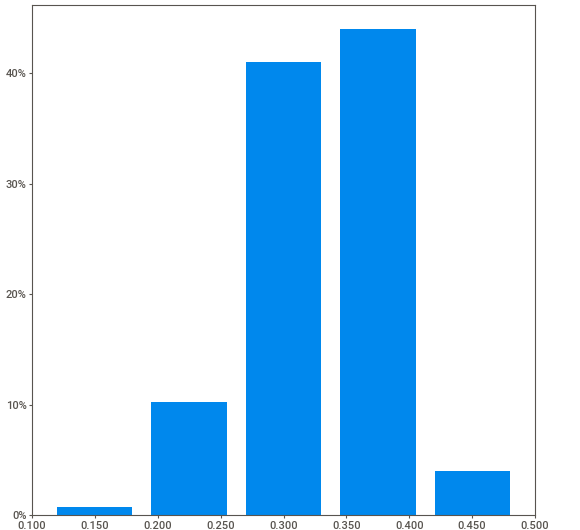
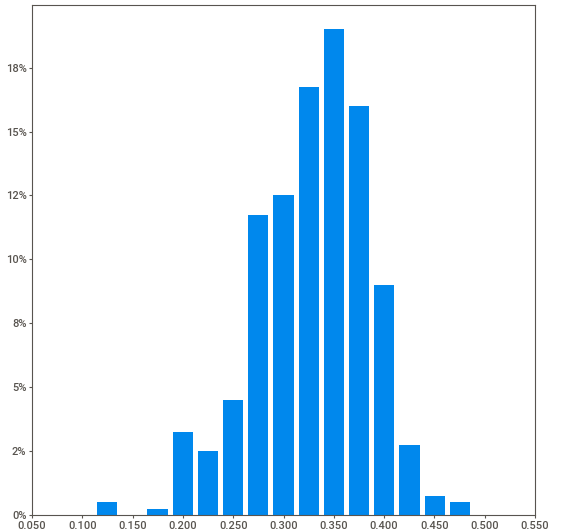
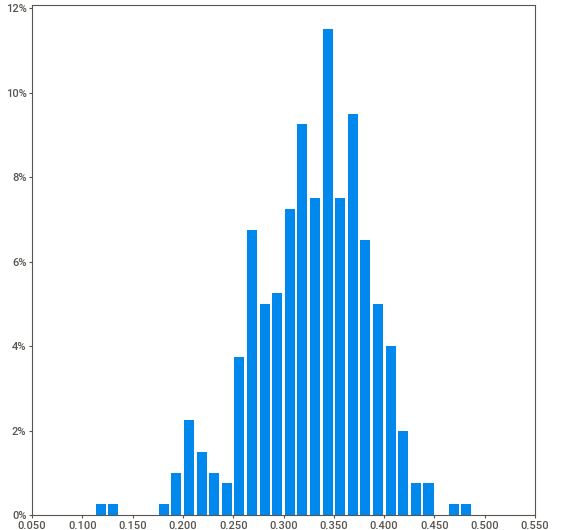
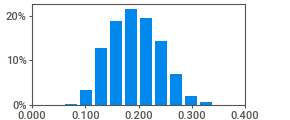
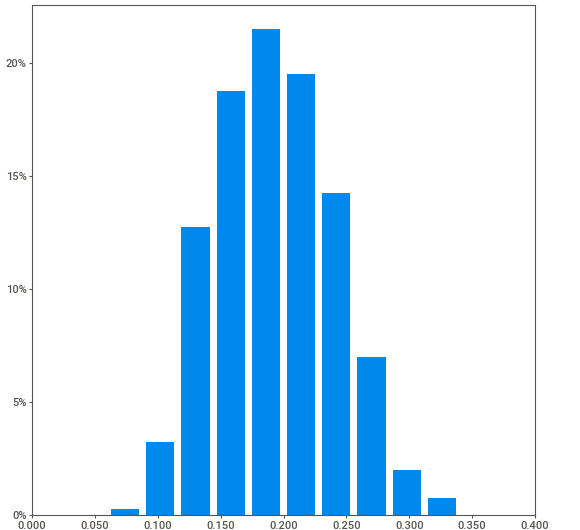
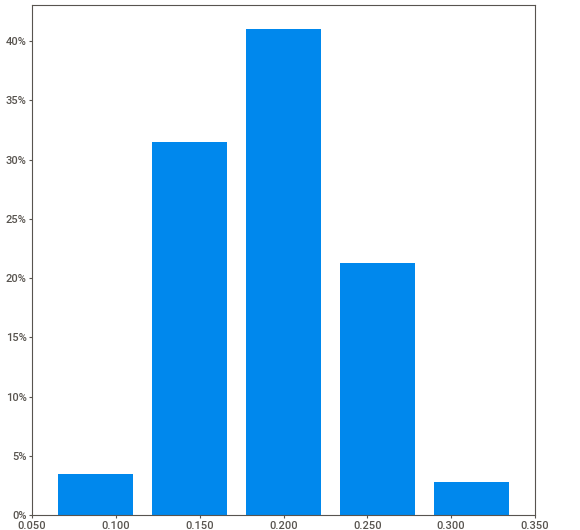
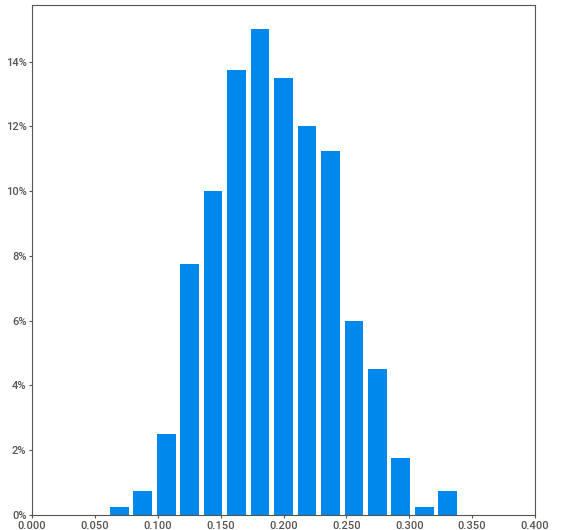
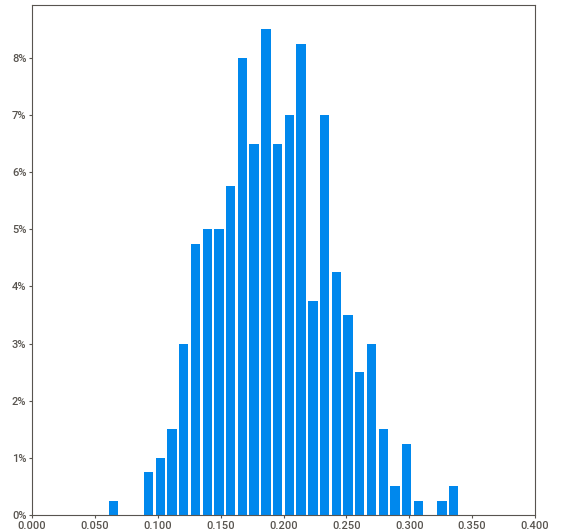
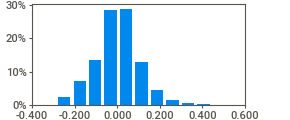
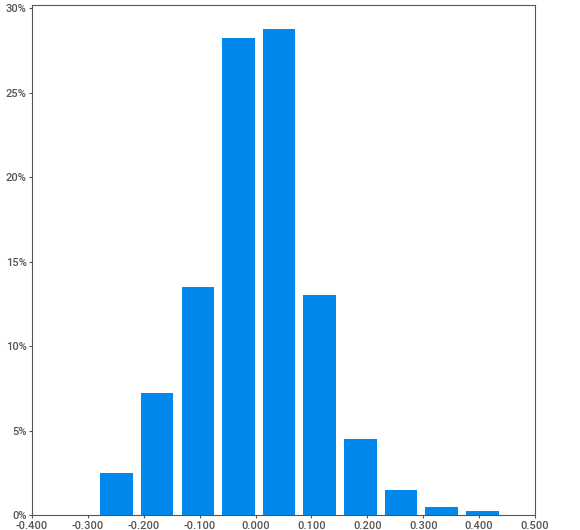
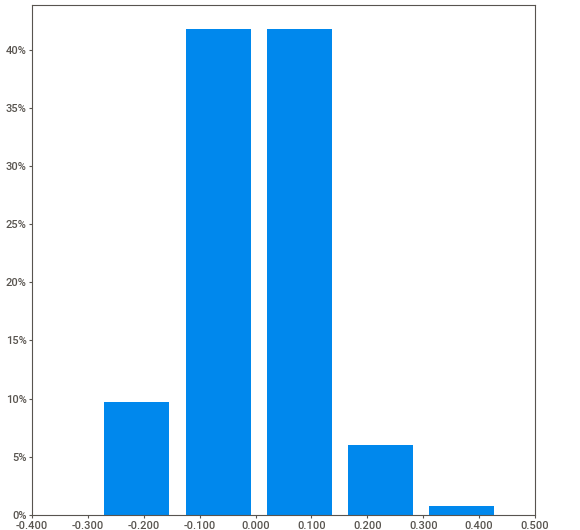
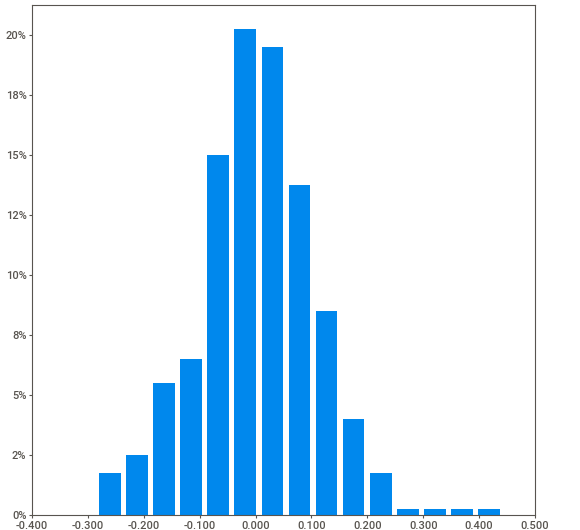
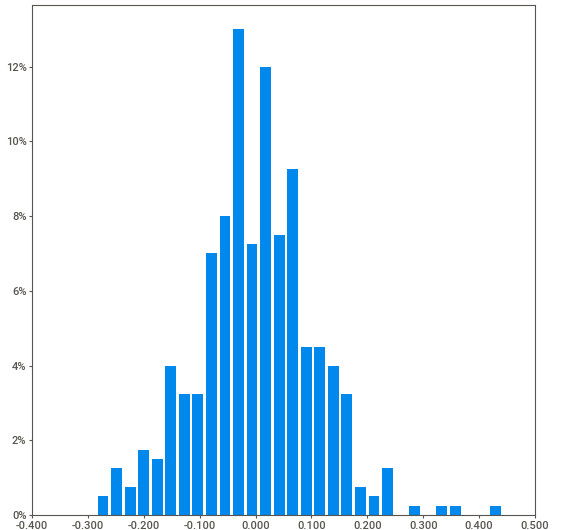
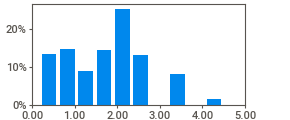
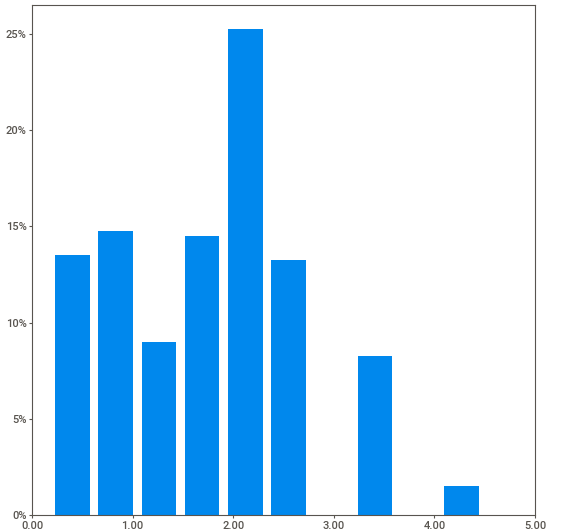
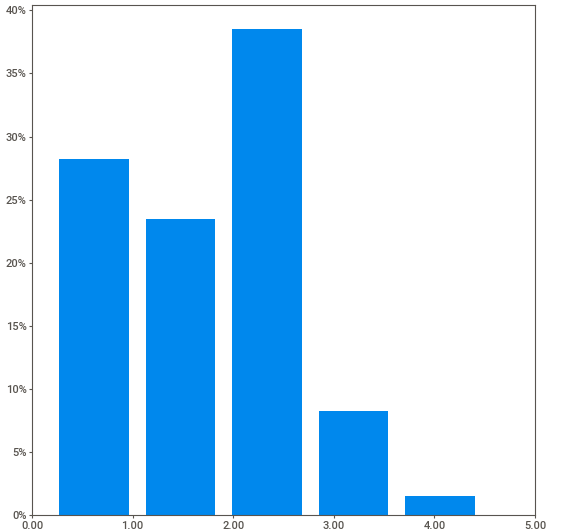
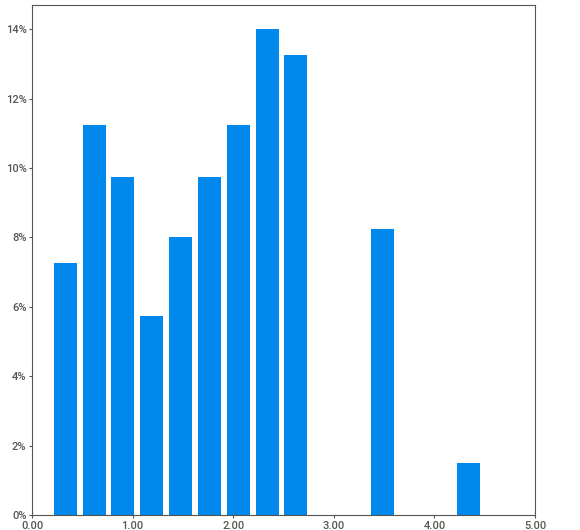
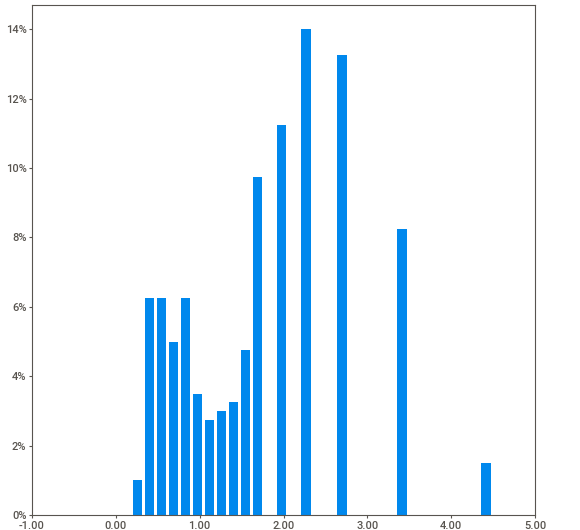
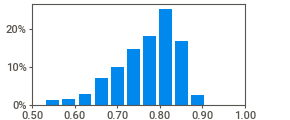
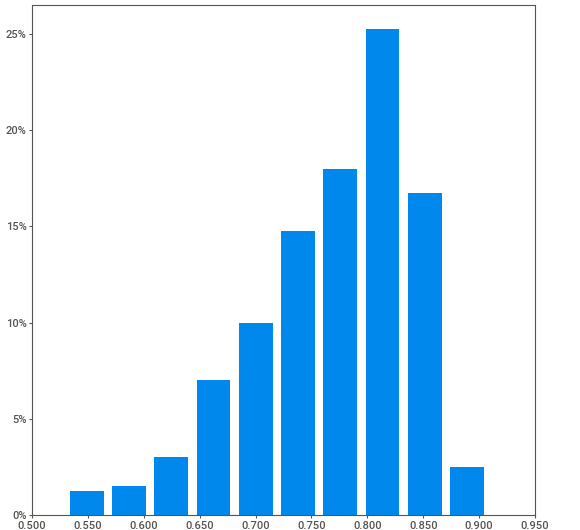
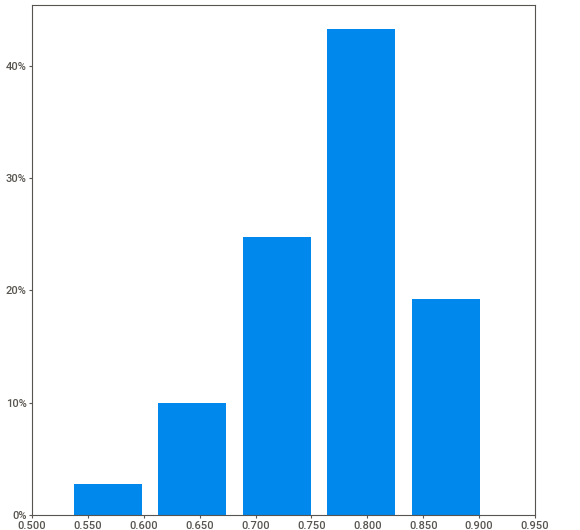
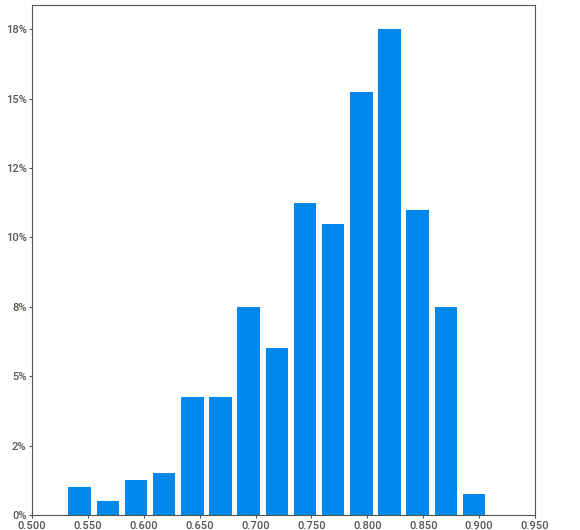
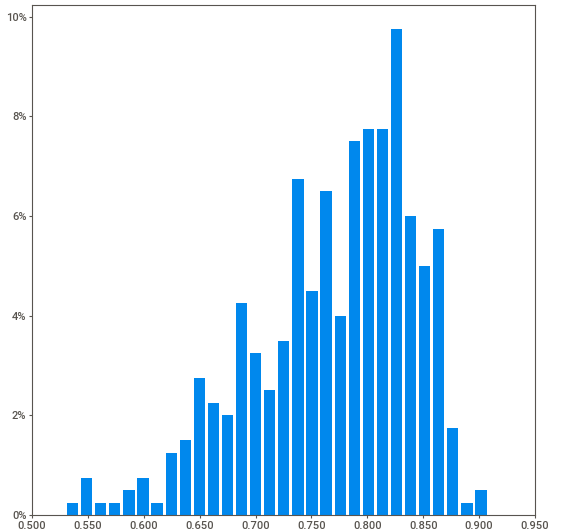
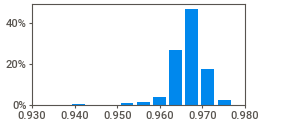
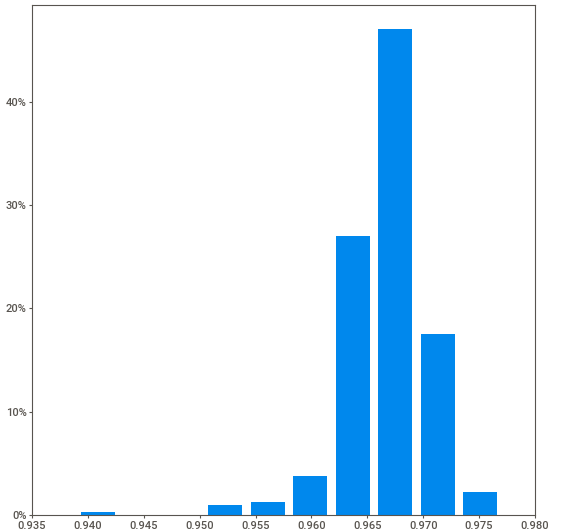
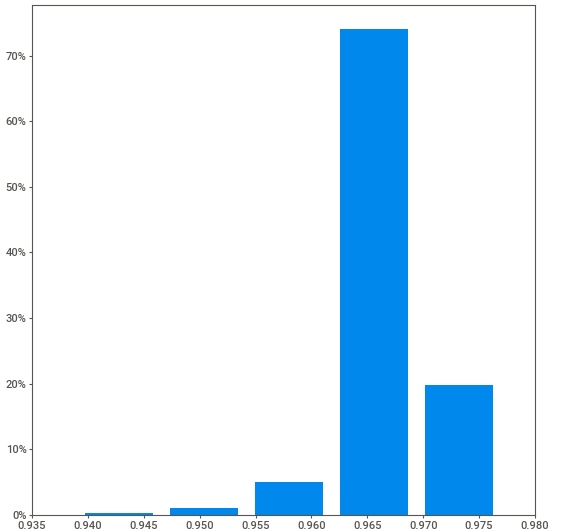
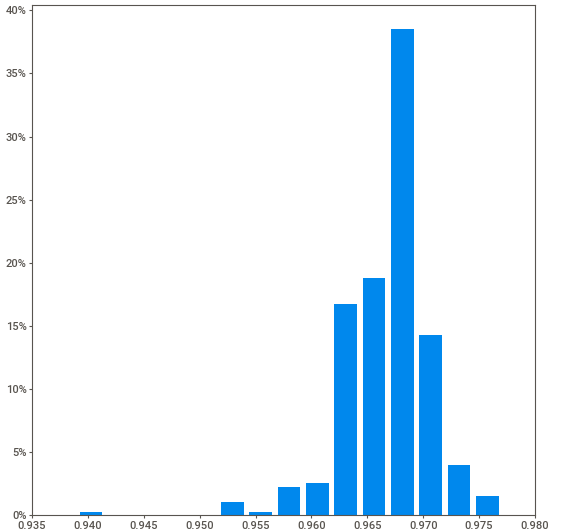
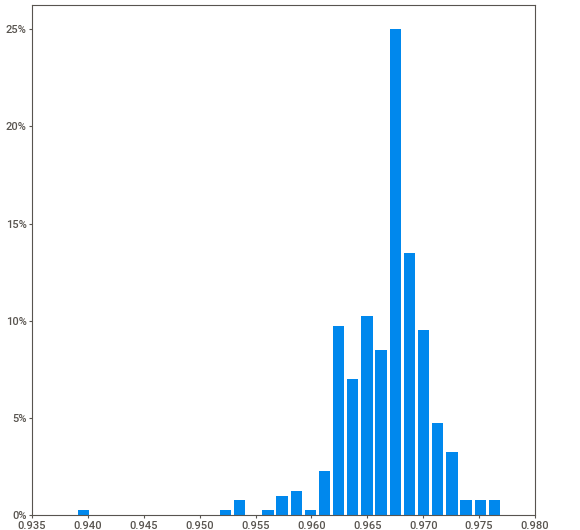
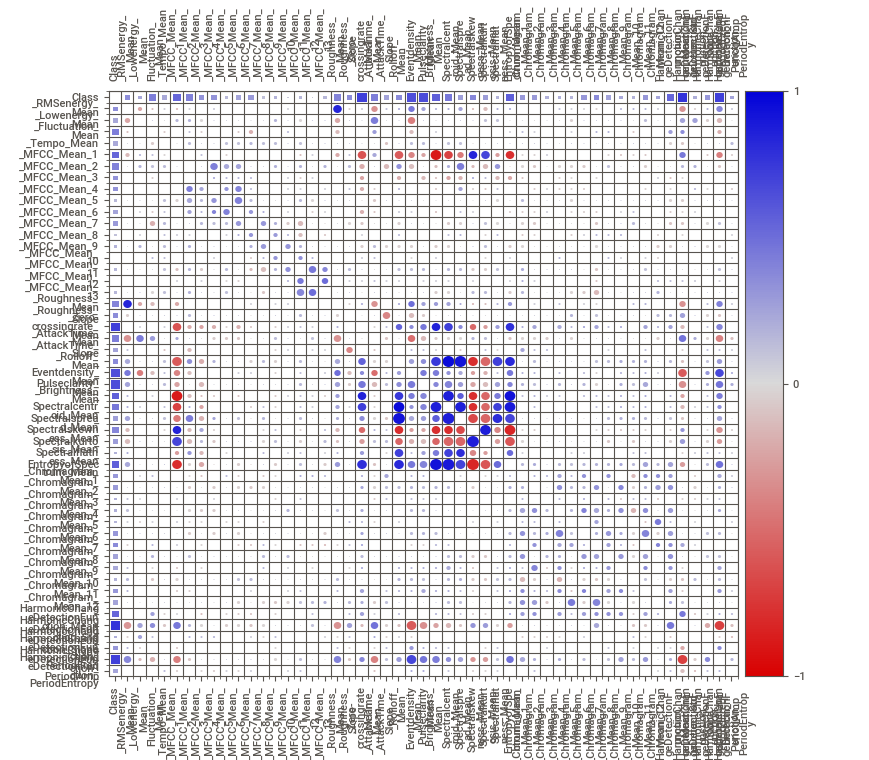
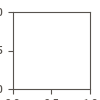

In [3]:
sweetviz.analyze(data).show_notebook()

In [4]:
data["Class"].value_counts()

Class
relax    100
happy    100
sad      100
angry    100
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

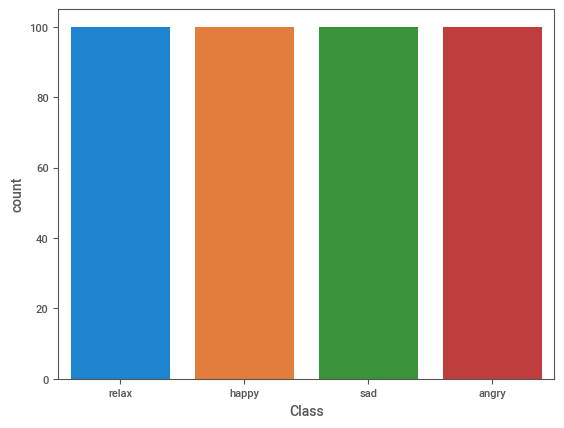

In [5]:
sns.countplot(x='Class', data = data)

In [6]:
data.describe().T

count         mean  \
_RMSenergy_Mean                                 400.0     0.134650   
_Lowenergy_Mean                                 400.0     0.553605   
_Fluctuation_Mean                               400.0     7.145932   
_Tempo_Mean                                     400.0   123.682020   
_MFCC_Mean_1                                    400.0     2.456422   
_MFCC_Mean_2                                    400.0     0.071890   
_MFCC_Mean_3                                    400.0     0.488065   
_MFCC_Mean_4                                    400.0     0.030465   
_MFCC_Mean_5                                    400.0     0.178897   
_MFCC_Mean_6                                    400.0     0.038307   
_MFCC_Mean_7                                    400.0     0.059943   
_MFCC_Mean_8                                    400.0     0.043467   
_MFCC_Mean_9                                    400.0     0.023010   
_MFCC_Mean_10                                   400.0     0.027793   
_MFCC_Mean_11                                   400.0     0.028798   
_MFCC_Mean_12                                   400.0     0.016667   
_MFCC_Mean_13                                   400.0     0.024118   
_Roughness_Mean                                 400.0   527.681365   
_Roughness_Slope                                400.0     0.072038   
_Zero-crossingrate_Mean                         400.0   997.252315   
_AttackTime_Mean                                400.0     0.031305   
_AttackTime_Slope                               400.0    -0.002890   
_Rolloff_Mean                                   400.0  5691.069637   
_Eventdensity_Mean                              400.0     2.784820   
_Pulseclarity_Mean                              400.0     0.249387   
_Brightness_Mean                                400.0     0.434158   
_Spectralcentroid_Mean                          400.0  2581.167267   
_Spectralspread_Mean                            400.0  3082.394695   
_Spectralskewness_Mean                          400.0     1.870035   
_Spectralkurtosis_Mean                          400.0     7.348953   
_Spectralflatness_Mean                          400.0     0.048523   
_EntropyofSpectrum_Mean                         400.0     0.872607   
_Chromagram_Mean_1                              400.0     0.352560   
_Chromagram_Mean_2                              400.0     0.253035   
_Chromagram_Mean_3                              400.0     0.365098   
_Chromagram_Mean_4                              400.0     0.208295   
_Chromagram_Mean_5                              400.0     0.350412   
_Chromagram_Mean_6                              400.0     0.263880   
_Chromagram_Mean_7                              400.0     0.242797   
_Chromagram_Mean_8                              400.0     0.391873   
_Chromagram_Mean_9                              400.0     0.354632   
_Chromagram_Mean_10                             400.0     0.590975   
_Chromagram_Mean_11                             400.0     0.342340   
_Chromagram_Mean_12                             400.0     0.385620   
_HarmonicChangeDetectionFunction_Mean           400.0     0.328213   
_HarmonicChangeDetectionFunction_Std            400.0     0.192997   
_HarmonicChangeDetectionFunction_Slope          400.0    -0.000157   
_HarmonicChangeDetectionFunction_PeriodFreq     400.0     1.762288   
_HarmonicChangeDetectionFunction_PeriodAmp      400.0     0.769690   
_HarmonicChangeDetectionFunction_PeriodEntropy  400.0     0.966712   

                                                        std      min  \
_RMSenergy_Mean                                    0.064368    0.010   
_Lowenergy_Mean                                    0.050750    0.302   
_Fluctuation_Mean                                  2.280145    3.580   
_Tempo_Mean                                       34.234344   48.284   
_MFCC_Mean_1                                       0.799262    0.323   
_MFCC_Mean_2                                 

In [7]:
label_encoder = LabelEncoder()
data["Class"] = label_encoder.fit_transform(data['Class'])
data

Class  _RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0        2            0.052            0.591              9.136      130.043   
1        2            0.125            0.439              6.680      142.240   
2        2            0.046            0.639             10.578      188.154   
3        2            0.135            0.603             10.442       65.991   
4        2            0.066            0.591              9.769       88.890   
..     ...              ...              ...                ...          ...   
395      0            0.174            0.578              5.265      161.144   
396      0            0.176            0.498              5.042      179.787   
397      0            0.187            0.557              4.724      134.032   
398      0            0.140            0.573              4.470      113.600   
399      0            0.086            0.475              5.343      151.748   

     _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
0           3.997         0.363         0.887         0.078         0.221   
1           4.058         0.516         0.785         0.397         0.556   
2           2.775         0.903         0.502         0.329         0.287   
3           2.841         1.552         0.612         0.351         0.011   
4           3.217         0.228         0.814         0.096         0.434   
..            ...           ...           ...           ...           ...   
395         2.985         0.065         0.718         0.046         0.265   
396         2.790        -0.148         0.342        -0.011         0.029   
397         1.672         0.566         0.880        -0.113         0.244   
398         1.997        -0.210         0.694         0.089         0.206   
399         2.240        -0.014         0.834        -0.021         0.345   

     ...  _Chromagram_Mean_9  _Chromagram_Mean_10  _Chromagram_Mean_11  \
0    ...               0.426                1.000                0.008   
1    ...               0.002                1.000                0.000   
2    ...               0.184                0.746                0.016   
3    ...               0.038                1.000                0.161   
4    ...               0.004                0.404                1.000   
..   ...                 ...                  ...                  ...   
395  ...               0.374                0.838                0.413   
396  ...               0.020                1.000                0.640   
397  ...               0.052                0.184                0.287   
398  ...               0.137                1.000                0.304   
399  ...               0.099                1.000                0.094   

     _Chromagram_Mean_12  _HarmonicChangeDetectionFunction_Mean  \
0                  0.101                                  0.316   
1                  0.984                                  0.285   
2                  1.000                                  0.413   
3                  0.757                                  0.422   
4                  0.001                                  0.345   
..                   ...                                    ...   
395                0.125                                  0.323   
396                0.010                                  0.233   
397                0.101                                  0.269   
398                0.140                                  0.277   
399                0.033                                  0.195   

     _HarmonicChangeDetectionFunction_Std  \
0                                   0.261   
1                                   0.211   
2                                   0.299   
3                                   0.265   
4                                   0.261   
..                                    ...   
395                                 0.140   
396                                 0.127   
397                 

In [8]:
missing_values = data.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
print(columns_with_missing)

Series([], dtype: int64)


In [9]:
data.corr()

Class  _RMSenergy_Mean  \
Class                                           1.000000        -0.295092   
_RMSenergy_Mean                                -0.295092         1.000000   
_Lowenergy_Mean                                 0.179905        -0.281123   
_Fluctuation_Mean                               0.242943        -0.170943   
_Tempo_Mean                                    -0.050760         0.001018   
_MFCC_Mean_1                                    0.355162        -0.196514   
_MFCC_Mean_2                                    0.045559        -0.004046   
_MFCC_Mean_3                                   -0.117374         0.058838   
_MFCC_Mean_4                                   -0.067627         0.021011   
_MFCC_Mean_5                                   -0.044363        -0.057344   
_MFCC_Mean_6                                   -0.047221        -0.026006   
_MFCC_Mean_7                                   -0.058495        -0.039836   
_MFCC_Mean_8                                    0.026423        -0.021591   
_MFCC_Mean_9                                    0.026939        -0.043788   
_MFCC_Mean_10                                  -0.035495        -0.010086   
_MFCC_Mean_11                                  -0.090842         0.032007   
_MFCC_Mean_12                                   0.014484        -0.030832   
_MFCC_Mean_13                                  -0.088090        -0.039308   
_Roughness_Mean                                -0.333666         0.839064   
_Roughness_Slope                                0.143470        -0.104405   
_Zero-crossingrate_Mean                        -0.116159         0.010436   
_AttackTime_Mean                                0.378313        -0.377370   
_AttackTime_Slope                              -0.111241         0.076037   
_Rolloff_Mean                                  -0.154315         0.179563   
_Eventdensity_Mean                             -0.490675         0.419407   
_Pulseclarity_Mean                             -0.351184         0.212304   
_Brightness_Mean                               -0.221874         0.135862   
_Spectralcentroid_Mean                         -0.168998         0.169507   
_Spectralspread_Mean                           -0.126013         0.211294   
_Spectralskewness_Mean                          0.207333        -0.191202   
_Spectralkurtosis_Mean                          0.171512        -0.179506   
_Spectralflatness_Mean                         -0.053538         0.160291   
_EntropyofSpectrum_Mean                        -0.203428         0.184038   
_Chromagram_Mean_1                             -0.037415         0.014312   
_Chromagram_Mean_2                             -0.007066         0.007808   
_Chromagram_Mean_3                             -0.137893         0.075423   
_Chromagram_Mean_4                              0.003840         0.076750   
_Chromagram_Mean_5                              0.024692        -0.004288   
_Chromagram_Mean_6                              0.067359        -0.019355   
_Chromagram_Mean_7                              0.245723        -0.096635   
_Chromagram_Mean_8                              0.145647         0.010933   
_Chromagram_Mean_9                              0.057209         0.116780   
_Chromagram_Mean_10                            -0.112650         0.121314   
_Chromagram_Mean_11                            -0.029740         0.134801   
_Chromagram_Mean_12                             0.060236         0.019755   
_HarmonicChangeDetectionFunction_Mean           0.330568        -0.034969   
_HarmonicChangeDetectionFunction_Std            0.658436        -0.361005   
_HarmonicChangeDetectionFunction_Slope          0.015550        -0.093959   
_HarmonicChangeDetectionFunction_PeriodFreq    -0.217051         0.138085   
_HarmonicChangeDetectionFunction_PeriodAmp     -0.559444         0.344589   
_HarmonicChangeDetectionFunction_PeriodEntropy -0.076058         0.017421   

                                              

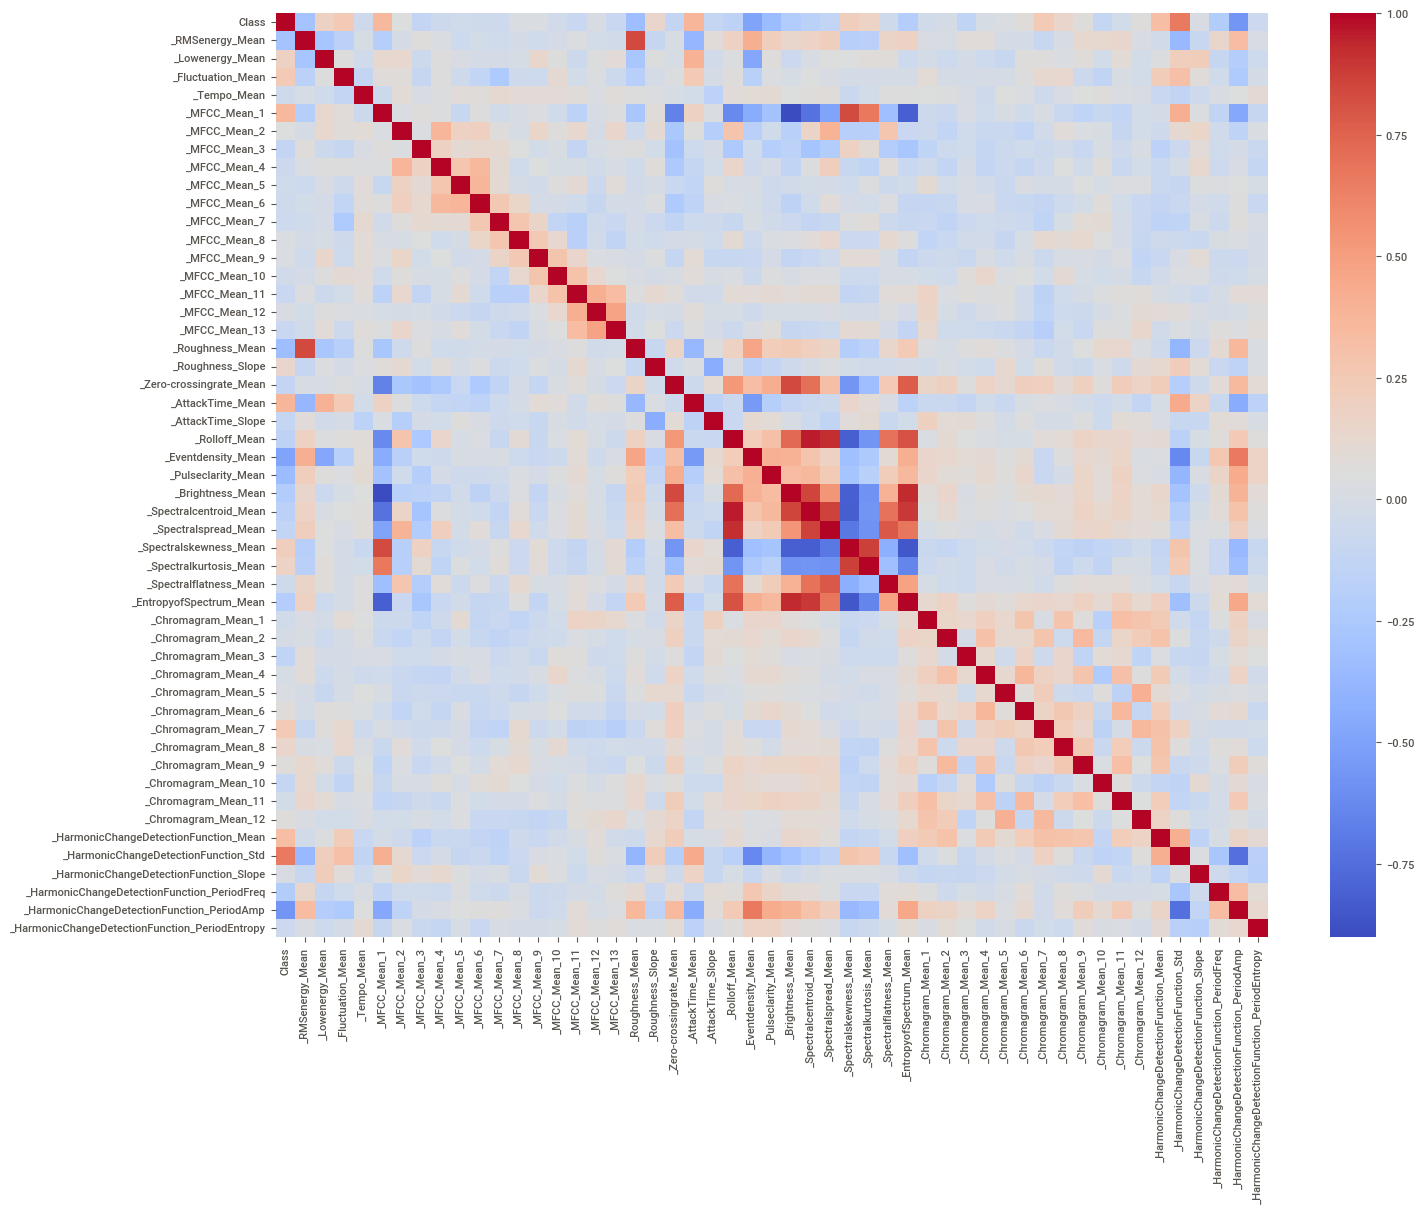

In [10]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.show()

In [11]:
X = data.loc[:,data.columns != "Class"]
Y = data.loc[:,data.columns == "Class"]
X

_RMSenergy_Mean  _Lowenergy_Mean  _Fluctuation_Mean  _Tempo_Mean  \
0              0.052            0.591              9.136      130.043   
1              0.125            0.439              6.680      142.240   
2              0.046            0.639             10.578      188.154   
3              0.135            0.603             10.442       65.991   
4              0.066            0.591              9.769       88.890   
..               ...              ...                ...          ...   
395            0.174            0.578              5.265      161.144   
396            0.176            0.498              5.042      179.787   
397            0.187            0.557              4.724      134.032   
398            0.140            0.573              4.470      113.600   
399            0.086            0.475              5.343      151.748   

     _MFCC_Mean_1  _MFCC_Mean_2  _MFCC_Mean_3  _MFCC_Mean_4  _MFCC_Mean_5  \
0           3.997         0.363         0.887         0.078         0.221   
1           4.058         0.516         0.785         0.397         0.556   
2           2.775         0.903         0.502         0.329         0.287   
3           2.841         1.552         0.612         0.351         0.011   
4           3.217         0.228         0.814         0.096         0.434   
..            ...           ...           ...           ...           ...   
395         2.985         0.065         0.718         0.046         0.265   
396         2.790        -0.148         0.342        -0.011         0.029   
397         1.672         0.566         0.880        -0.113         0.244   
398         1.997        -0.210         0.694         0.089         0.206   
399         2.240        -0.014         0.834        -0.021         0.345   

     _MFCC_Mean_6  ...  _Chromagram_Mean_9  _Chromagram_Mean_10  \
0           0.118  ...               0.426                1.000   
1           0.799  ...               0.002                1.000   
2           0.140  ...               0.184                0.746   
3           0.143  ...               0.038                1.000   
4           0.285  ...               0.004                0.404   
..            ...  ...                 ...                  ...   
395         0.104  ...               0.374                0.838   
396         0.039  ...               0.020                1.000   
397         0.214  ...               0.052                0.184   
398         0.062  ...               0.137                1.000   
399         0.266  ...               0.099                1.000   

     _Chromagram_Mean_11  _Chromagram_Mean_12  \
0                  0.008                0.101   
1                  0.000                0.984   
2                  0.016                1.000   
3                  0.161                0.757   
4                  1.000                0.001   
..                   ...                  ...   
395                0.413                0.125   
396                0.640                0.010   
397                0.287                0.101   
398                0.304                0.140   
399                0.094                0.033   

     _HarmonicChangeDetectionFunction_Mean  \
0                                    0.316   
1                                    0.285   
2                                    0.413   
3                                    0.422   
4                                    0.345   
..                                     ...   
395                                  0.323   
396                                  0.233   
397                                  0.269   
398                                  0.277   
399                                  0.195   

     _HarmonicChangeDetectionFunction_Std  \
0                                   0.261   
1                                   0.211   
2                                   0.299   
3                                   0.265   
4                              

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [13]:
standardscaler = StandardScaler()
x_train = standardscaler.fit_transform(X_train)
x_test = standardscaler.transform(X_test)

# Logistic Regression

In [14]:
logrregression = LogisticRegression(random_state=0)
logrregression.fit(x_train,Y_train.values.ravel())
y_pred = logrregression.predict(x_test)
print(y_pred)
print(Y_test)


[3 3 2 3 2 2 0 2 3 1 2 0 2 2 1 2 0 0 3 2 2 0 0 0 2 0 1 2 0 1 0 1 2 2 3 2 1
 0 1 1 0 2 2 2 3 0 1 1 3 1 2 0 3 2 0 3 2 1 0 1 1 3 1 2 1 2 0 3 1 2 2 1 0 2
 0 1 1 0 1 2 2 2 3 2 2 2 2 0 1 2 3 0 1 3 1 0 0 1 1 2 3 1 3 2 1 2 2 1 0 0 1
 0 2 0 0 2 2 3 0 0]
     Class
209      3
280      3
33       2
210      3
93       2
..     ...
60       2
79       2
285      3
305      0
281      3

[120 rows x 1 columns]


In [15]:
accuracy = accuracy_score(Y_test,y_pred)
print(accuracy)

0.75


In [16]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[23,  2,  2,  1],
       [ 0, 24,  1,  0],
       [ 3,  0, 30,  4],
       [ 5,  4,  8, 13]], dtype=int64)

# KNN Classification

In [17]:
model = KNeighborsClassifier()
model.fit(x_train, Y_train.values.ravel())
y_pred = model.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.6166666666666667


In [18]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[21,  7,  0,  0],
       [ 2, 23,  0,  0],
       [ 4,  5, 18, 10],
       [ 5,  6,  7, 12]], dtype=int64)

In [19]:
model = KNeighborsClassifier(metric="manhattan")
model.fit(x_train, Y_train.values.ravel())
y_pred = model.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.5833333333333334


In [20]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[21,  7,  0,  0],
       [ 2, 23,  0,  0],
       [ 7,  2, 15, 13],
       [ 4,  7,  8, 11]], dtype=int64)

# Support Vector Machine

In [21]:
svc = SVC(kernel='linear')
svc.fit(x_train,Y_train.values.ravel())
y_pred = svc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.7


In [22]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[22,  2,  2,  2],
       [ 0, 24,  1,  0],
       [ 5,  0, 25,  7],
       [ 6,  5,  6, 13]], dtype=int64)

In [23]:
svc = SVC(kernel='rbf')
svc.fit(x_train,Y_train.values.ravel())
y_pred = svc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.7583333333333333


In [24]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[20,  4,  1,  3],
       [ 0, 24,  1,  0],
       [ 0,  0, 31,  6],
       [ 5,  3,  6, 16]], dtype=int64)

# Gaussian Naive Bayes

In [25]:
gnb = GaussianNB()
gnb.fit(x_train,Y_train.values.ravel())
y_pred = gnb.predict(x_test)
print(accuracy_score(Y_test,y_pred))


0.7083333333333334


In [26]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[17,  6,  4,  1],
       [ 1, 24,  0,  0],
       [ 2,  2, 29,  4],
       [ 4,  4,  7, 15]], dtype=int64)

# Decision Tree

In [27]:
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(x_train,Y_train.values.ravel())
y_pred = dtc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.6166666666666667


In [28]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[15,  4,  6,  3],
       [ 1, 21,  1,  2],
       [ 0,  3, 26,  8],
       [ 6,  4,  8, 12]], dtype=int64)

# Random Forest

In [29]:
rfc = RandomForestClassifier()
rfc.fit(x_train,Y_train.values.ravel())
y_pred = rfc.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.7833333333333333


In [30]:
cm = confusion_matrix(Y_test,y_pred)
cm

array([[24,  2,  1,  1],
       [ 0, 24,  0,  1],
       [ 0,  0, 30,  7],
       [ 3,  4,  7, 16]], dtype=int64)

# Dimensionality Reduction

In [31]:
pca = PCA(n_components=8)
pca.fit(X)
x_pca = pca.transform(X)
transformed = pd.DataFrame(x_pca)
X=transformed
X

0            1           2           3           4          5  \
0   -4315.951070  -319.244997 -106.557738  -36.325438  -10.260205 -11.153137   
1   -4997.915969  -204.659055  232.987593 -171.026784    7.369297 -23.111667   
2    5477.082281 -1143.668099  182.075481  231.743078  234.929999 -55.963202   
3    1044.768120  -680.731181  403.931678  -24.269367 -210.213743  58.422819   
4   -2528.116799  -546.071490   38.414913 -380.282886   63.929483  31.550148   
..           ...          ...         ...         ...         ...        ...   
395  -517.947379  -400.779963  494.987243 -313.340557  -39.149918 -37.639465   
396  5602.349944  -284.417974  828.714276  350.715212 -207.605806 -48.001702   
397  1591.940010    47.039470  394.864770 -120.157528  152.758716  -6.613200   
398   -31.273190  -373.164731  237.691339 -325.537279   79.614985  10.287269   
399 -2176.567540  -432.590020  197.096805 -138.123476   33.552665 -29.742177   

            6         7  
0    2.253959  2.122894  
1    5.839065  0.201705  
2    3.538048  3.024245  
3   -0.078879  2.701562  
4    0.067180  2.641705  
..        ...       ...  
395 -0.766177 -1.274024  
396  5.290686 -1.943284  
397  0.786061 -1.972682  
398  0.284674 -2.535460  
399 -1.668933 -1.672579  

[400 rows x 8 columns]

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=42)

In [33]:
x_train = standardscaler.fit_transform(X_train)
x_test = standardscaler.transform(X_test)

In [34]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, Y_train.values.ravel())

KNeighborsClassifier()

In [35]:
y_pred = classifier.predict(x_test)
print(accuracy_score(Y_test,y_pred))

0.525
